In [296]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from unet import eval_preds

In [297]:
def plot_images(image, pred_brain_mask, target_mask, model_mask, atlas_mask):
    """draw image, pred, mask side by side"""
    fig, ax = plt.subplots(1,5, figsize=(20,10))
    axes = ax.flatten()
    for ax, im, t in zip(axes, [image, pred_brain_mask, target_mask, model_mask, atlas_mask], 
                         ["image", "pred brain mask", "target mask", "pred vent mask" ,"atlas mask"]) :
        ax.imshow(im, cmap="gray")
        ax.set_title(t, fontdict={"fontsize":20})
        
def plot_overlaid_images(images, preds, masks, image_index, color_maps, alpha_, slice_range):
    for i in slice_range:
        fig, ax = plt.subplots(1, 1, figsize=(20,10))
        ax.imshow(images[IMG_NUM][i], cmap=color_maps[0])
        ax.imshow(preds[IMG_NUM][i], cmap=color_maps[1], alpha=alpha_)
        ax.imshow(masks[IMG_NUM][i], cmap=color_maps[2], alpha=alpha_)
        
def vol_perc_diff(mask, pred, absolute=False):
    mask_vol = np.sum(mask.ravel() == 1)
    pred_vol = np.sum(pred.ravel() == 1)
    if not absolute:
        return (pred_vol-mask_vol)/mask_vol
    return abs(pred_vol-mask_vol)/mask_vol

def vol(mask):
    return np.sum(mask.ravel() == 1) * 3


def summary_table(images, target_masks, pred_masks, atlas_masks, file_names):
    pred_dice_scores = [eval_preds(pred_masks[i], target_masks[i]) for i in range(len(images))]
    atlas_dice_scores = [eval_preds(atlas_masks[i], target_masks[i]) for i in range(len(images))]
    pred_percent_vol_diff = [vol_perc_diff(target_masks[i], pred_masks[i])*100 for i in range(len(images))]
    atlas_percent_vol_diff = [vol_perc_diff(target_masks[i], atlas_masks[i])*100 for i in range(len(images))]
    abs_pred_percent_vol_diff = [vol_perc_diff(target_masks[i], pred_masks[i], absolute=True)*100 for i in range(len(images))]
    abs_atlas_percent_vol_diff = [vol_perc_diff(target_masks[i], atlas_masks[i], absolute=True)*100 for i in range(len(images))]
    volume = [vol(pred_masks[i]) for i in range(len(images))]
    d = {'test_name': file_names, 'pred_dice_scores': pred_dice_scores, 'atlas_dice_scores': atlas_dice_scores, 
         'pred_percent_vol_diff': pred_percent_vol_diff, 'atlas_percent_vol_diff': atlas_percent_vol_diff, 
         'abs_pred_percent_vol_diff': abs_pred_percent_vol_diff, 'abs_atlas_percent_vol_diff': abs_atlas_percent_vol_diff,
         'pred_volume_mm^3': volume}
    df = pd.DataFrame(data=d)
    return df

def get_testcase_data(root, ventricle_dir="baseline9_notl_ventricle_preds"):
    "FIX: test2 20 -> 19 images"
    target_masks_files = sorted(list(Path(root/"ventricle_masks").iterdir()))
    raw_images_files = sorted(list(Path(root/"skull_stripped_v2").iterdir()))
    atlas_masks_files = sorted(list(Path(root/"ventricle_atlas").iterdir()))
    pred_masks_files = sorted(list(Path(root/ventricle_dir).iterdir()))
    pred_brain_files = sorted(list(Path(root/"brain_masks").iterdir()))
    
    ok_names = [o.name for o in pred_masks_files]
    
    target_masks_files = [fn for fn in target_masks_files if fn.name in ok_names]
    raw_images_files = [fn for fn in raw_images_files if fn.name in ok_names]
    atlas_masks_files = [fn for fn in atlas_masks_files if fn.name in ok_names]
    pred_brain_files = [fn for fn in pred_brain_files if fn.name in ok_names]
    
    target_masks = []
    raw_images = []
    atlas_masks = []
    pred_masks = []
    names = []
    brain_pred_masks = []
    for i in range(len(raw_images_files)):
        target_masks.append(np.load(target_masks_files[i]))
        raw_images.append(np.load(raw_images_files[i]))
        atlas_masks.append(np.load(atlas_masks_files[i]))
        pred_masks.append(np.load(pred_masks_files[i]))
        brain_pred_masks.append(np.load(pred_brain_files[i]))
        names.append(str(raw_images_files[i]).split("/")[-1].split("_")[0])
    return (raw_images, target_masks, pred_masks, atlas_masks, brain_pred_masks, names), raw_images_files


In [298]:
# Test Set 1 - MR: 
test_case_1_mr = Path("../../data/Segmentation_Dataset/MR_Dataset/test1")

# Test Set 1 - CT:
test_case_1_ct = Path("../../data/Segmentation_Dataset/CT_Dataset/test1")

# Test Set 2 - MR:
test_case_2_mr = Path("../../data/Segmentation_Dataset/MR_Dataset/test2")

# Test Set 2 - CT:
test_case_2_ct = Path("../../data/Segmentation_Dataset/CT_Dataset/test2")

In [334]:
test_case_1_mr.ls()

[PosixPath('../../data/Segmentation_Dataset/MR_Dataset/test1/ventricle_pred'),
 PosixPath('../../data/Segmentation_Dataset/MR_Dataset/test1/brain_masks'),
 PosixPath('../../data/Segmentation_Dataset/MR_Dataset/test1/baseline11_tl_ventricle_probas'),
 PosixPath('../../data/Segmentation_Dataset/MR_Dataset/test1/baseline9_tl_ventricle_probas'),
 PosixPath('../../data/Segmentation_Dataset/MR_Dataset/test1/ventricle_atlas'),
 PosixPath('../../data/Segmentation_Dataset/MR_Dataset/test1/skull_stripped_v2'),
 PosixPath('../../data/Segmentation_Dataset/MR_Dataset/test1/baseline11_tl_ventricle_preds'),
 PosixPath('../../data/Segmentation_Dataset/MR_Dataset/test1/skull_stripped_pred'),
 PosixPath('../../data/Segmentation_Dataset/MR_Dataset/test1/brain_pred'),
 PosixPath('../../data/Segmentation_Dataset/MR_Dataset/test1/baseline10_tl_ventricle_probas'),
 PosixPath('../../data/Segmentation_Dataset/MR_Dataset/test1/brain_atlas'),
 PosixPath('../../data/Segmentation_Dataset/MR_Dataset/test1/raw_image

In [313]:
test_case_1_ct.ls()

[PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/baseline11_notl_ventricle_preds'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/ventricle_pred'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/brain_masks'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/baseline11_tl_ventricle_probas'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/baseline9_tl_ventricle_probas'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/ventricle_atlas'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/skull_stripped_v2'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/baseline11_tl_ventricle_preds'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/skull_stripped_pred'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/brain_pred'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/baseline10_tl_ventricle_probas'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dat

In [25]:
# root = test_case_2_ct
# ventricle_dir="baseline11_notl_ventricle_preds"

# images, target_masks, pred_masks, atlas_masks, pred_brain_masks, names=\
#     get_testcase_data(test_case_2_mr)

# len(images), len(target_masks), len(pred_masks), len(atlas_masks), len(pred_brain_masks), len(names)

## Slice By Slice View of Image, Predicted Brain Mask, Target Mask, Model Mask, and Atlas Mask

/home/turgutluk/.conda/envs/my_fastai/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


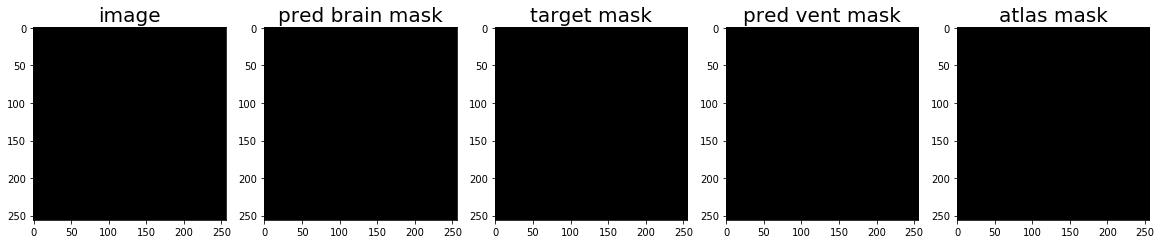

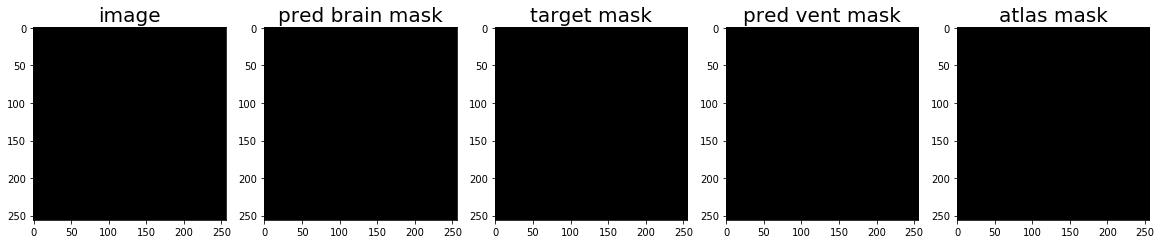

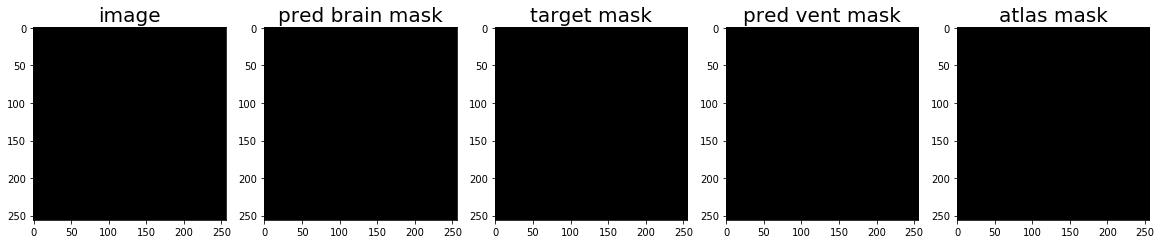

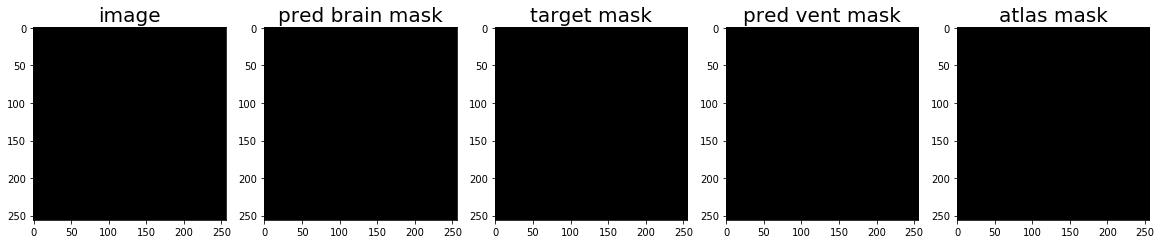

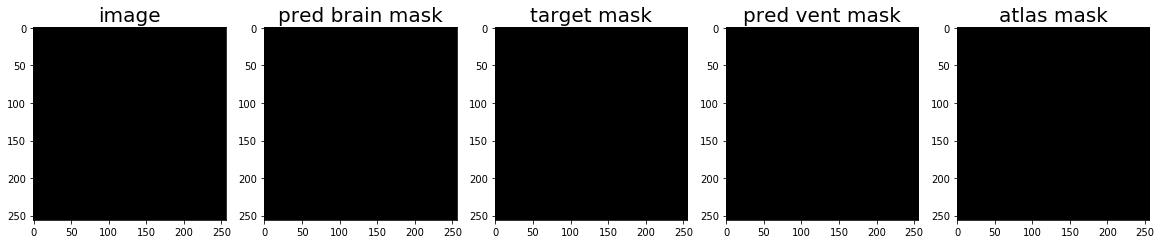

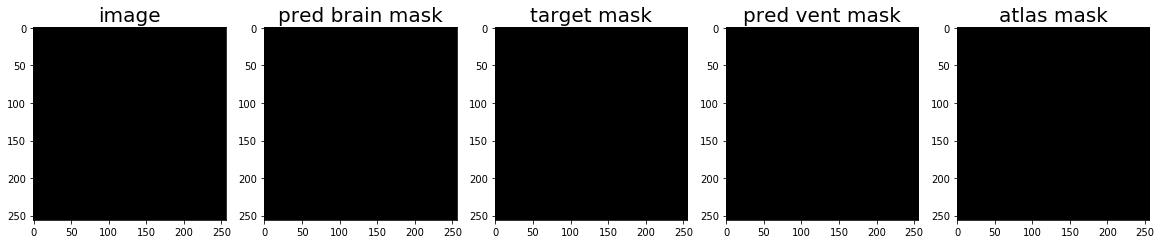

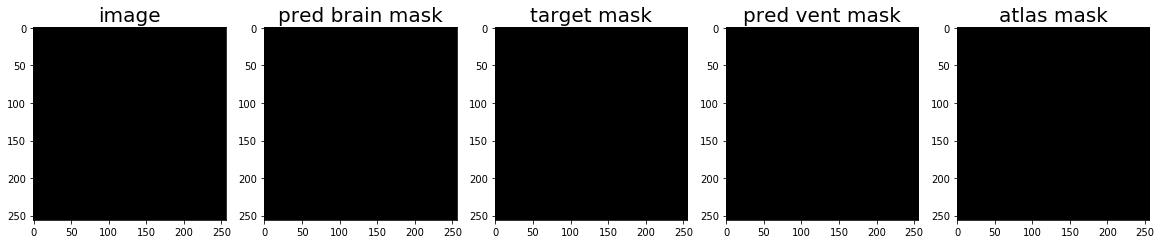

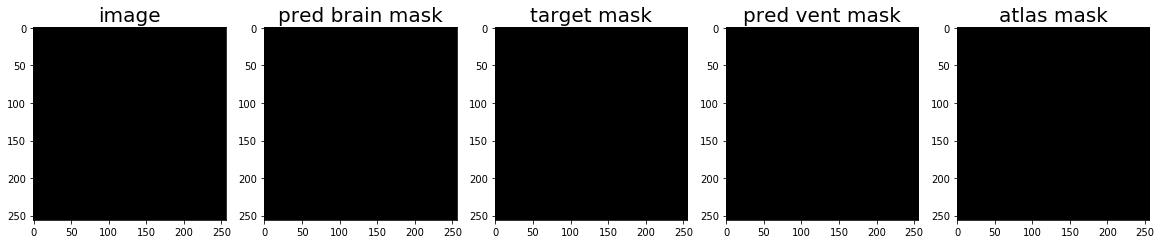

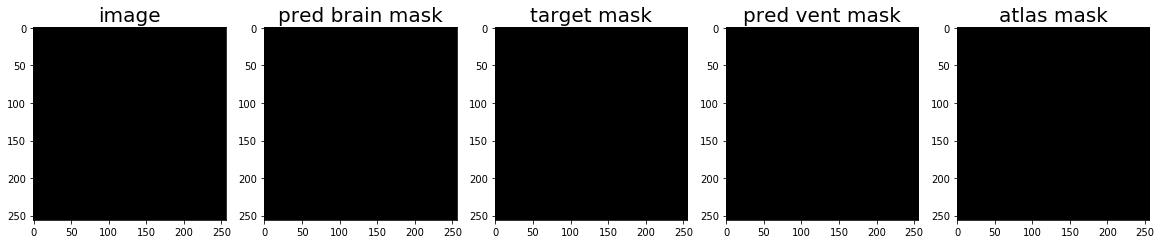

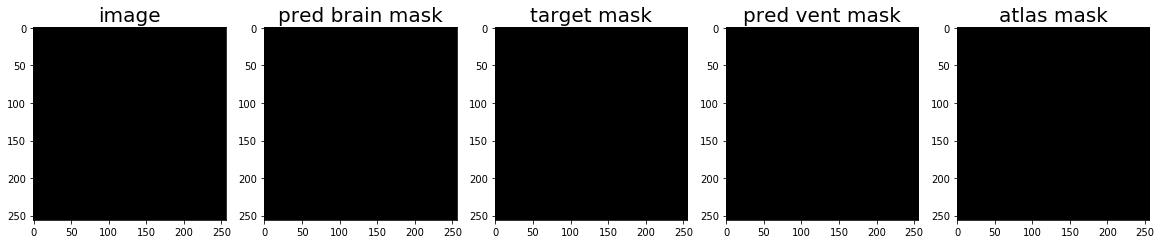

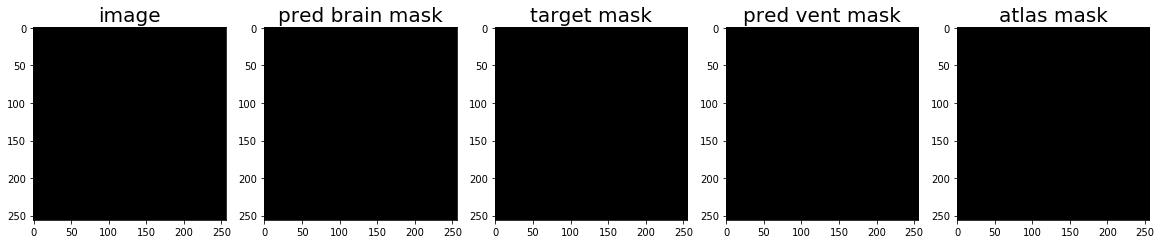

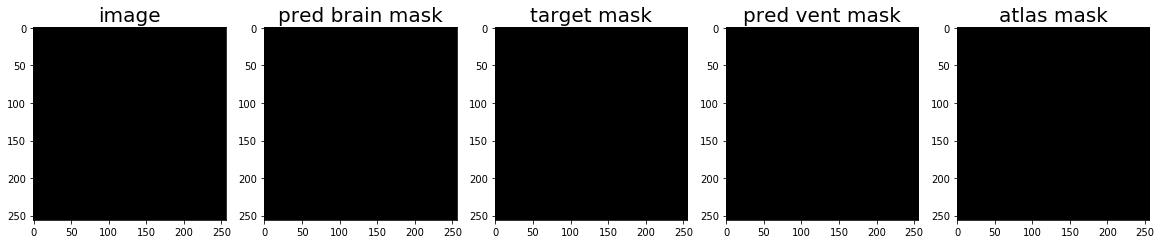

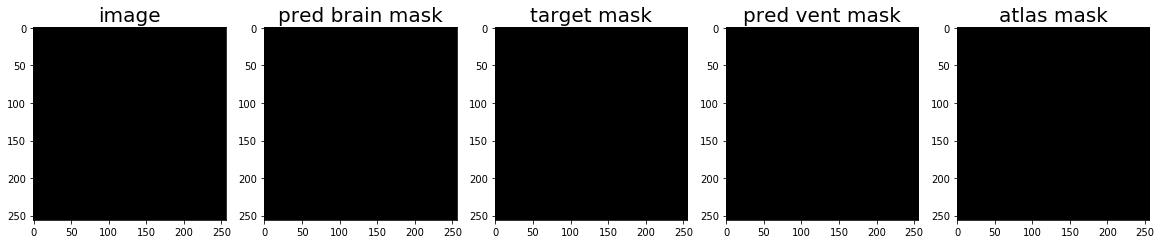

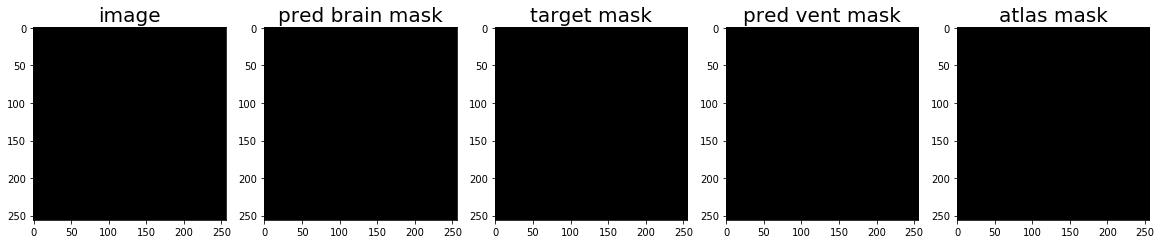

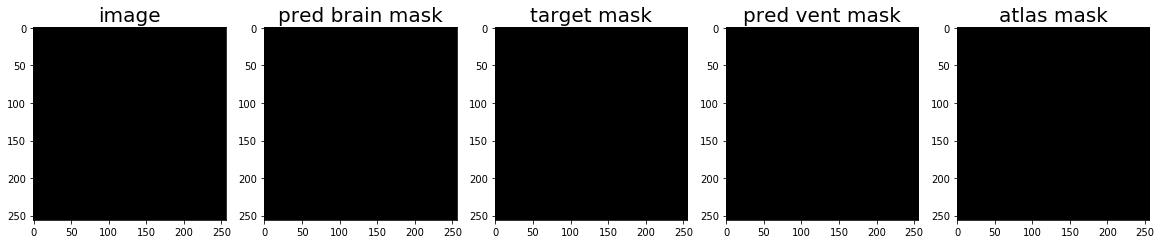

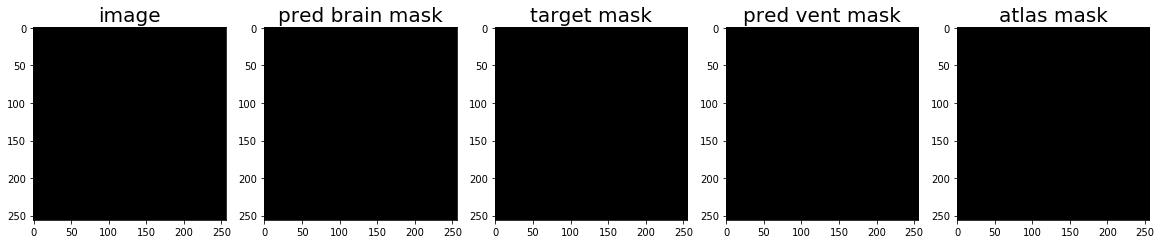

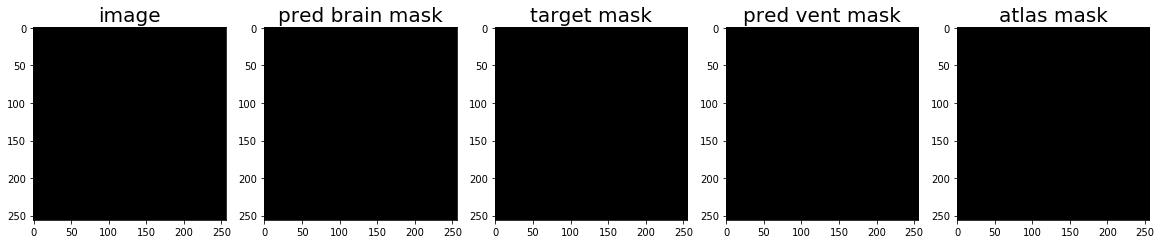

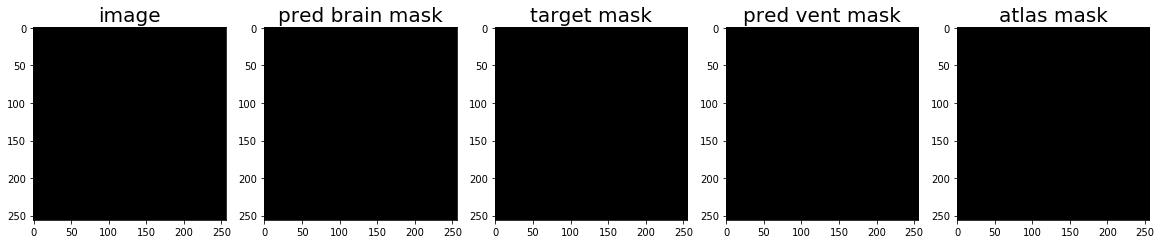

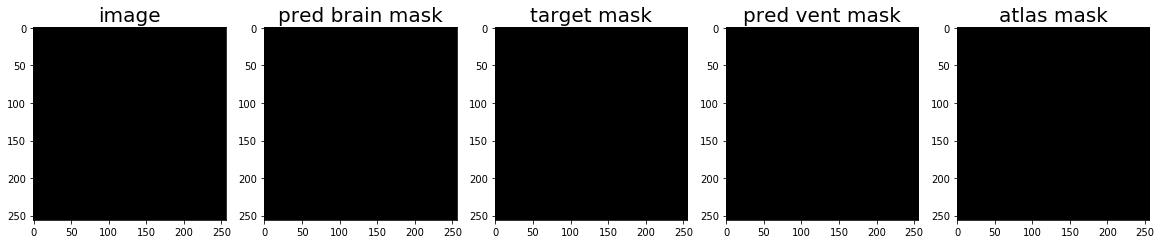

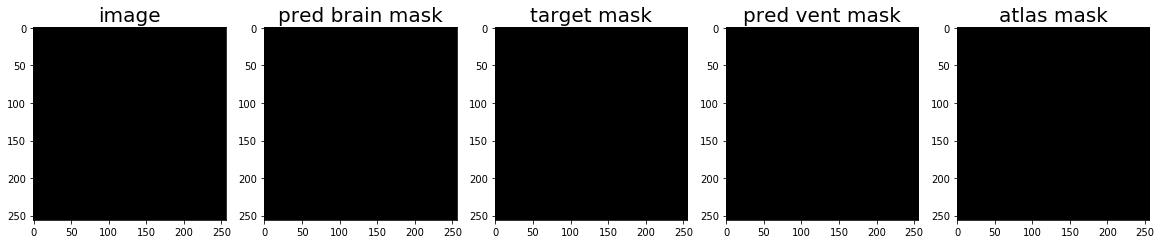

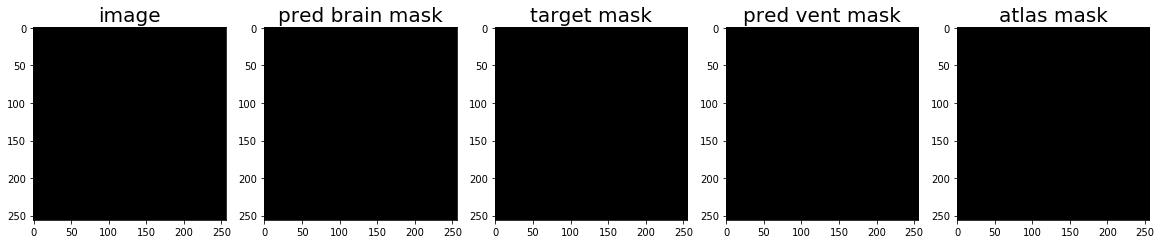

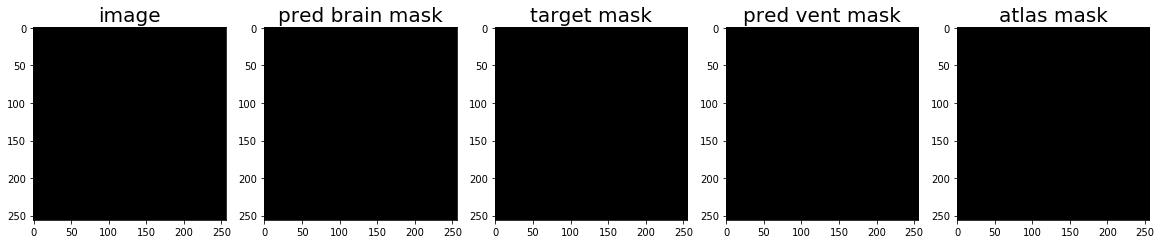

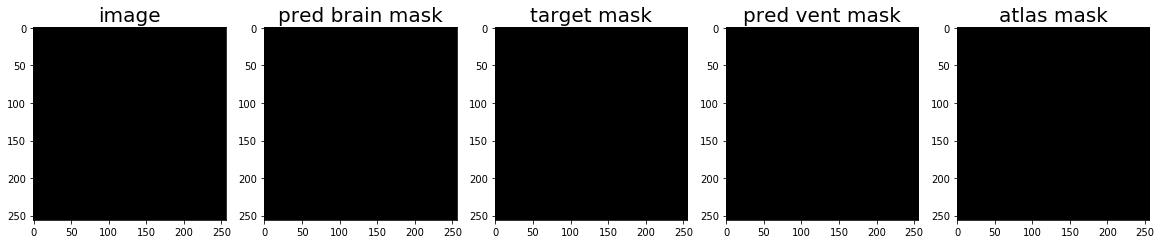

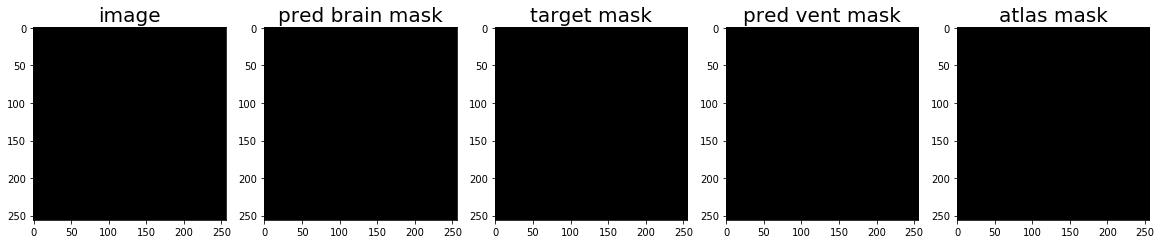

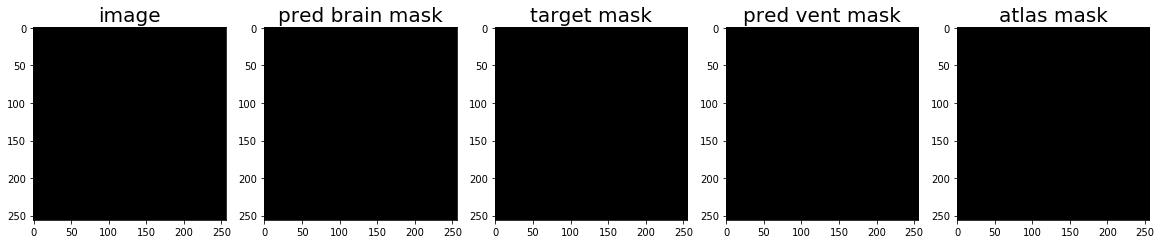

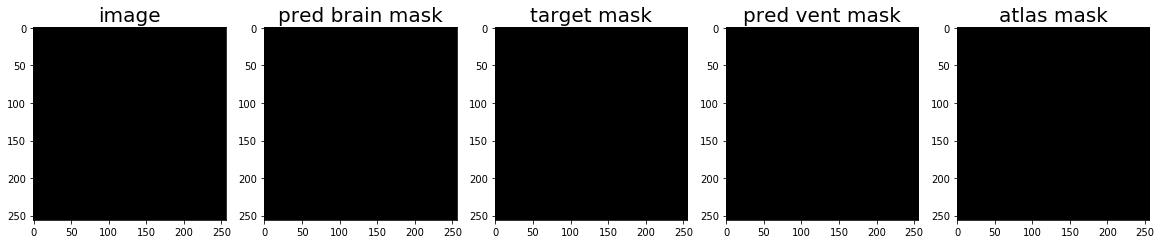

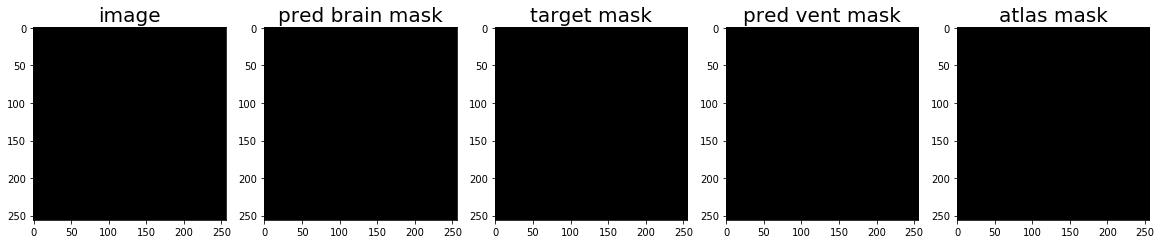

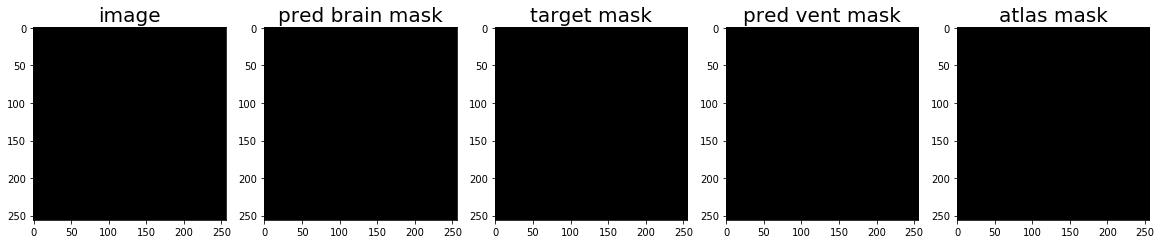

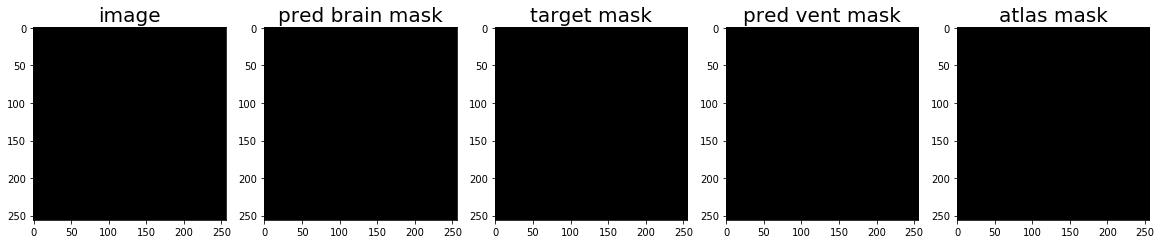

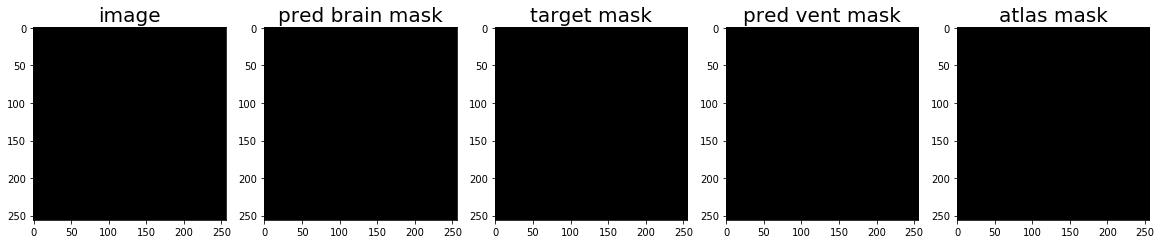

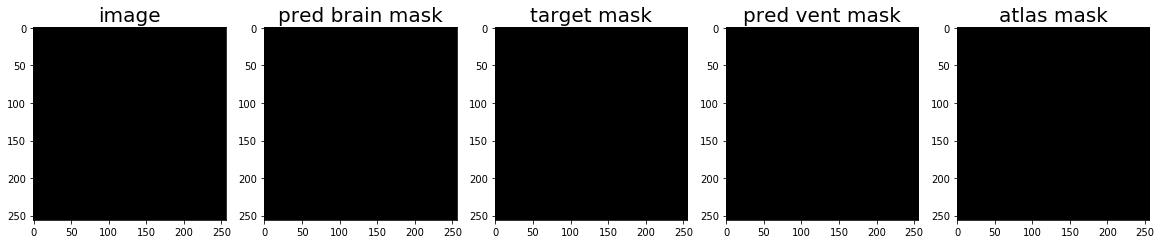

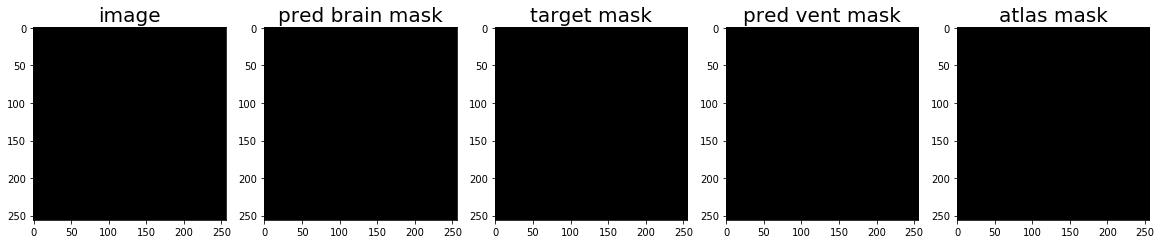

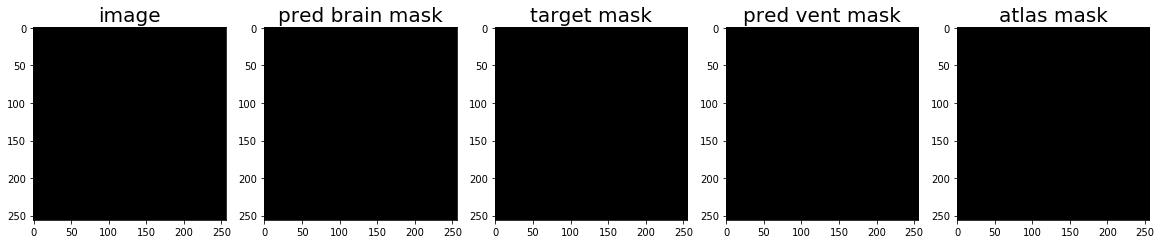

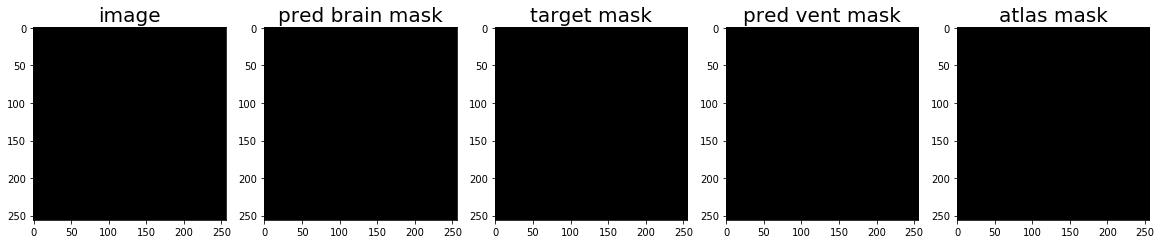

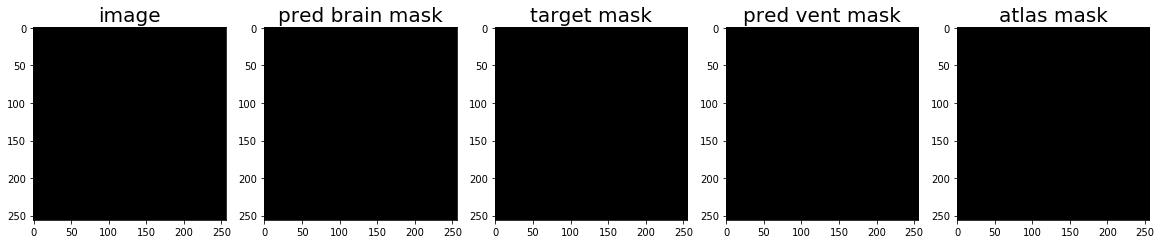

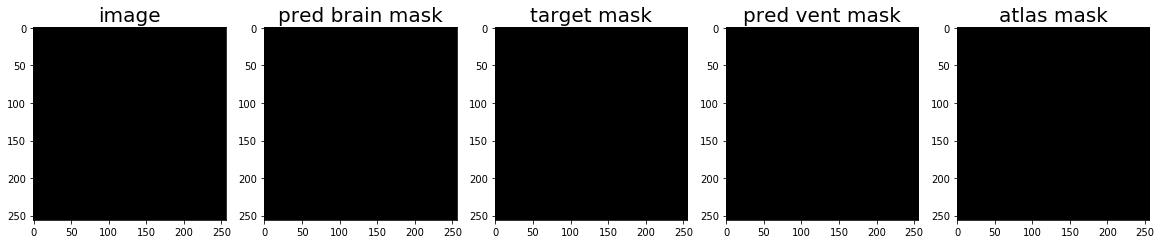

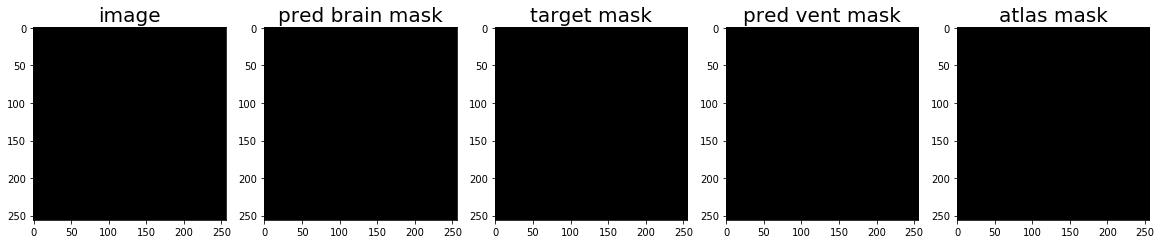

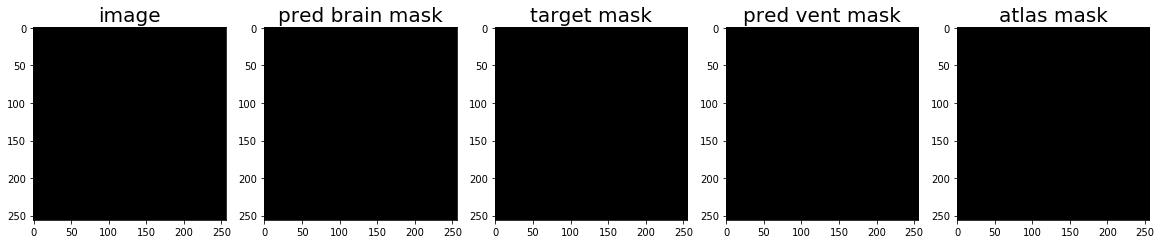

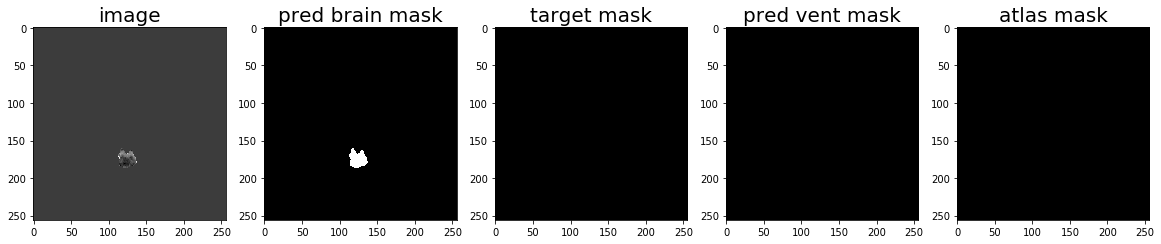

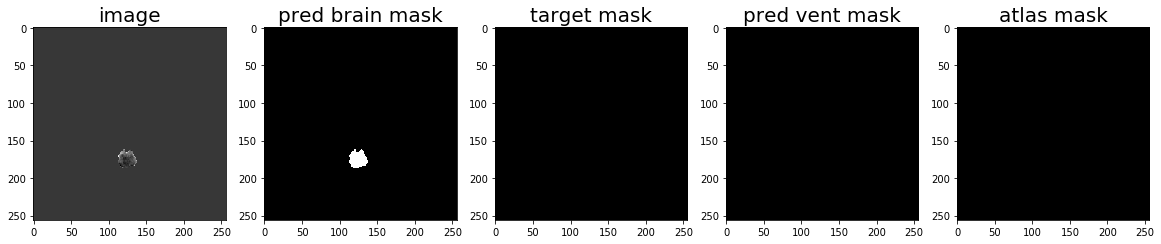

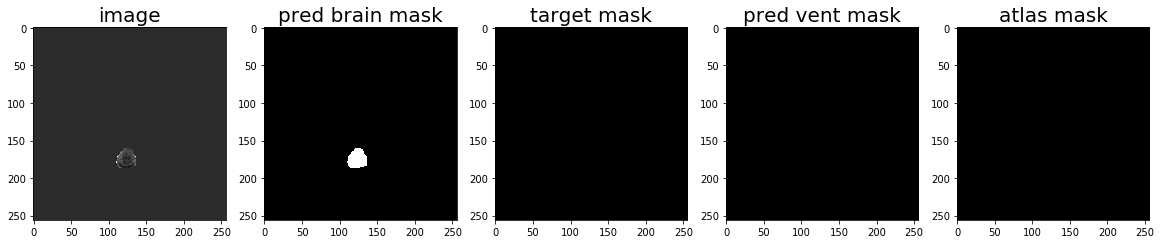

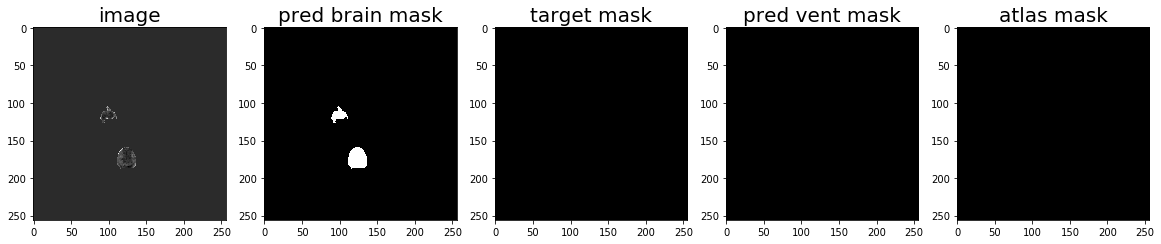

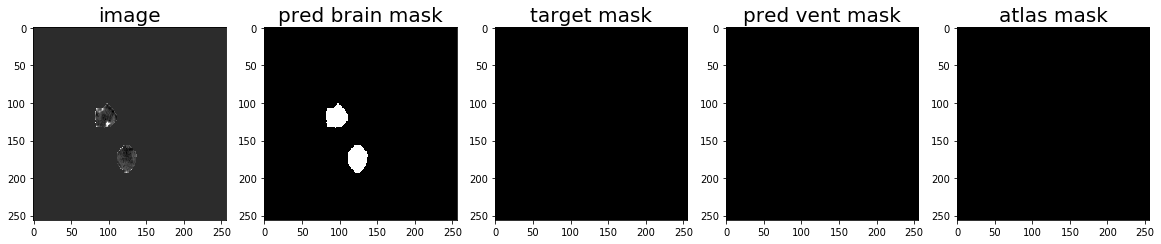

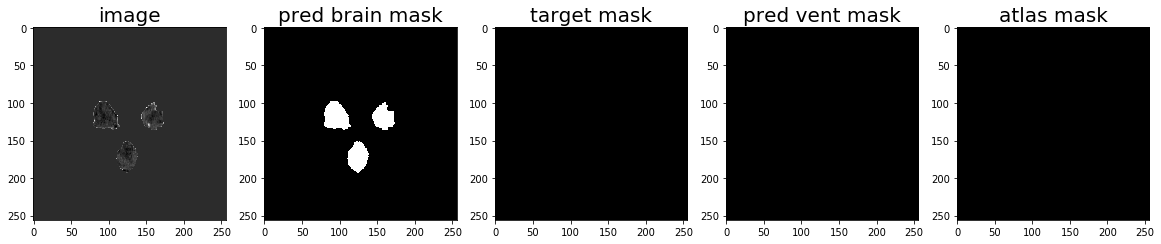

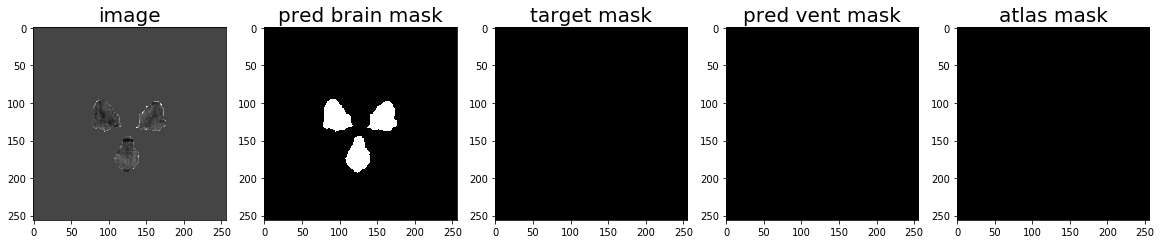

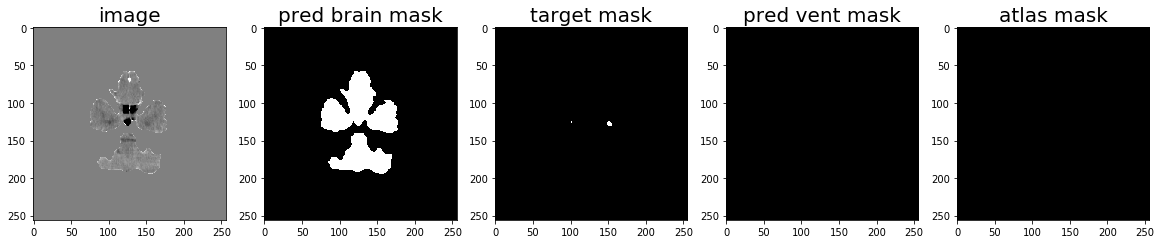

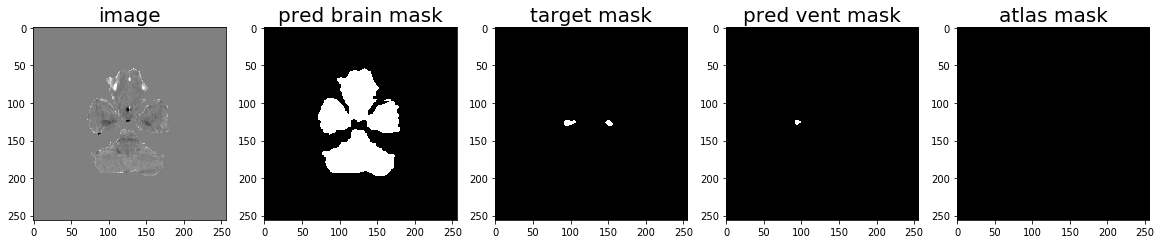

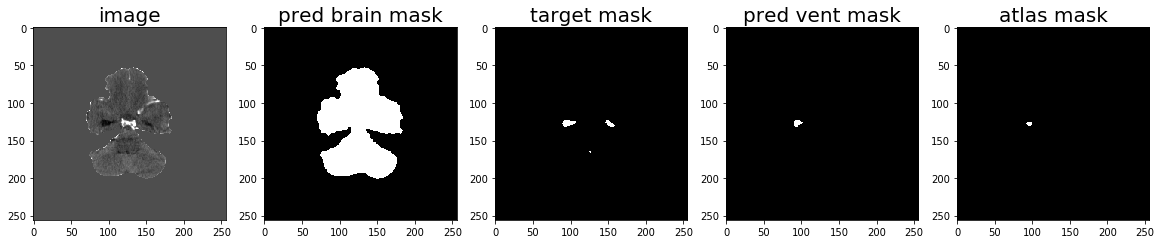

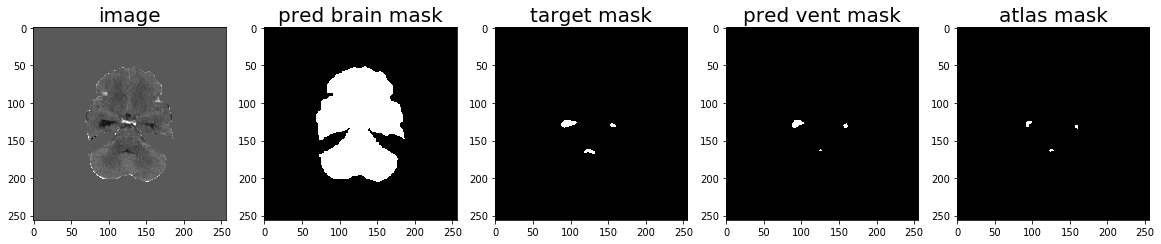

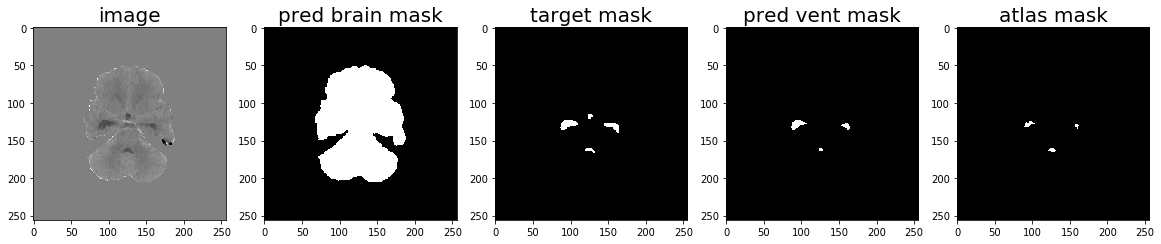

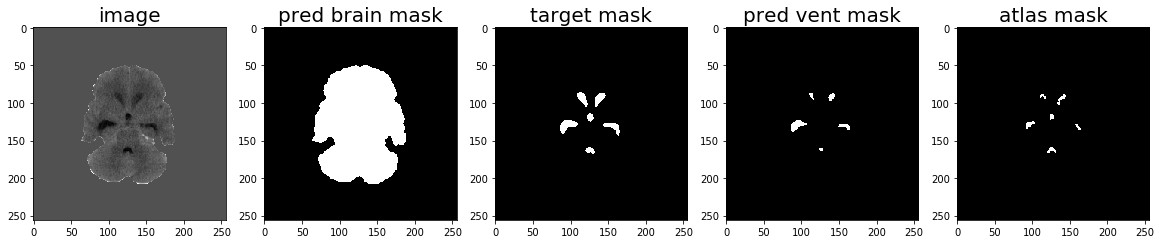

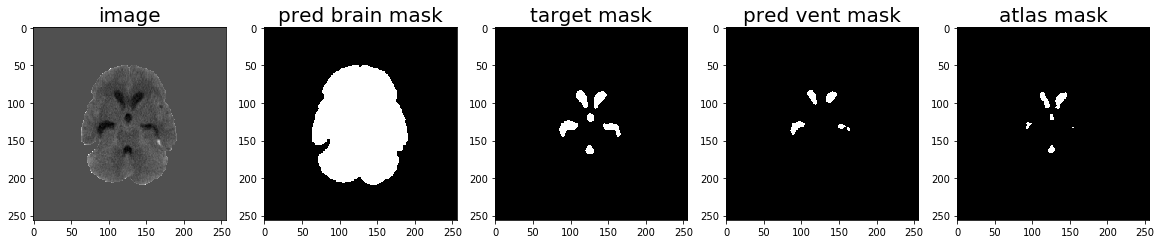

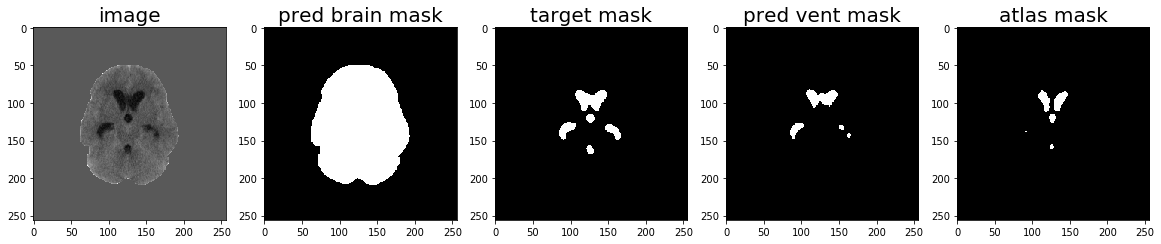

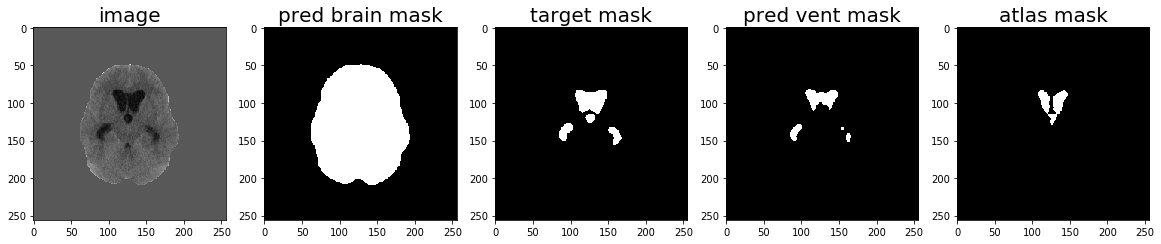

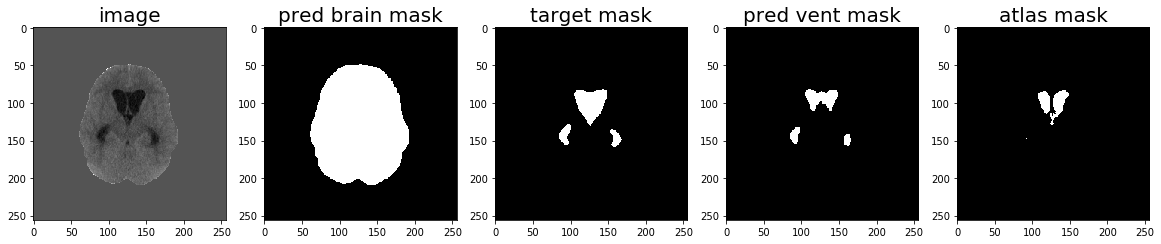

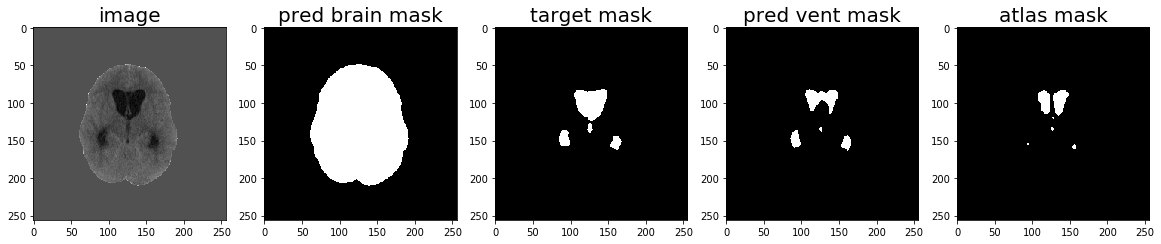

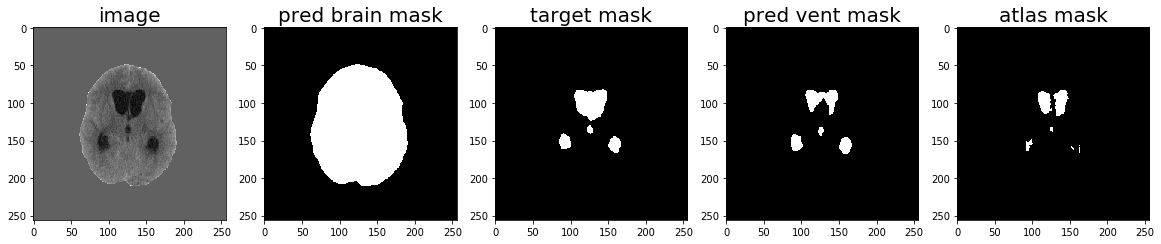

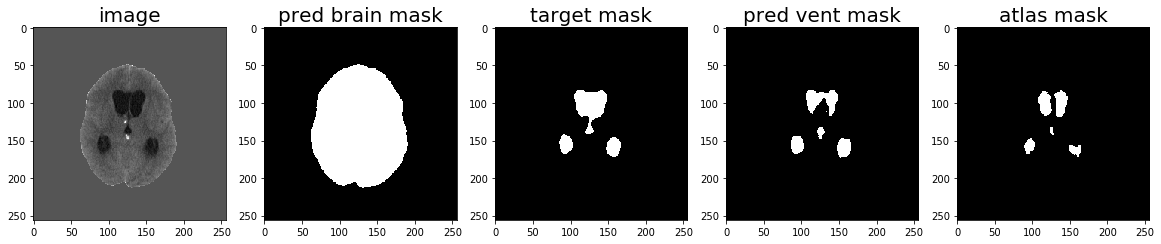

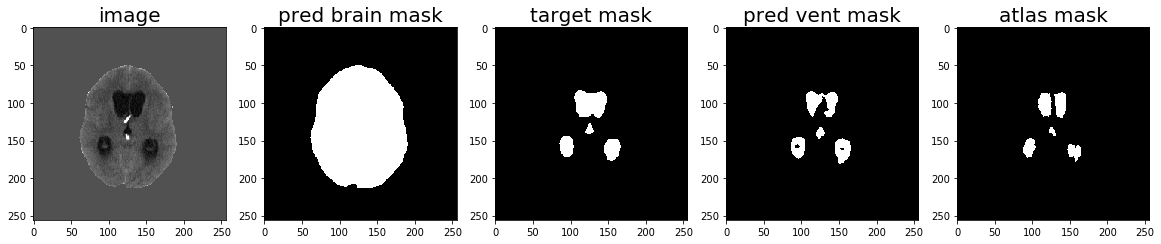

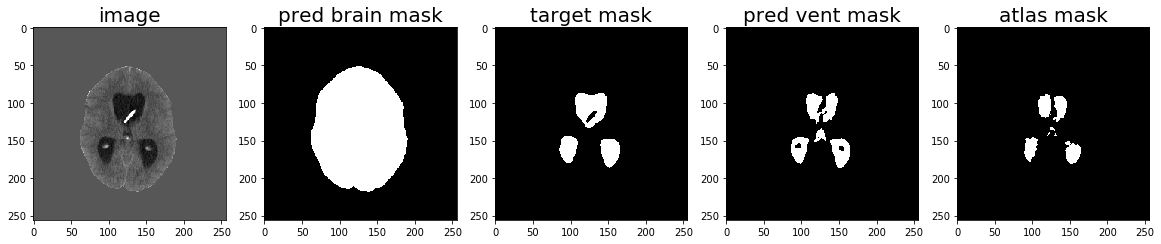

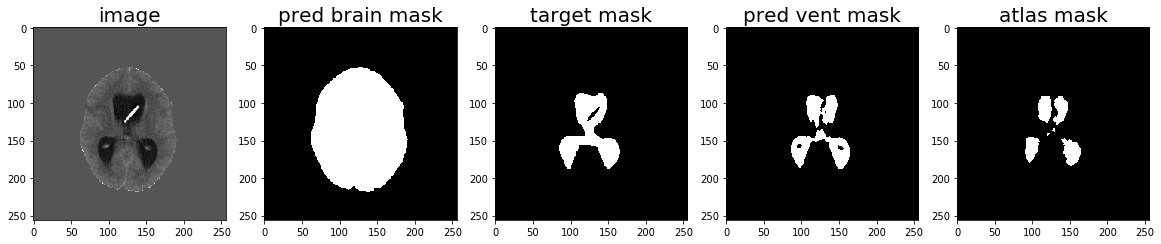

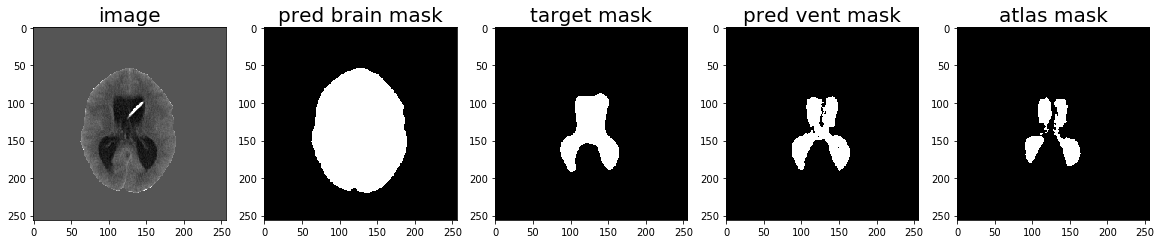

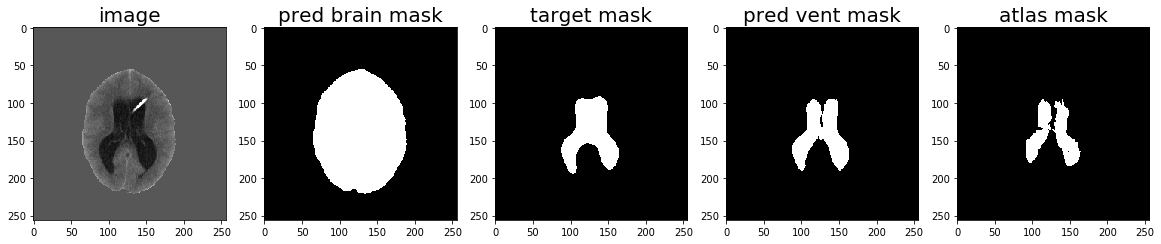

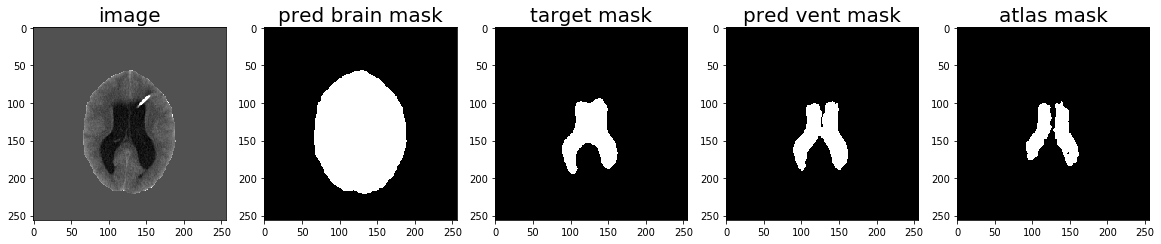

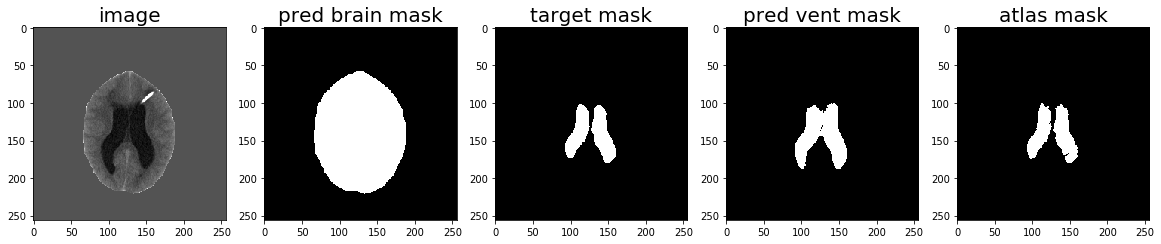

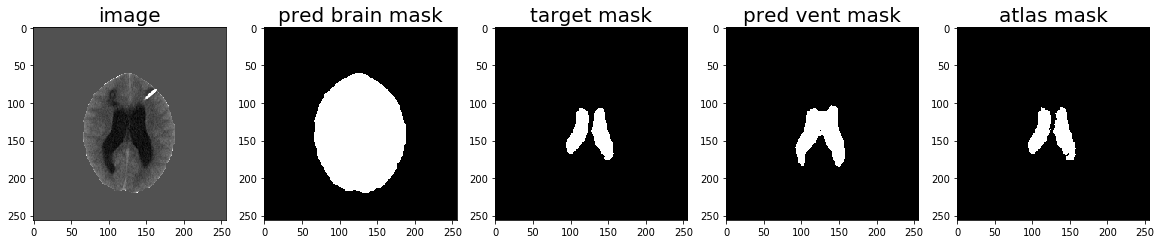

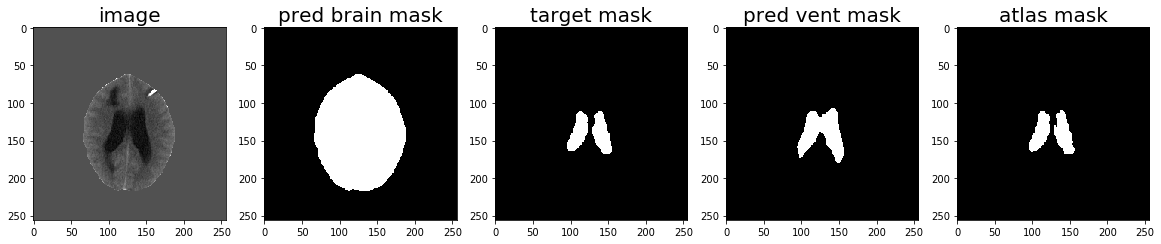

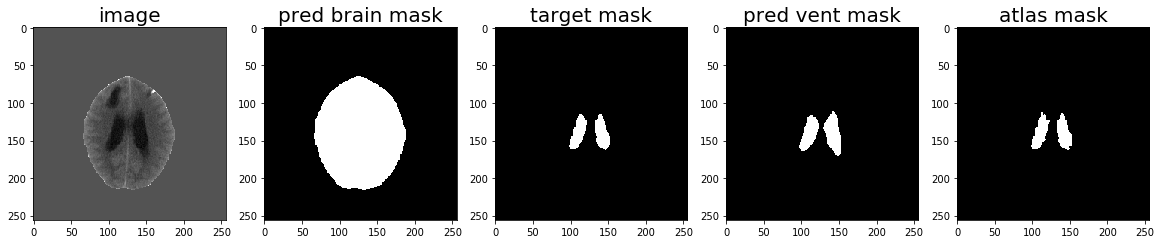

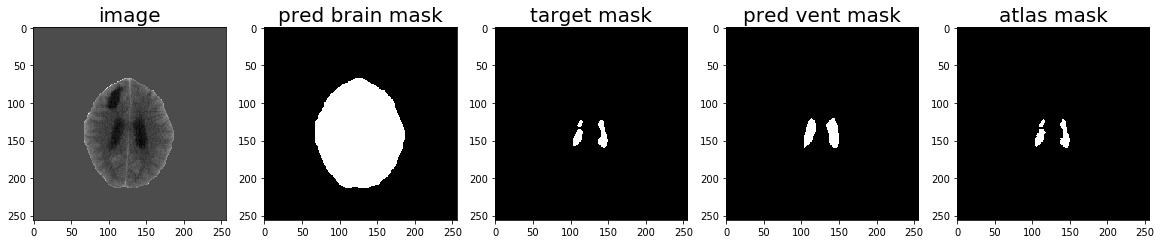

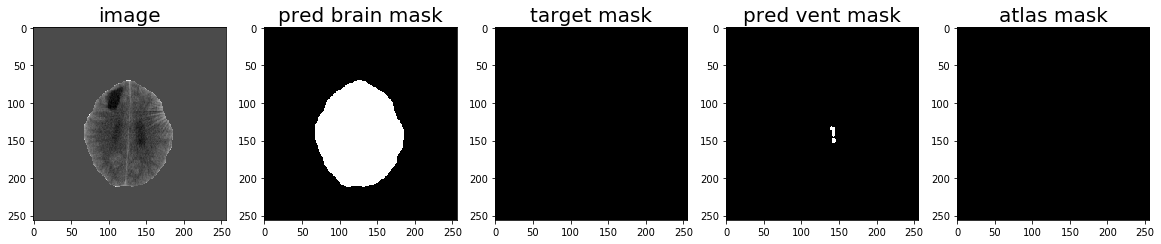

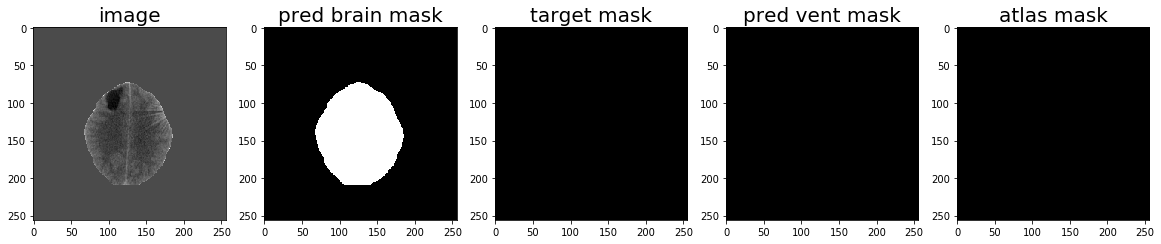

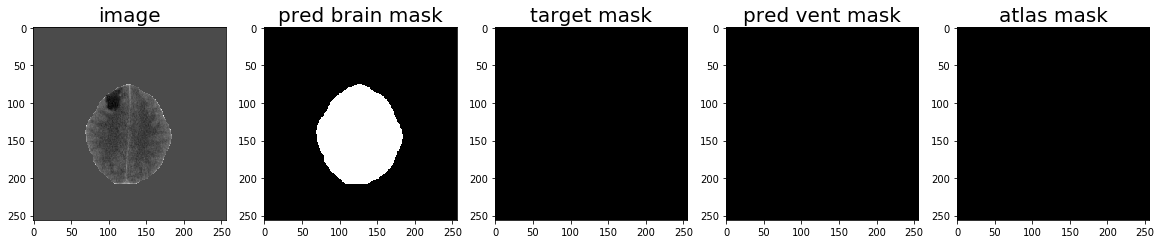

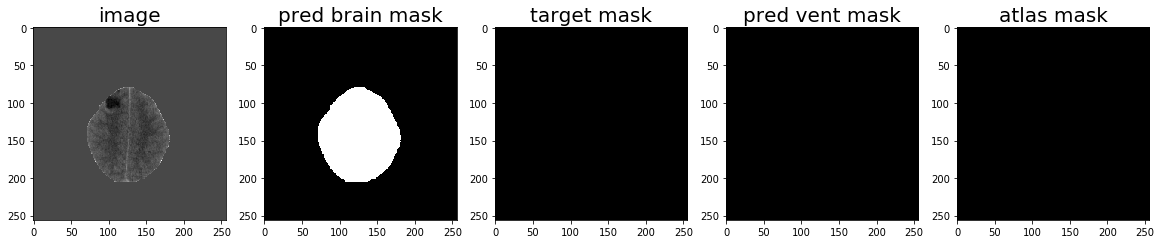

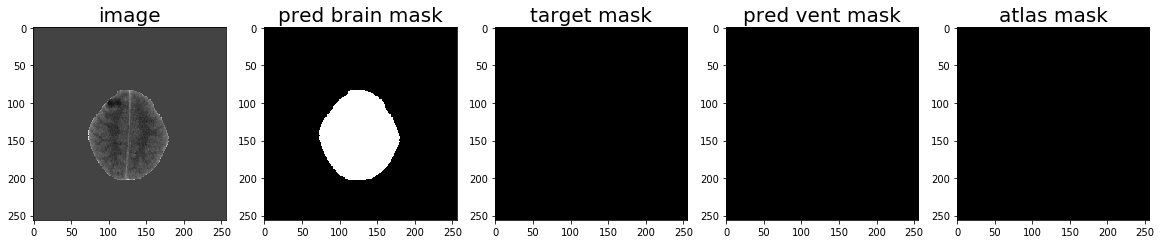

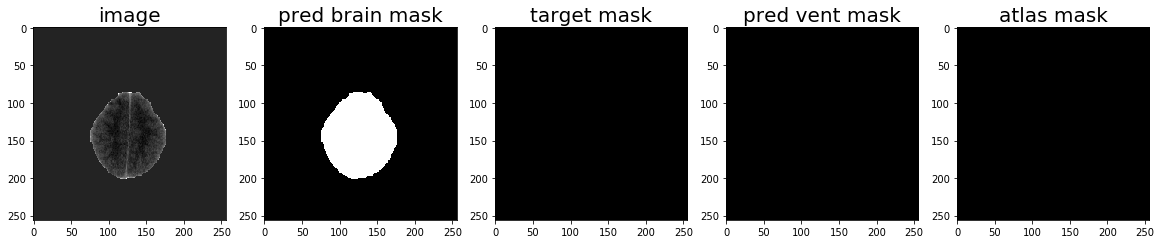

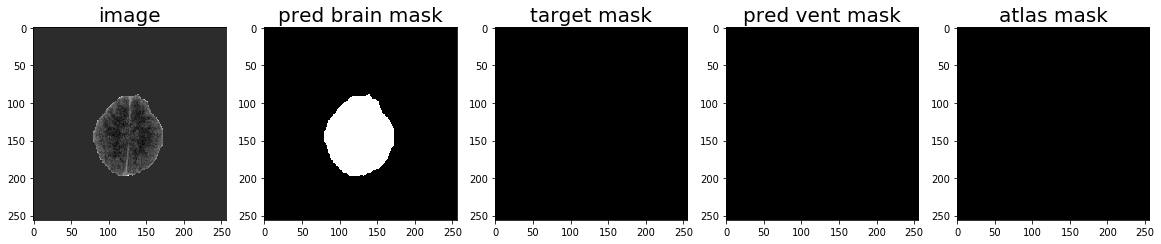

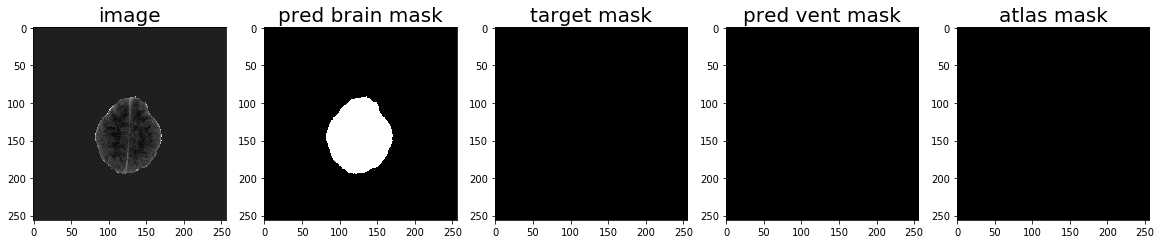

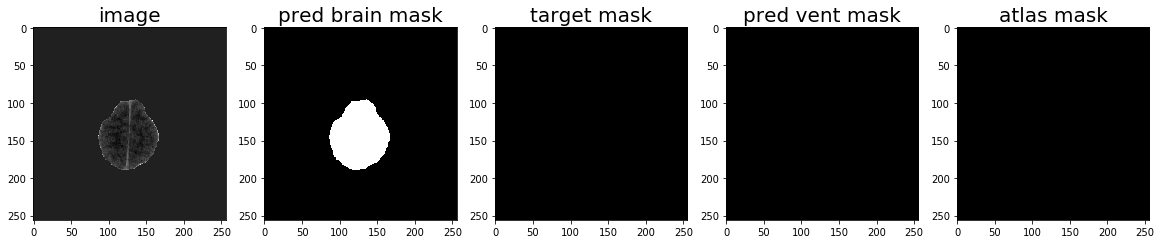

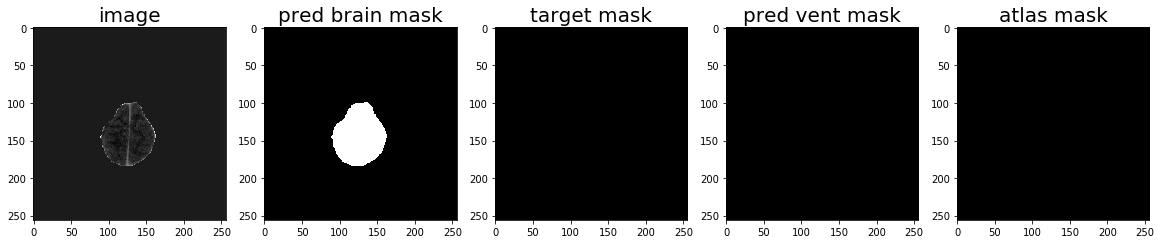

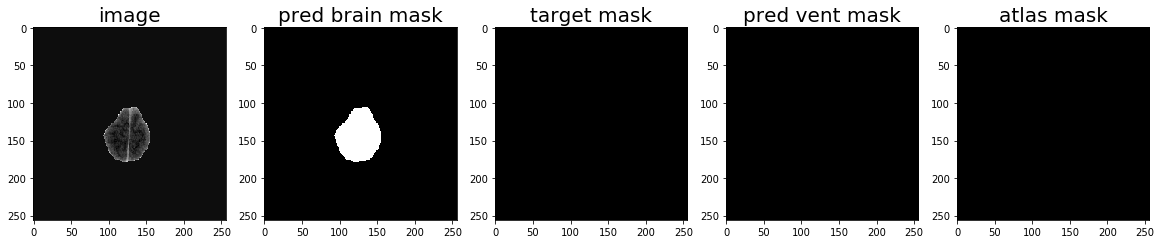

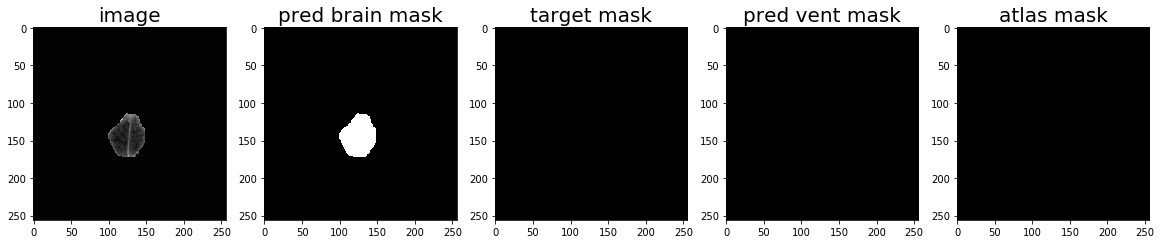

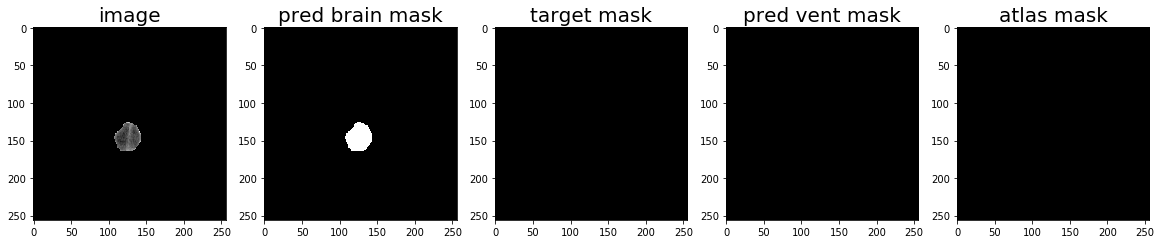

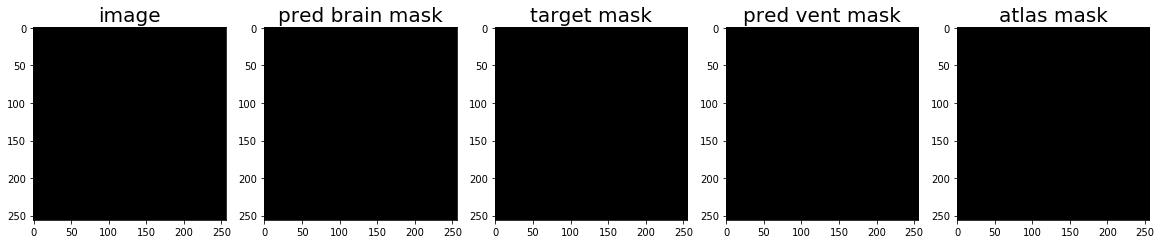

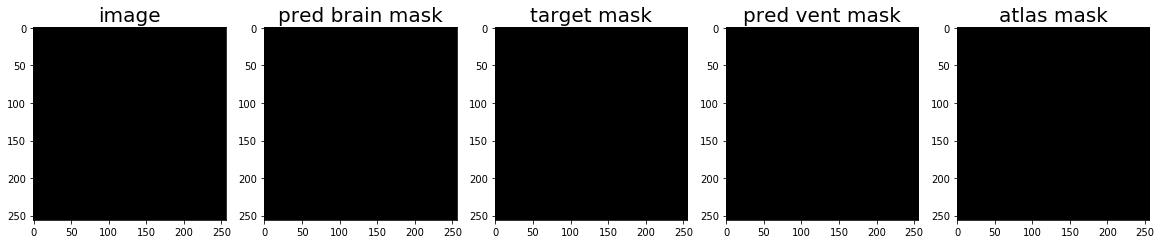

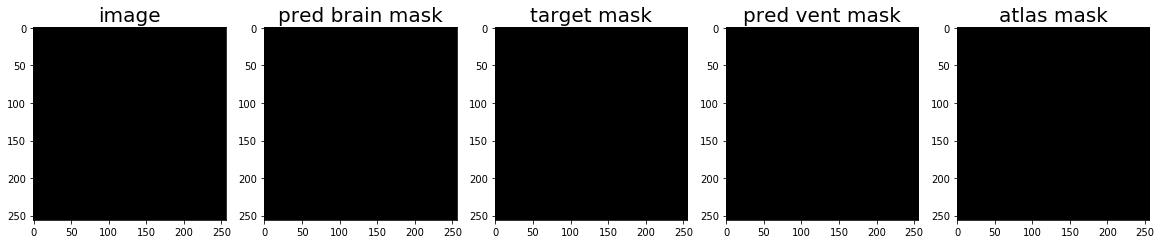

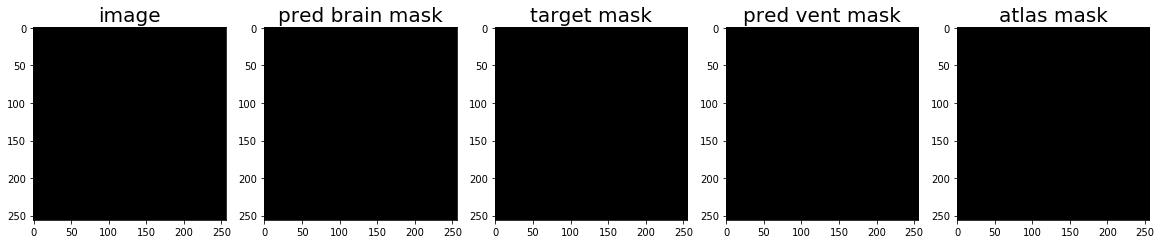

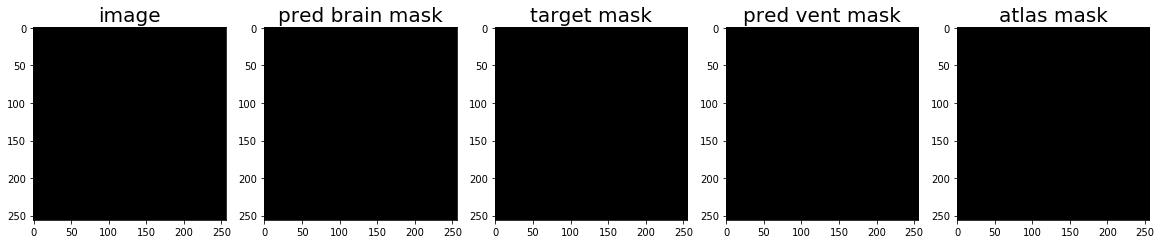

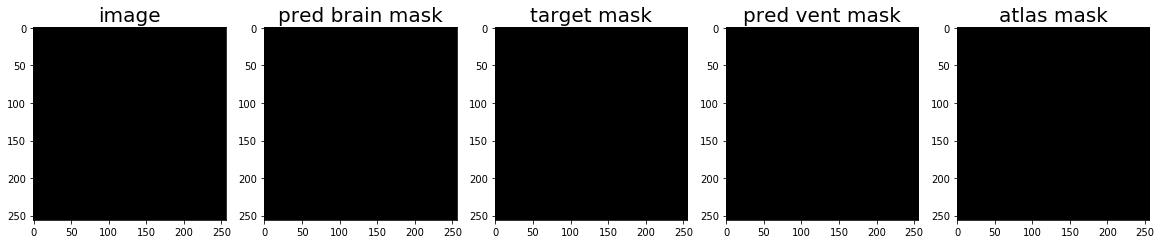

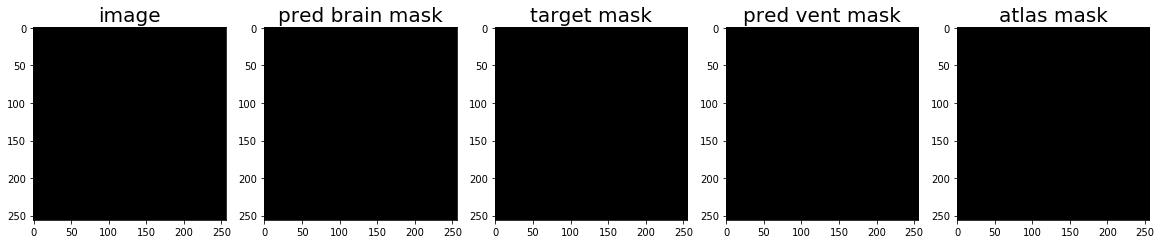

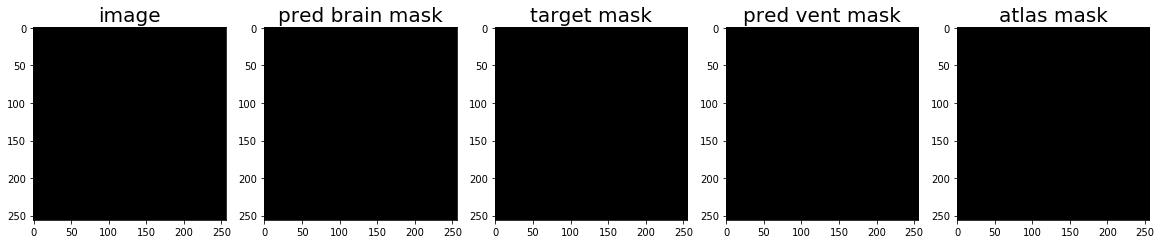

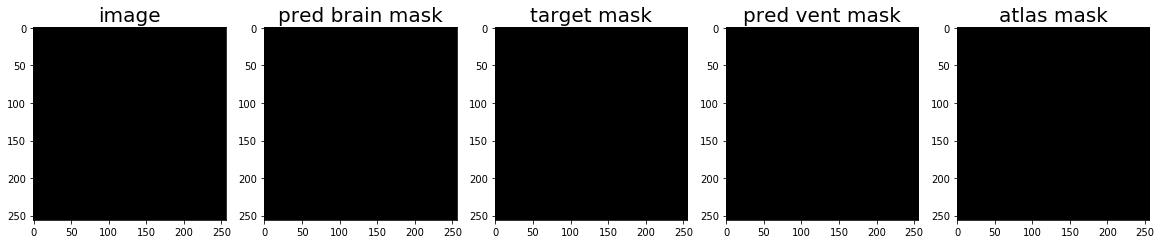

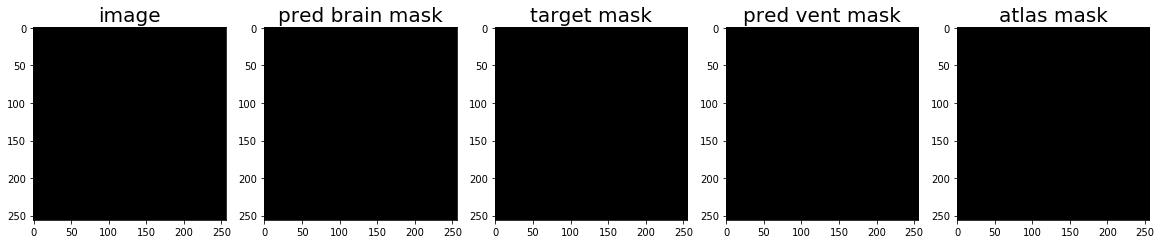

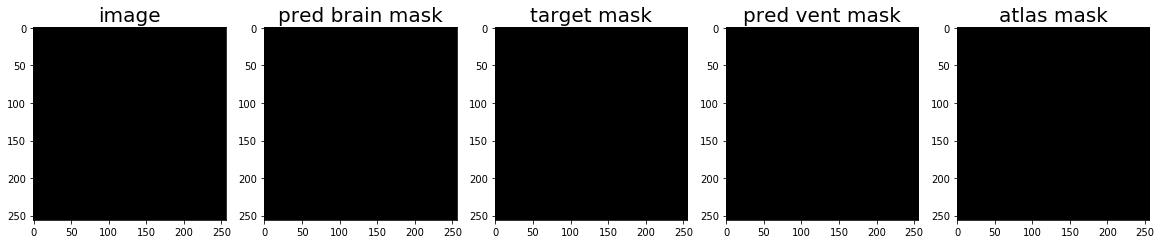

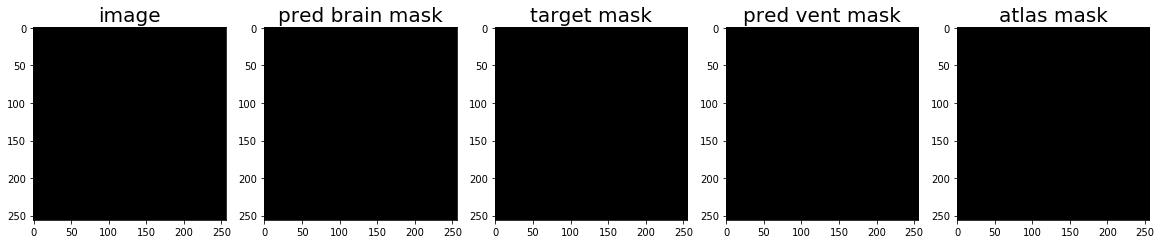

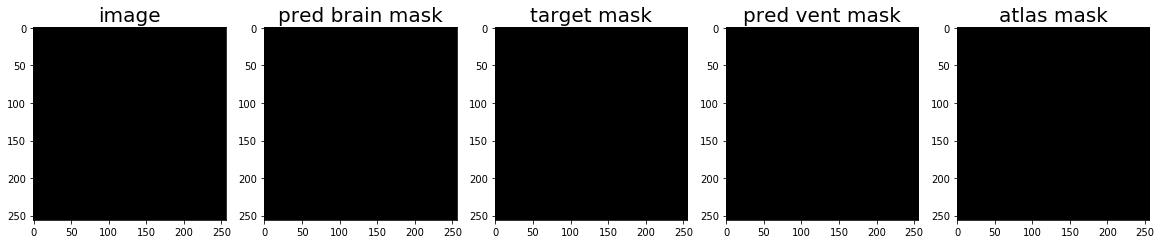

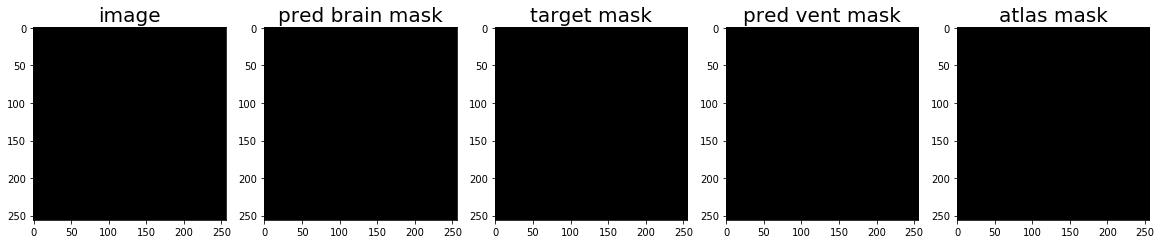

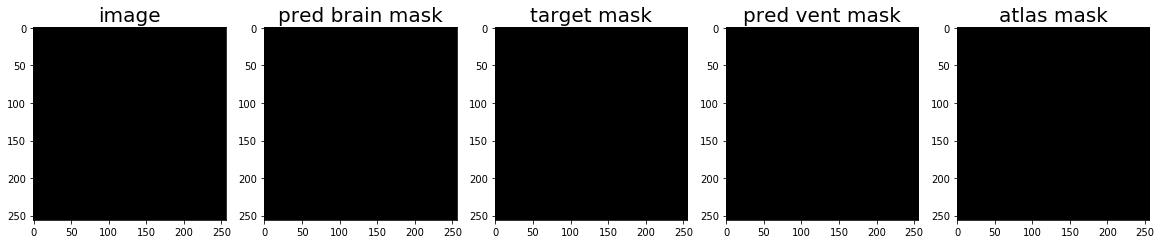

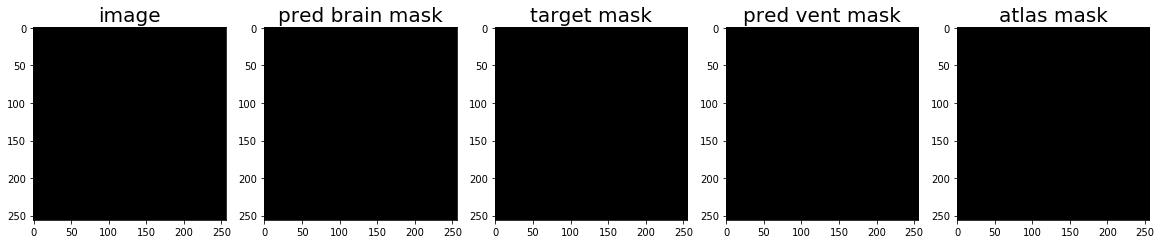

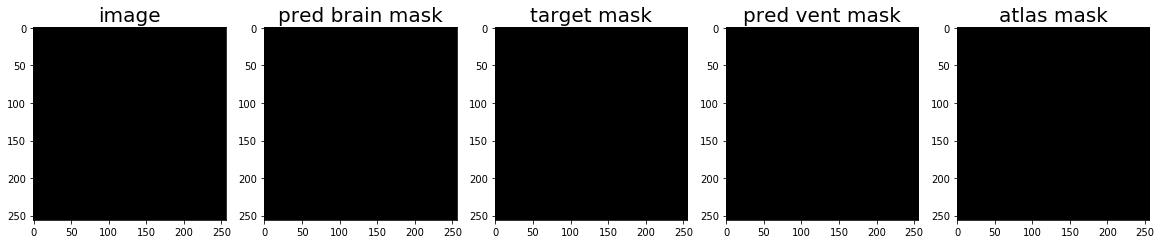

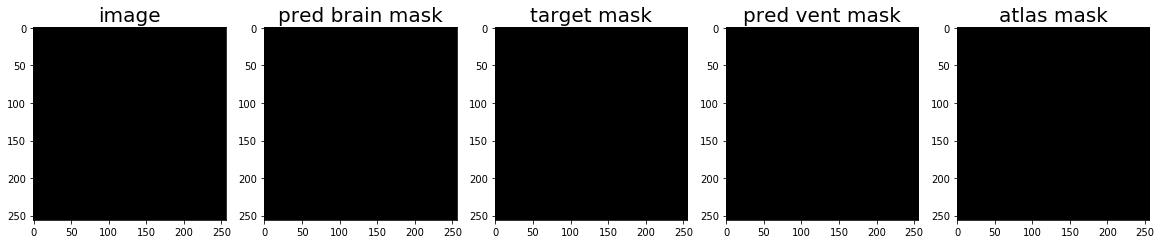

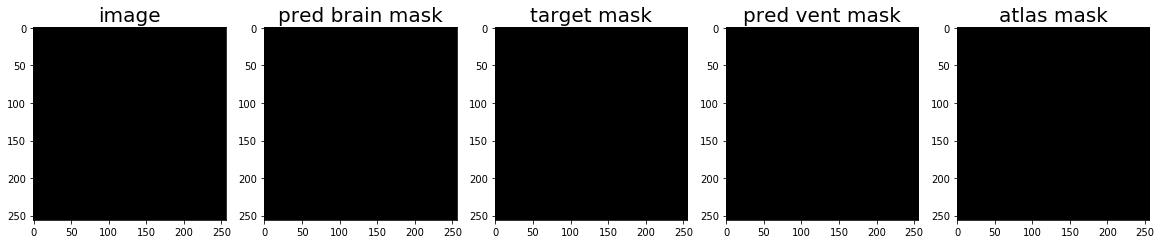

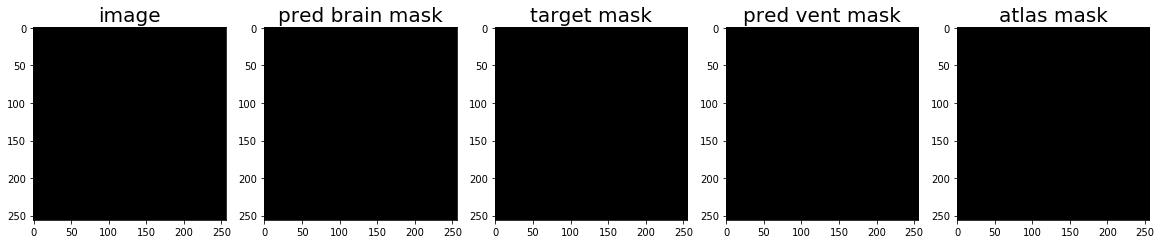

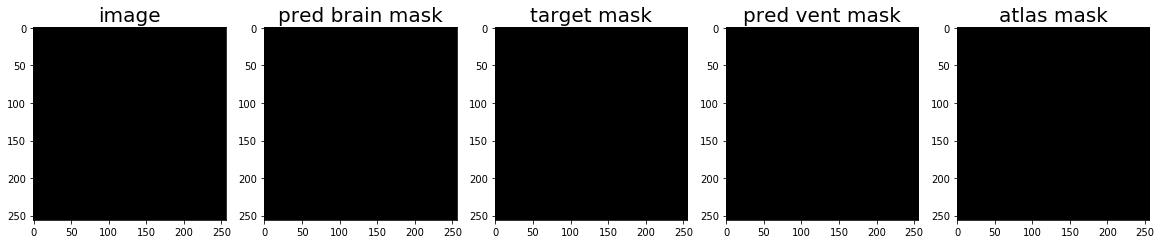

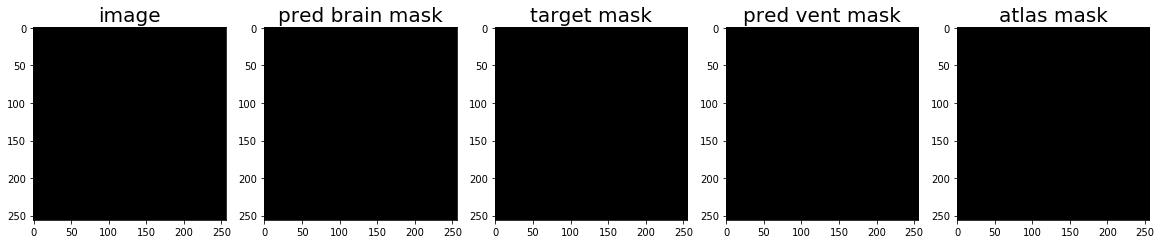

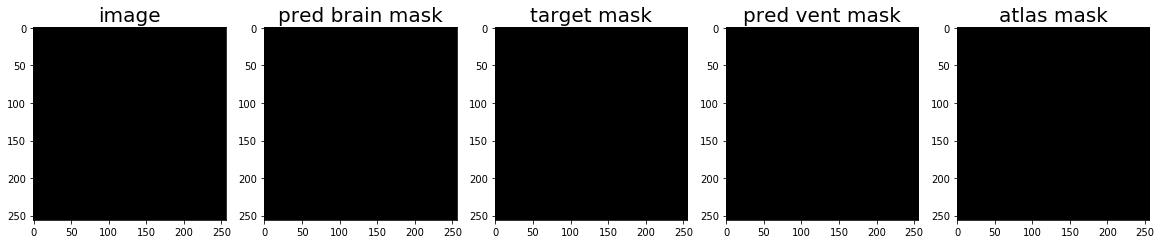

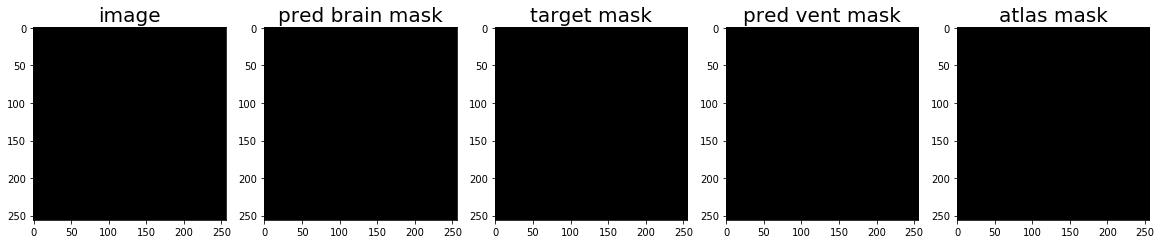

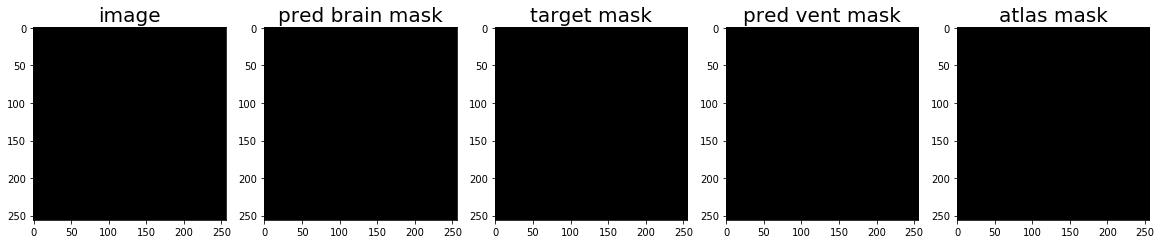

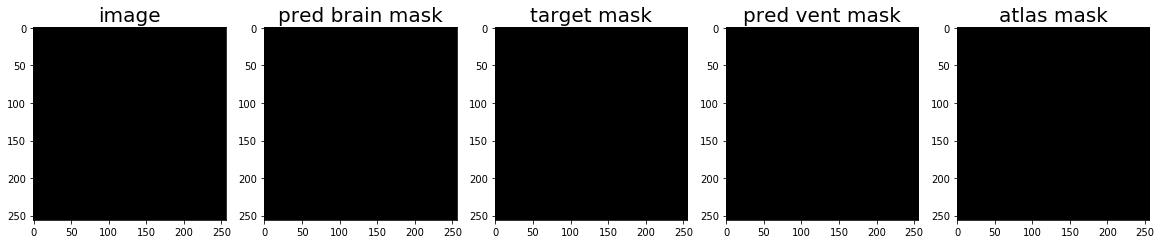

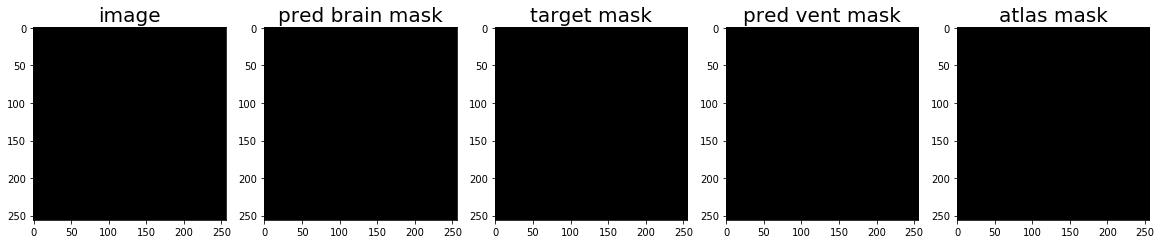

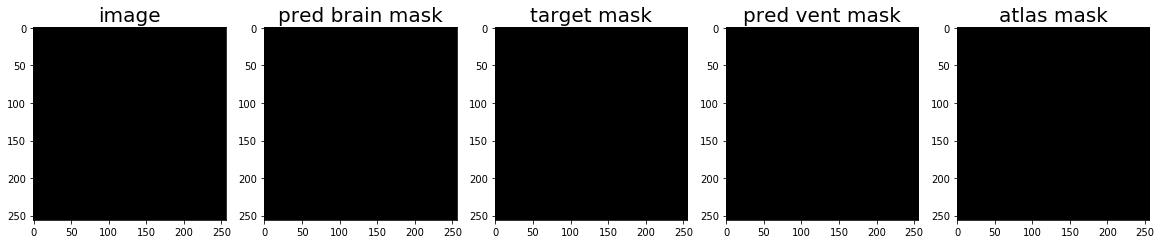

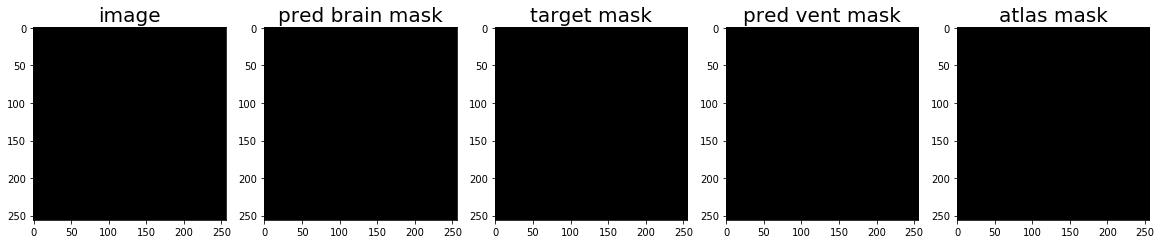

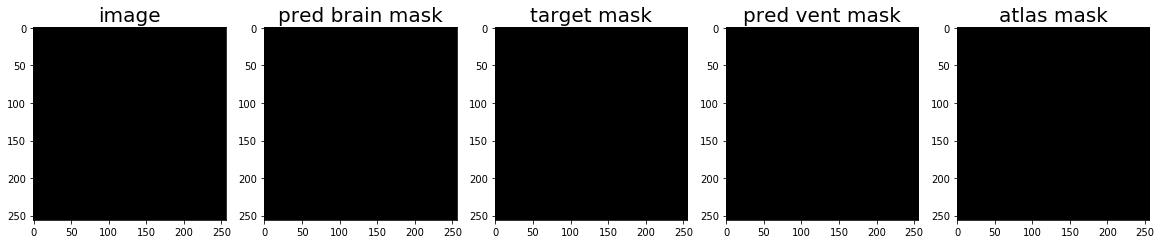

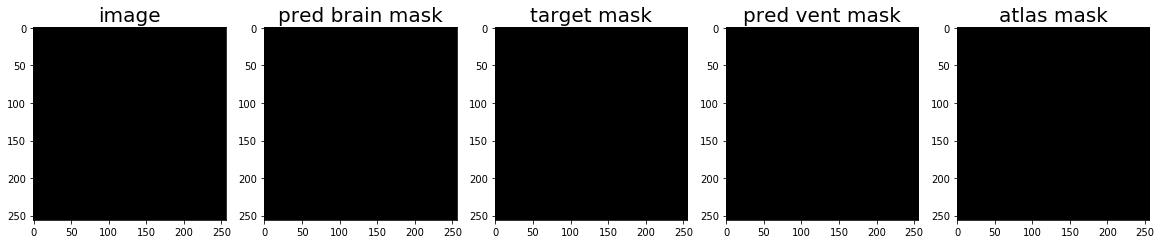

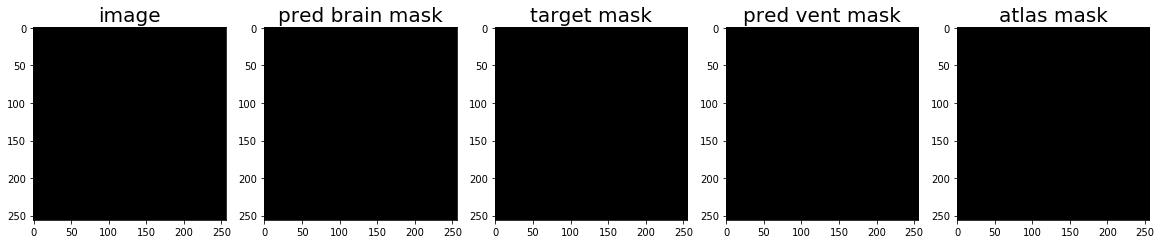

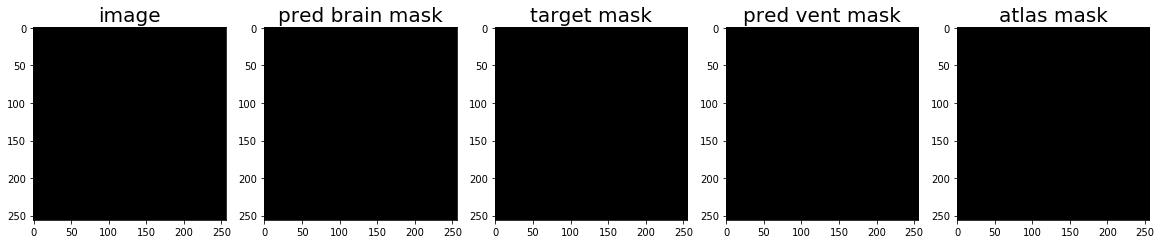

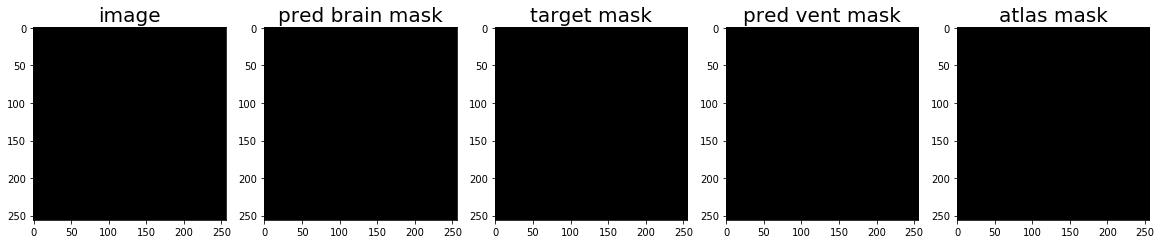

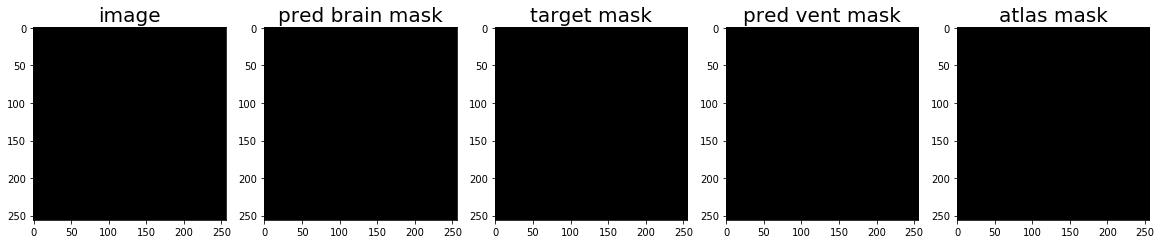

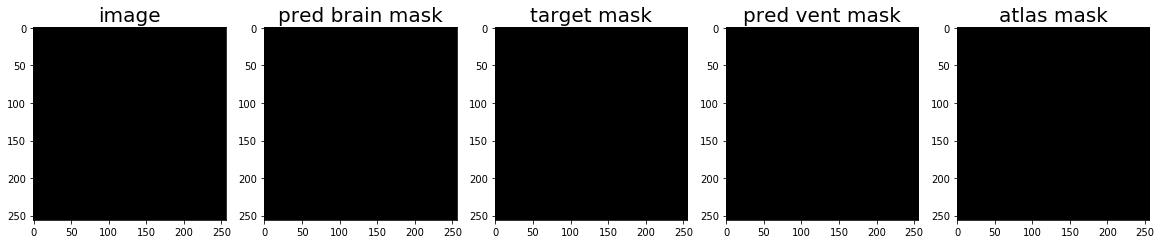

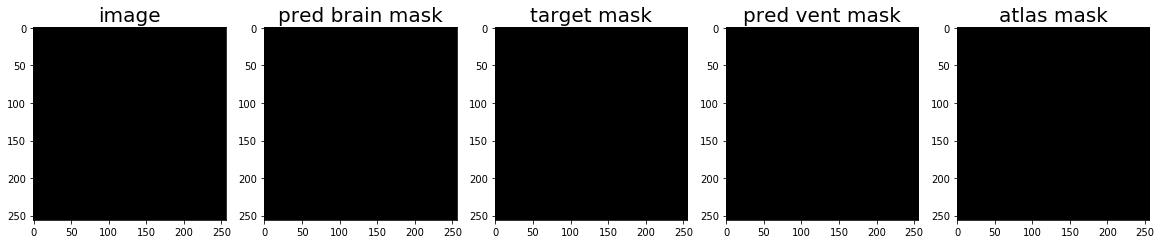

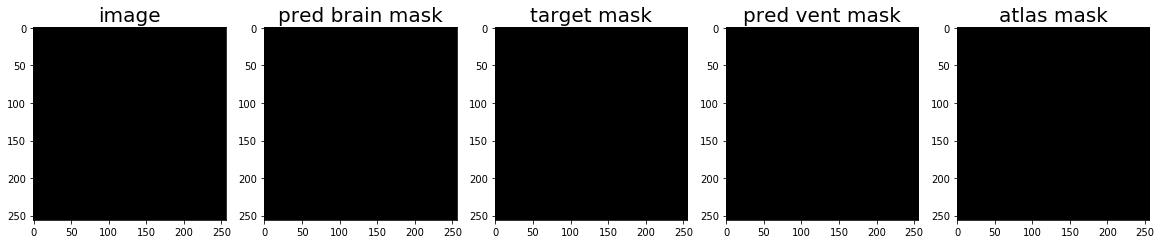

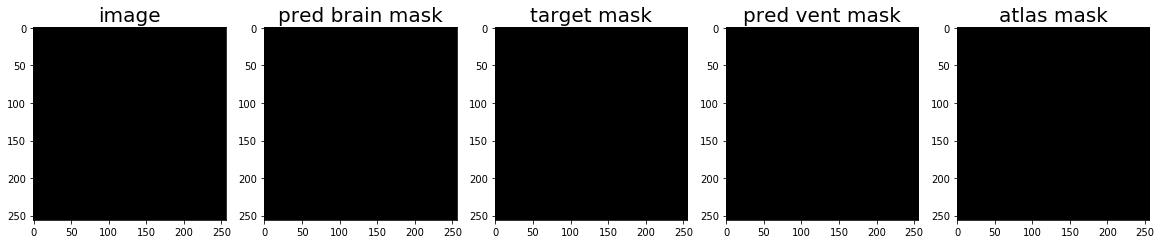

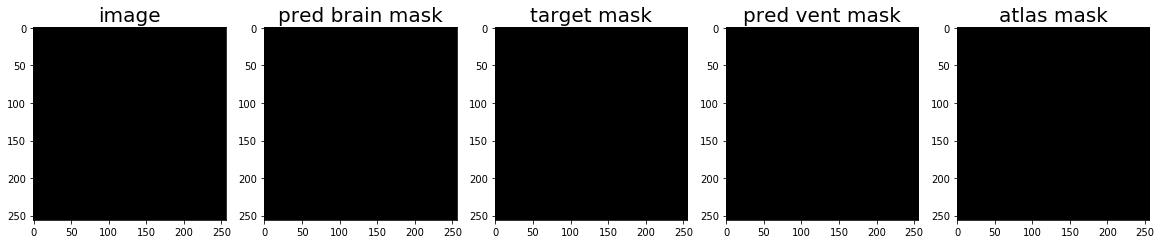

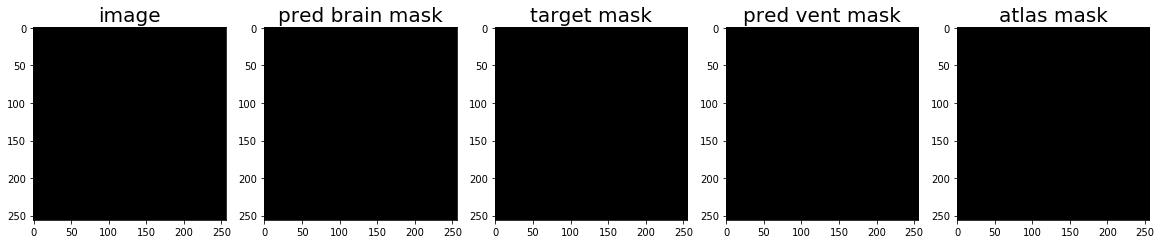

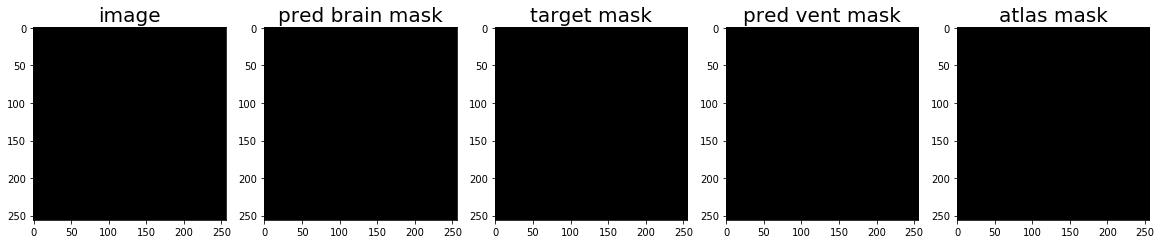

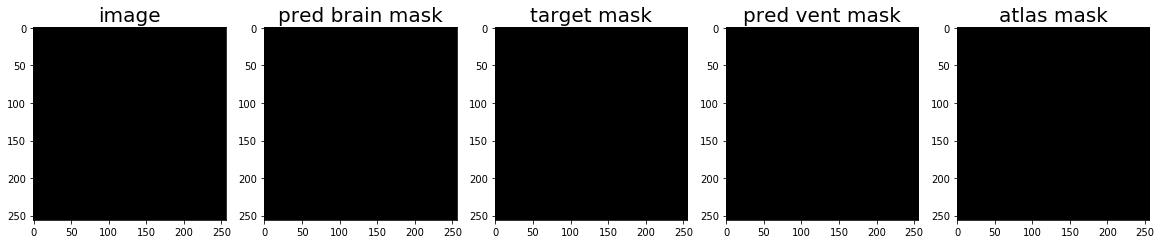

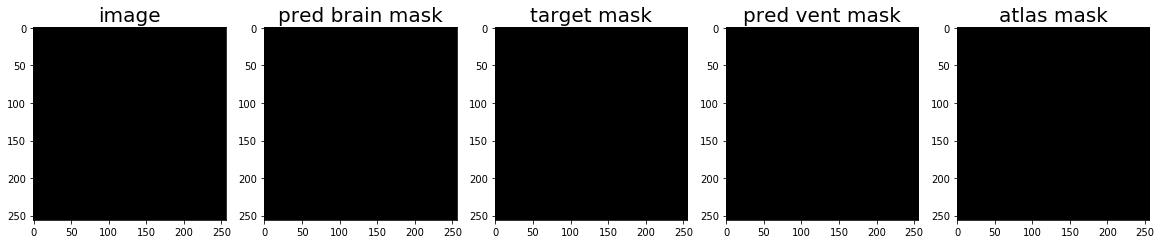

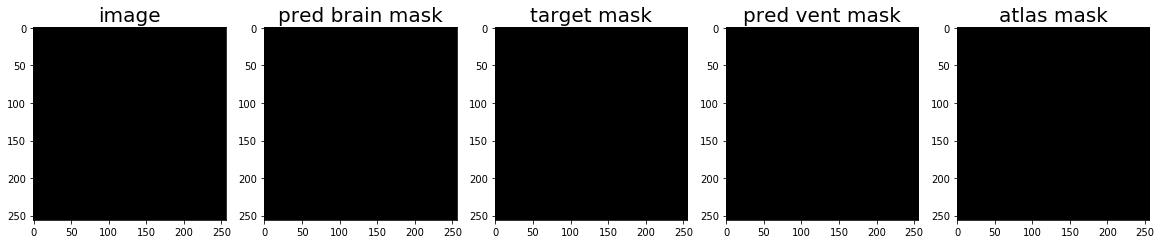

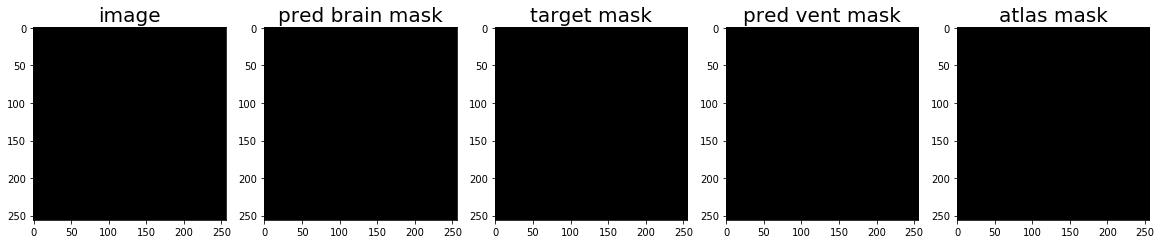

In [333]:
IMG_NUM = 8
image = images[IMG_NUM]
target = target_masks[IMG_NUM]
pred = pred_masks[IMG_NUM]
atlas = atlas_masks[IMG_NUM]
pred_brain = pred_brain_masks[IMG_NUM]

for i in range(image.shape[0]):
    plot_images(image[i], pred_brain[i], target[i], pred[i], atlas[i])

## Overlay View

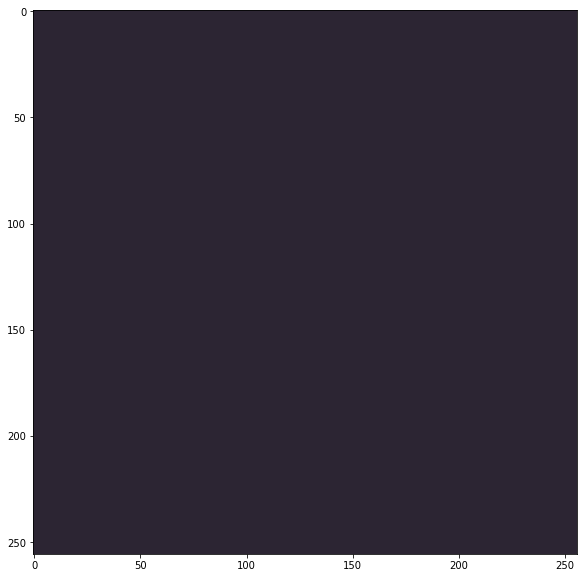

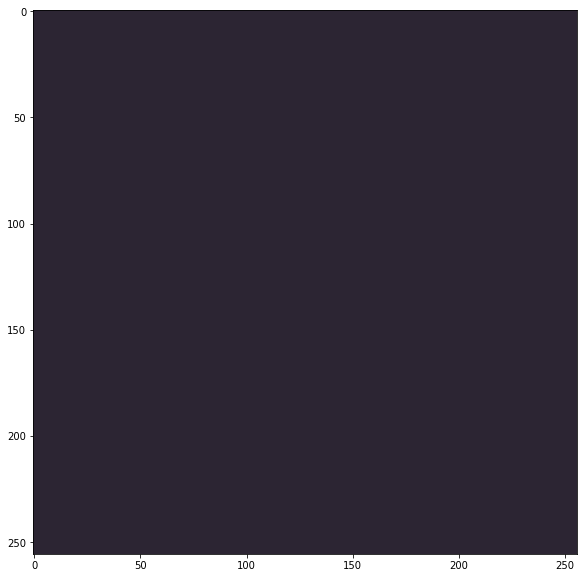

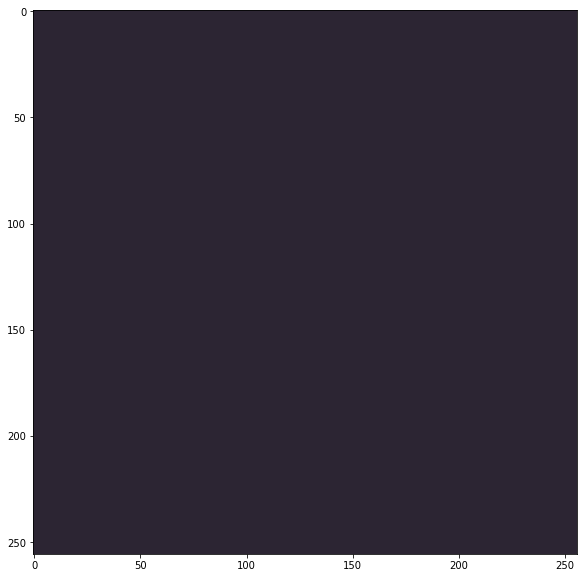

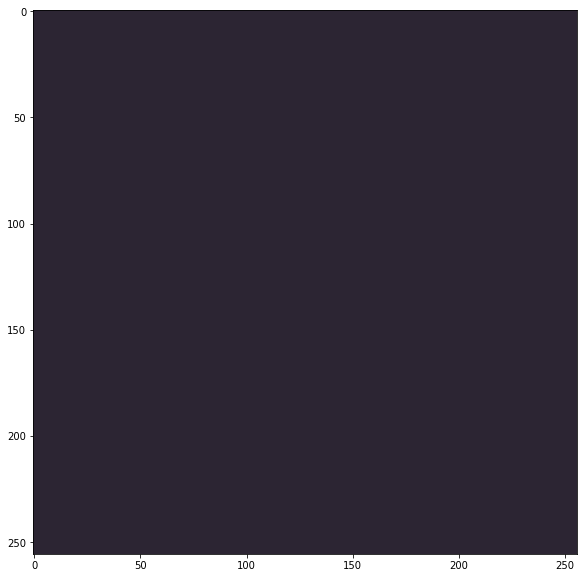

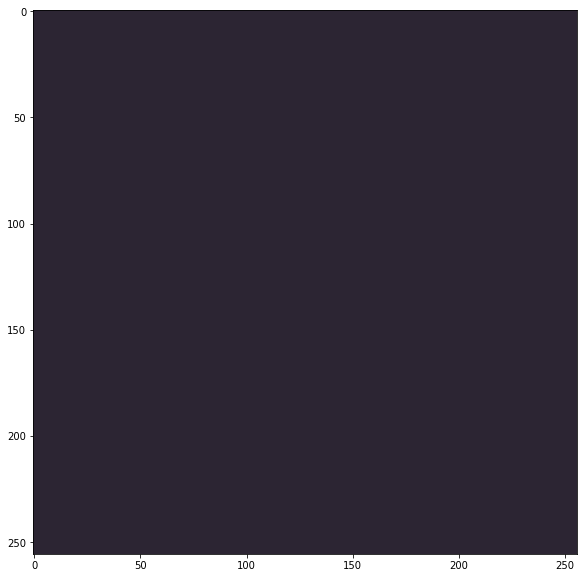

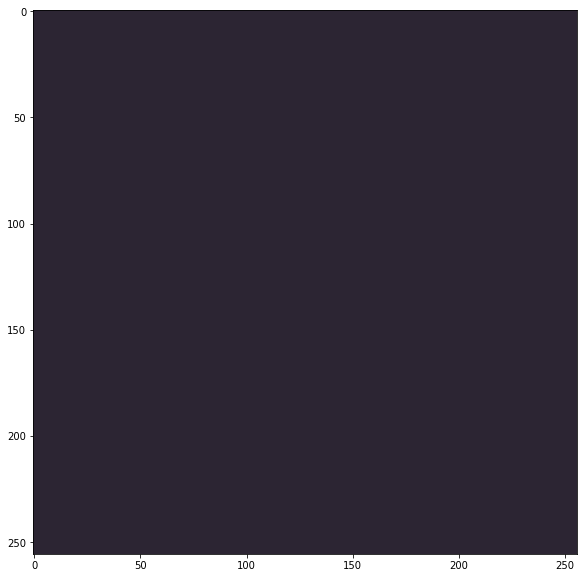

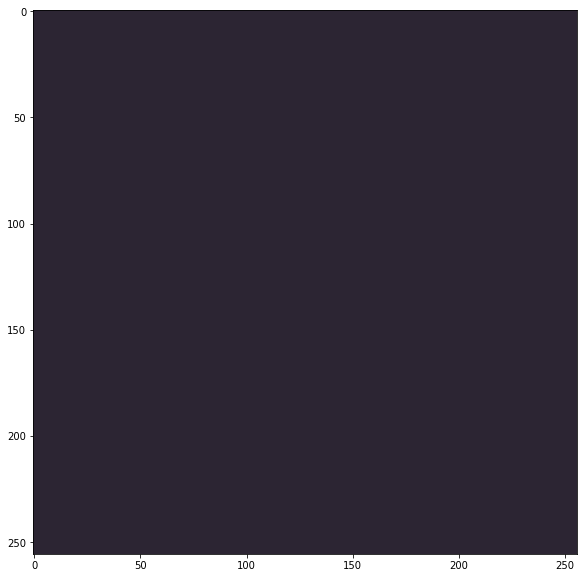

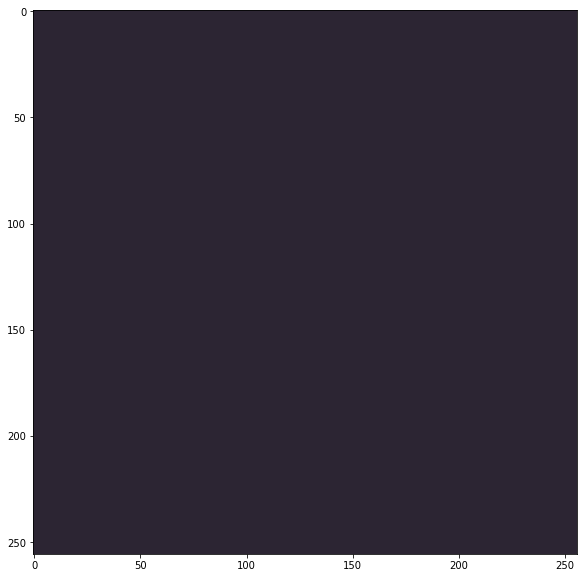

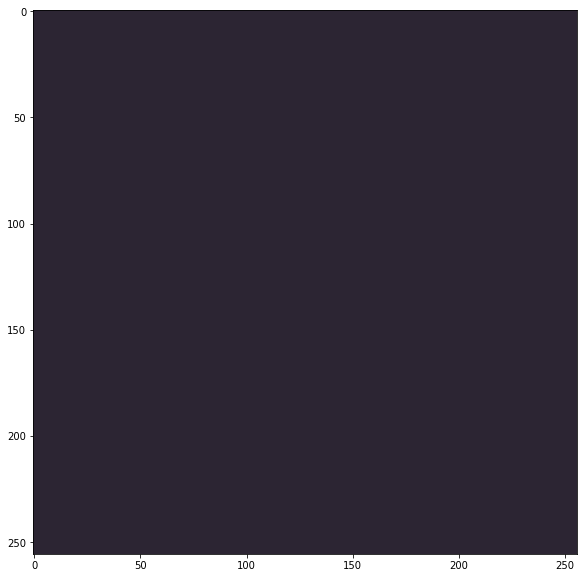

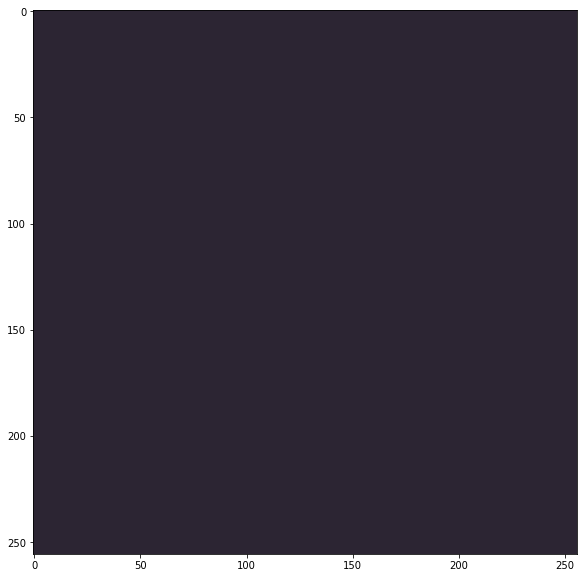

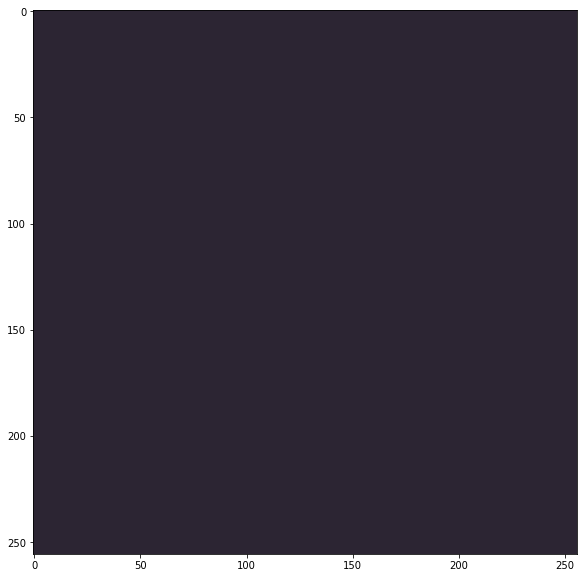

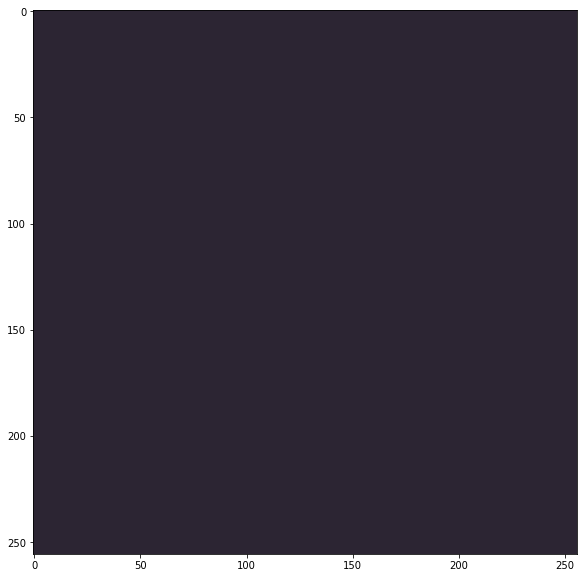

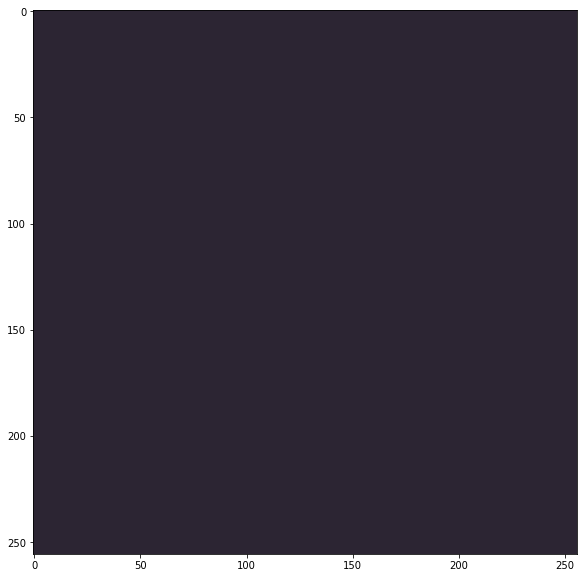

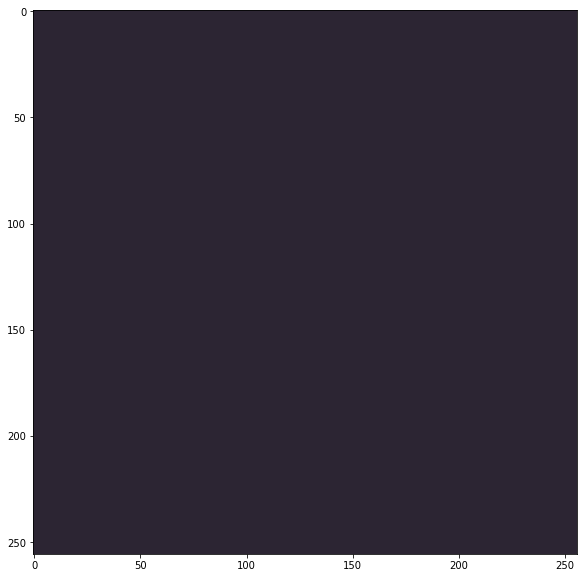

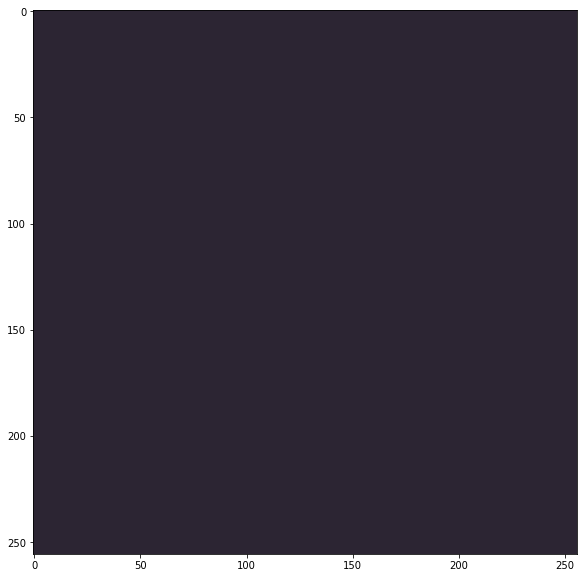

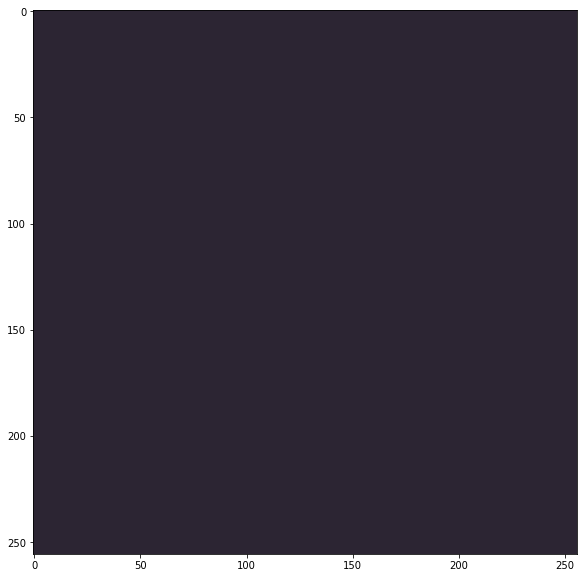

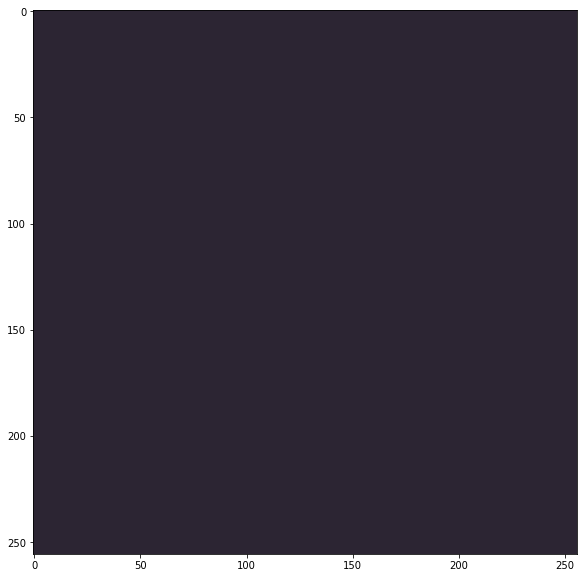

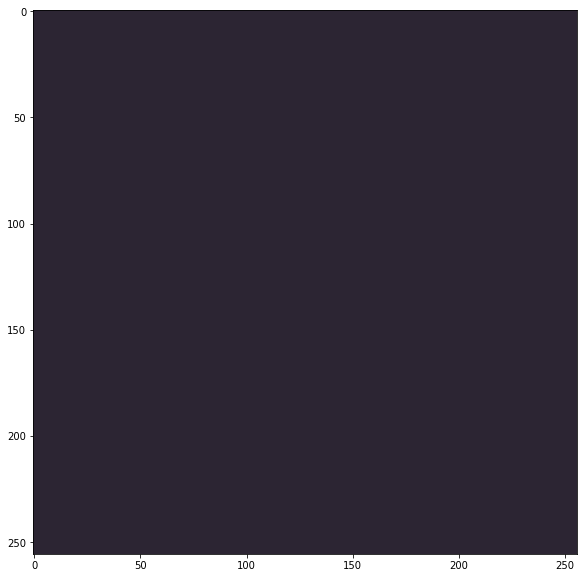

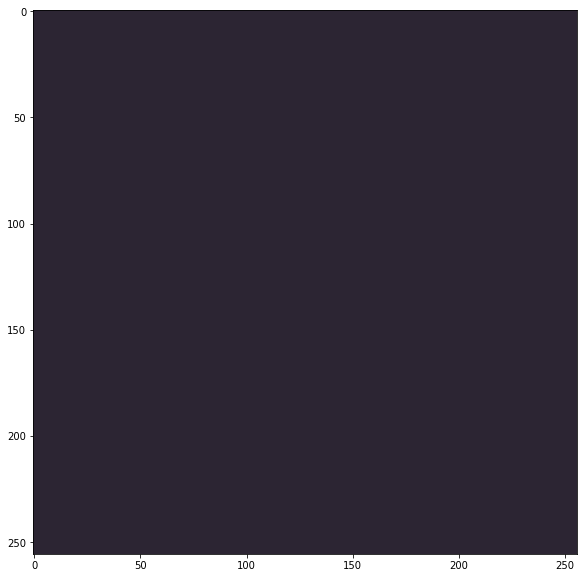

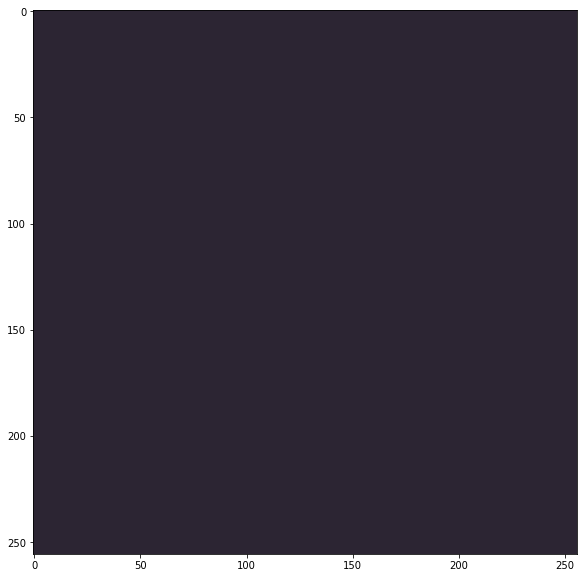

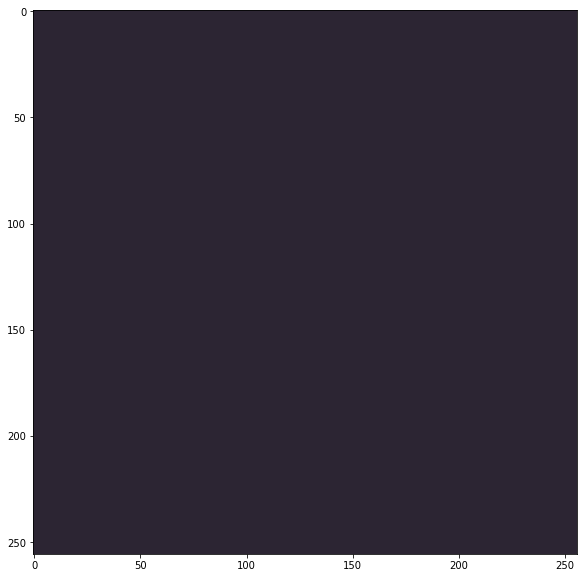

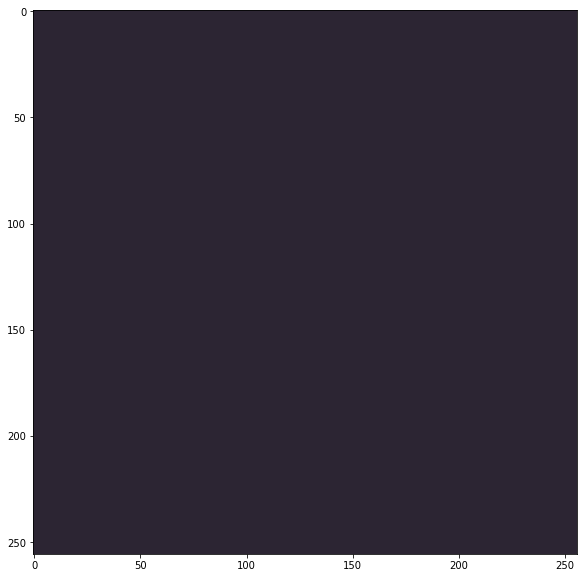

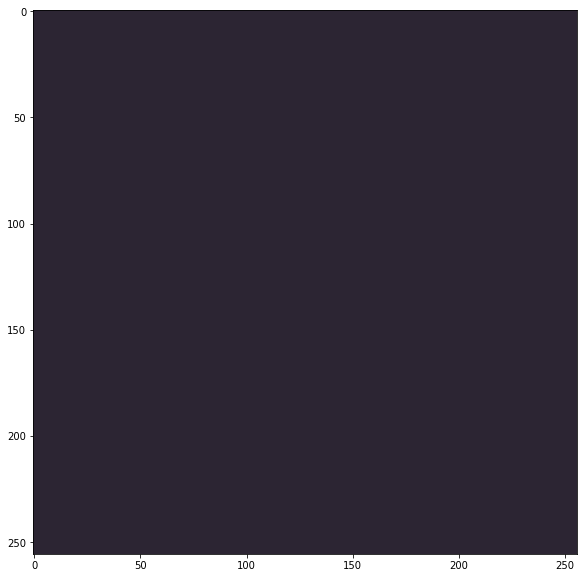

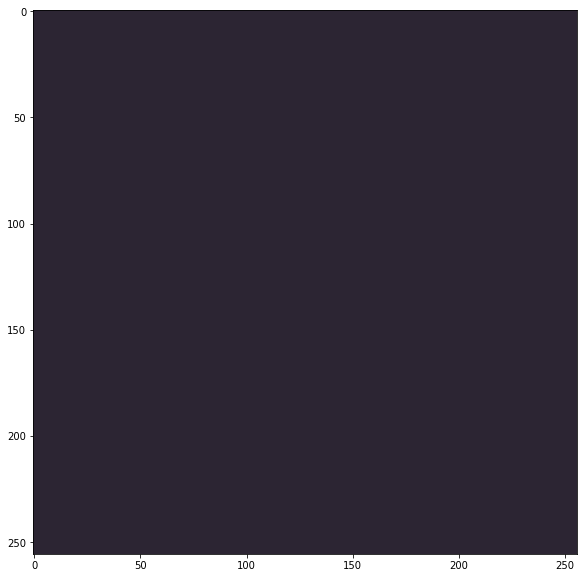

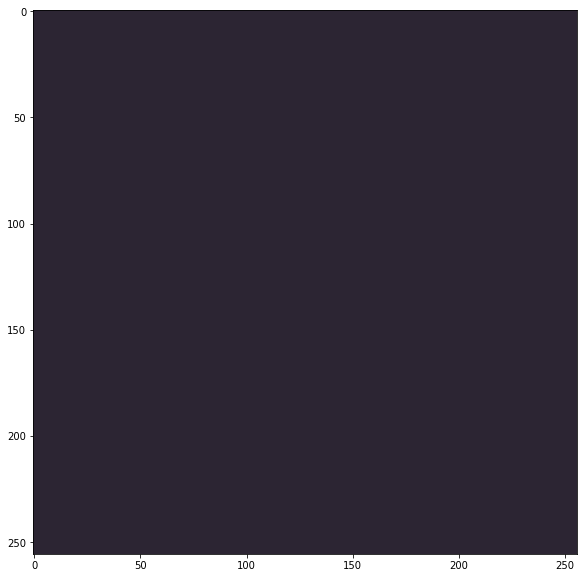

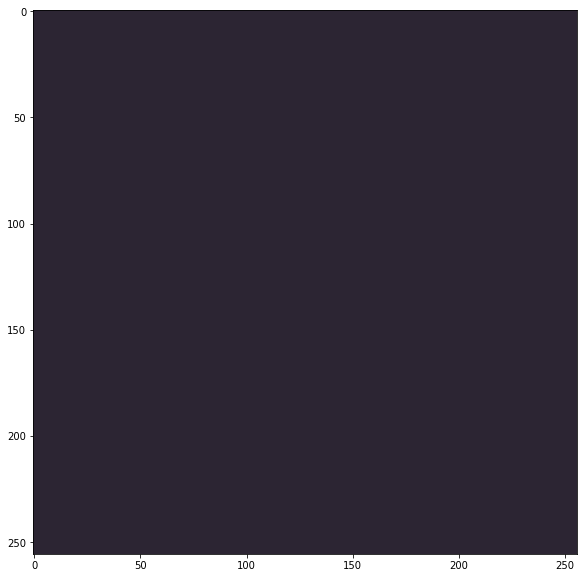

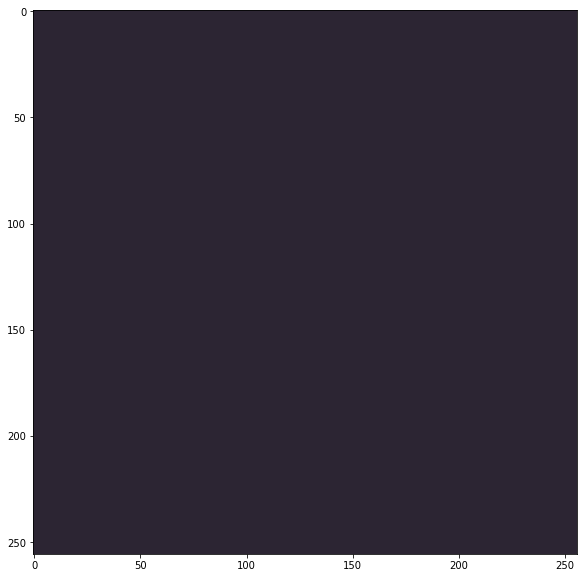

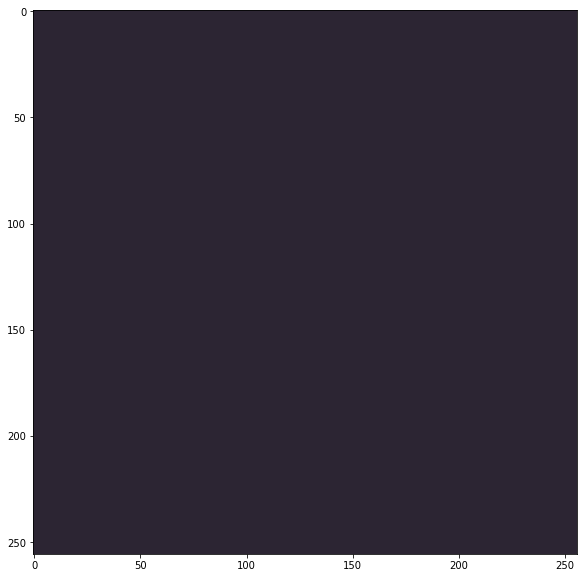

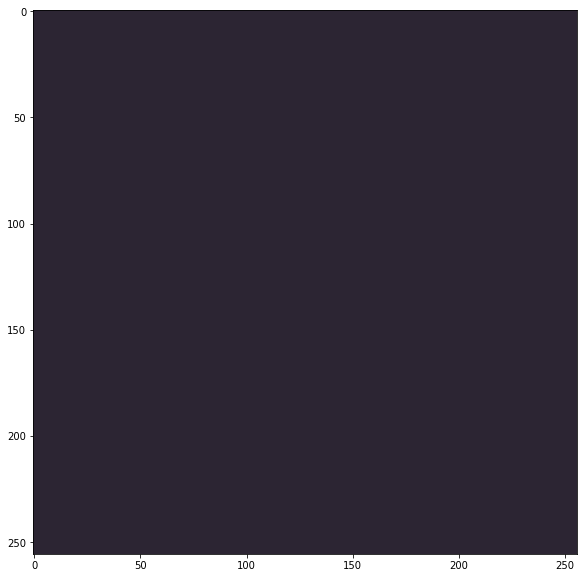

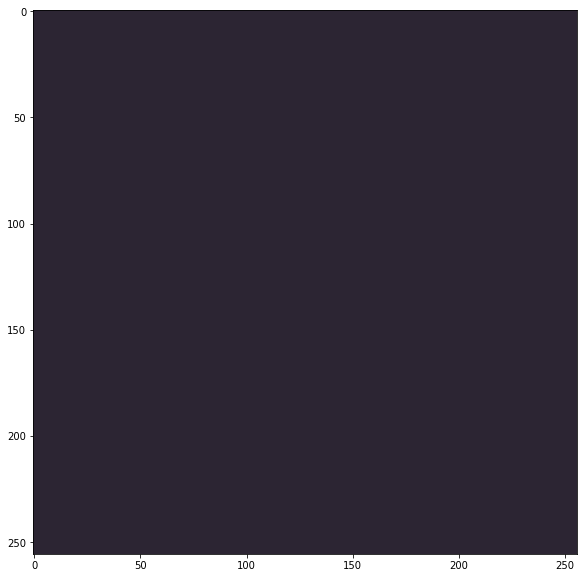

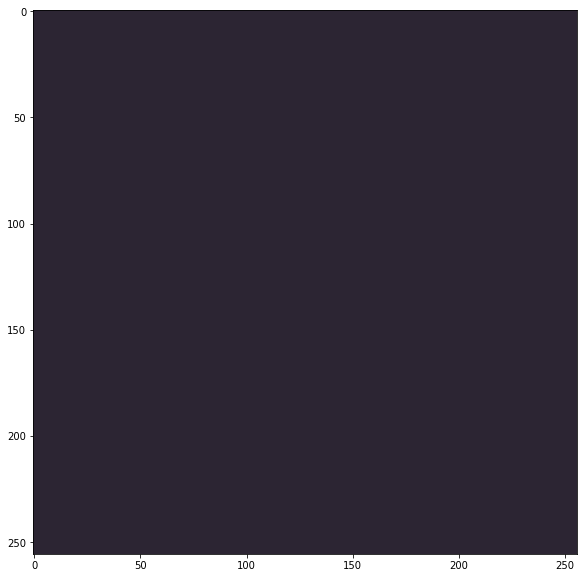

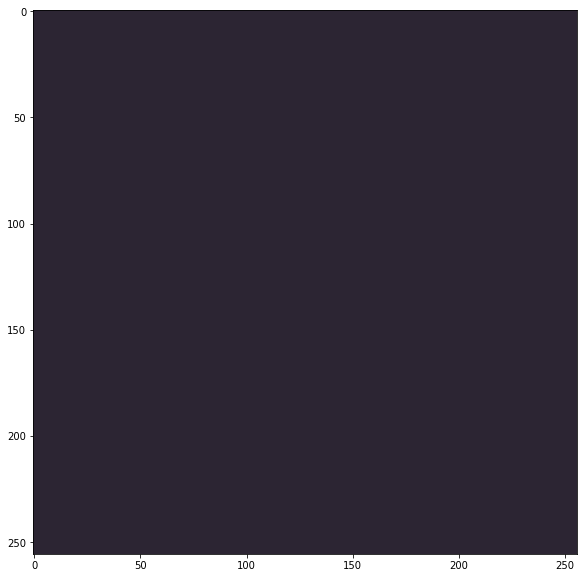

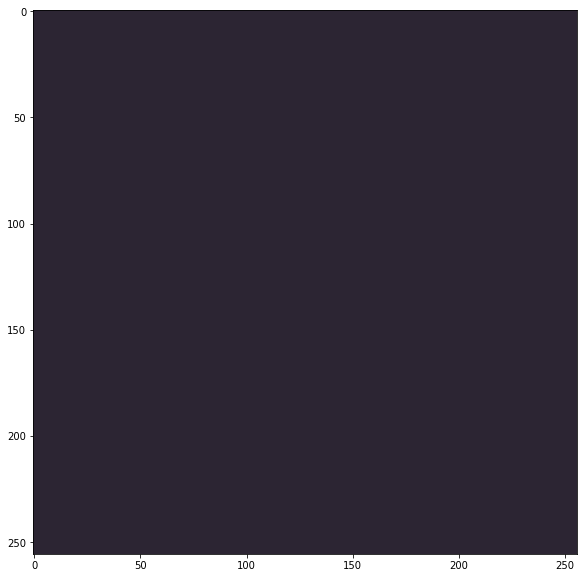

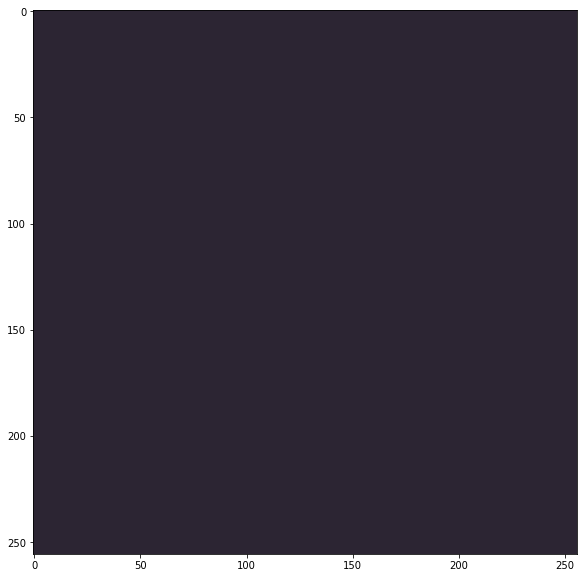

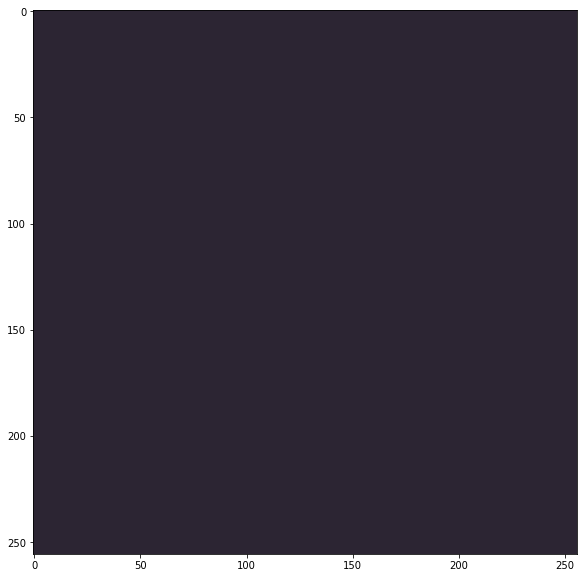

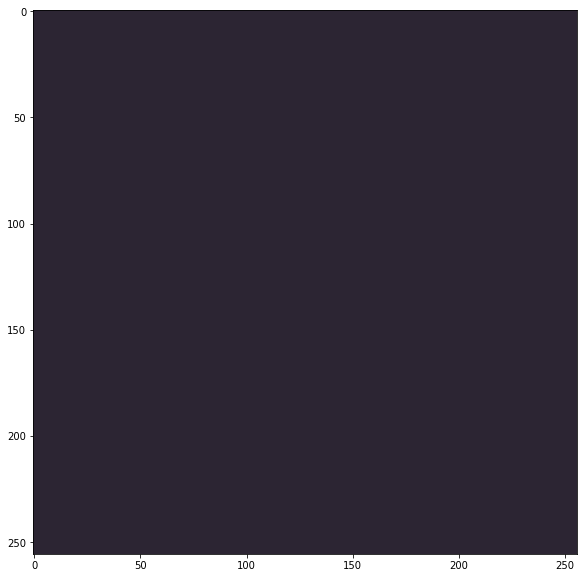

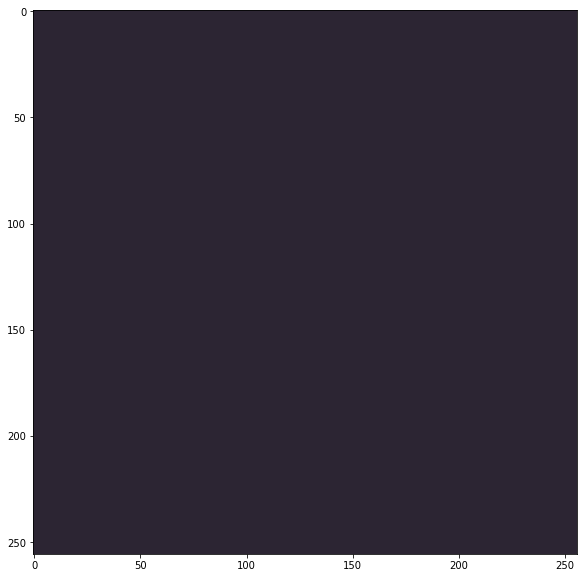

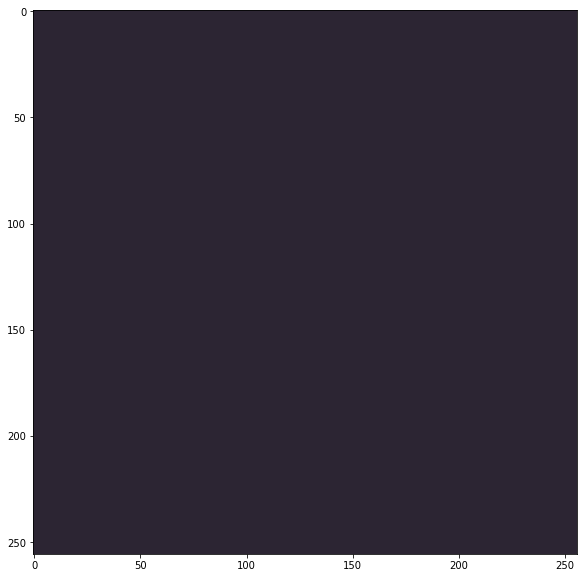

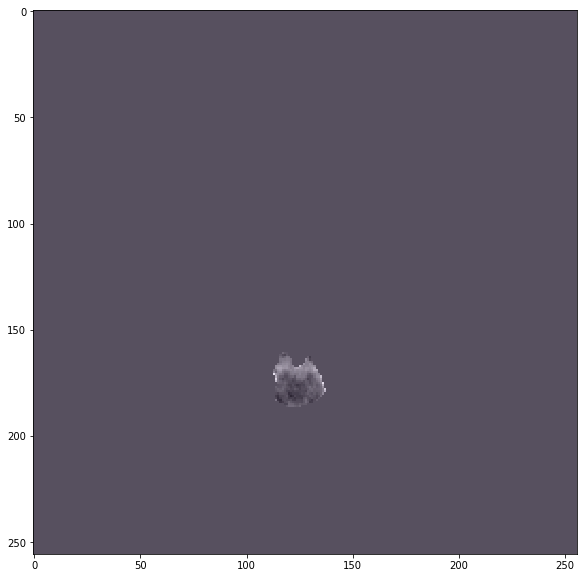

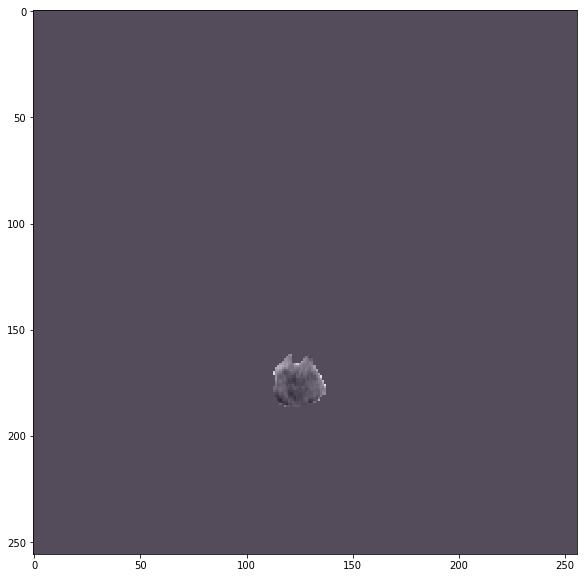

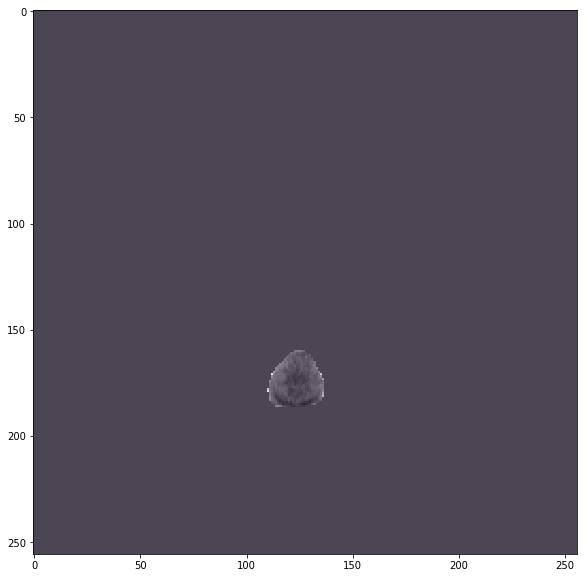

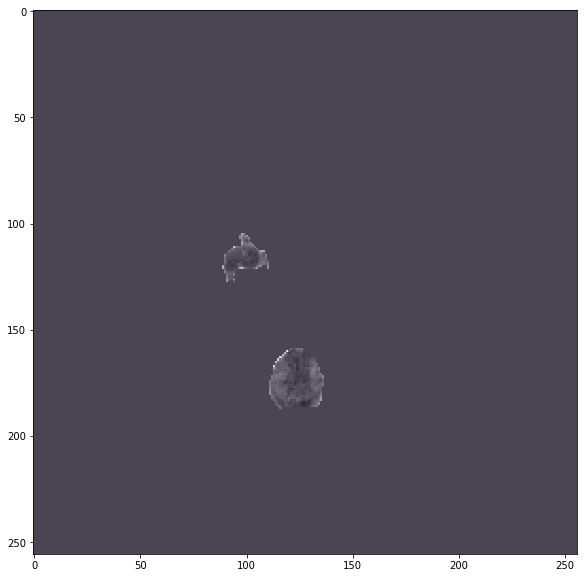

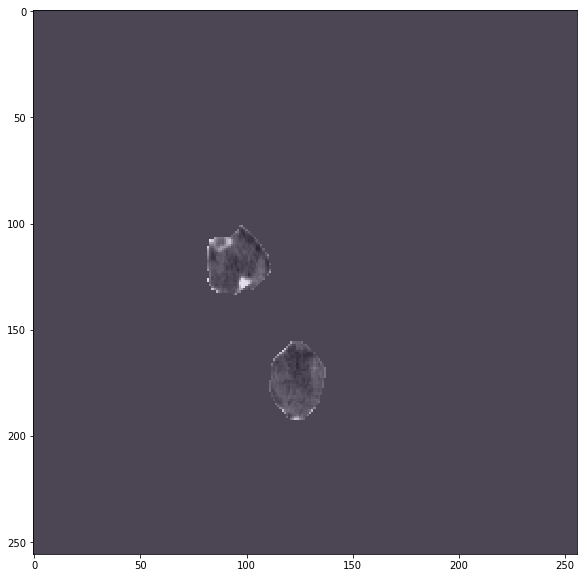

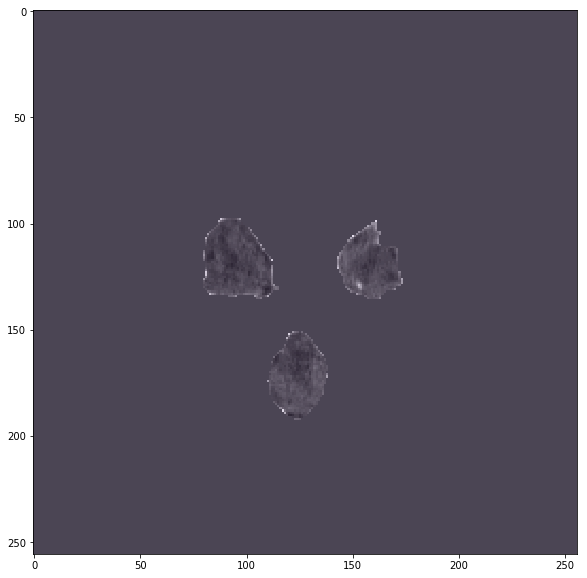

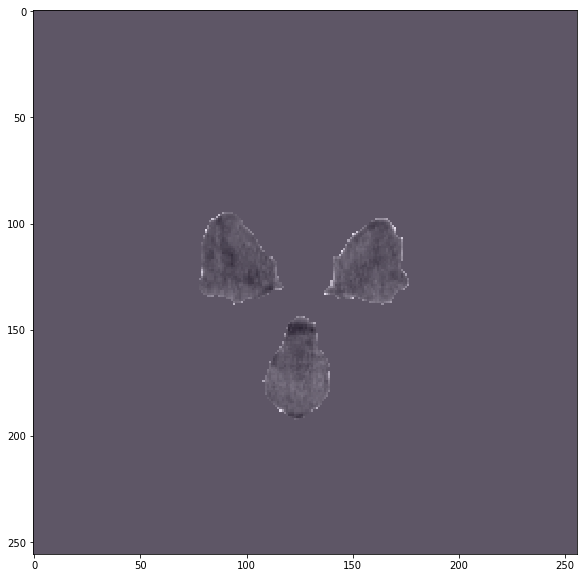

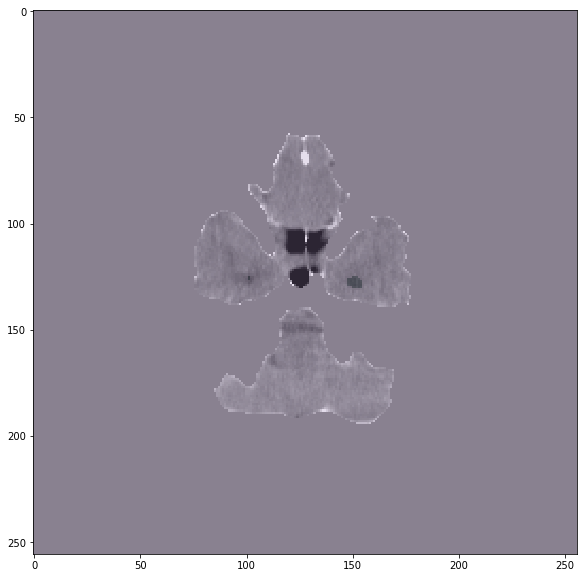

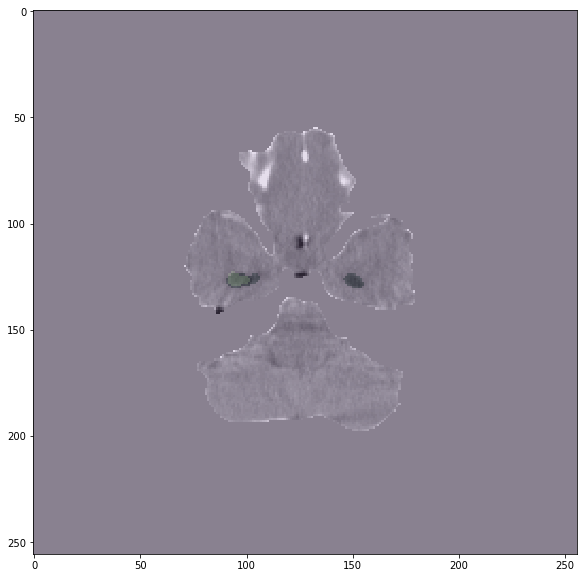

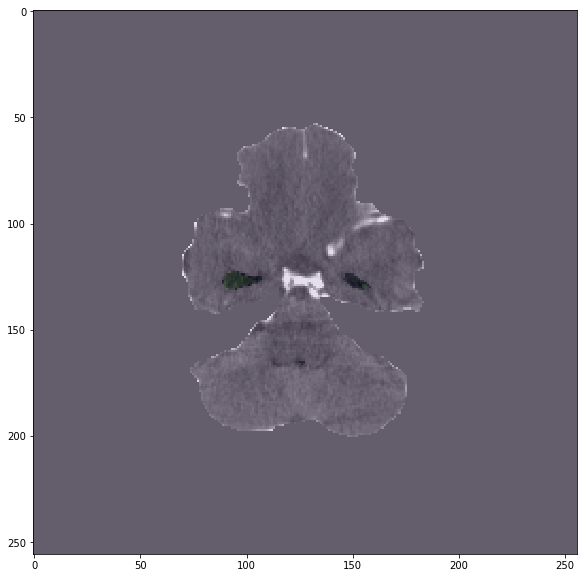

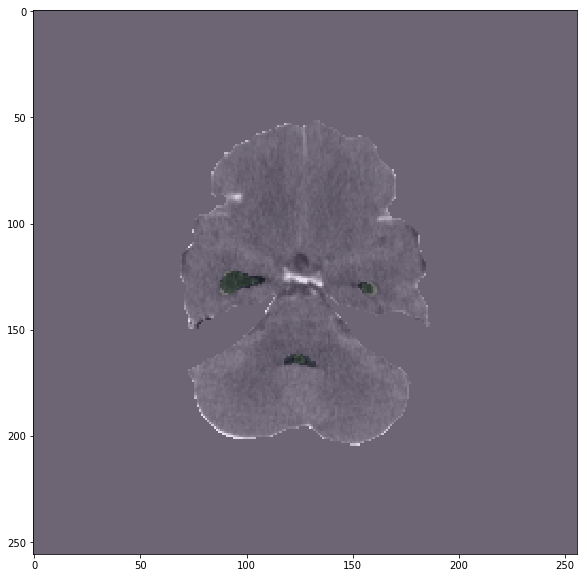

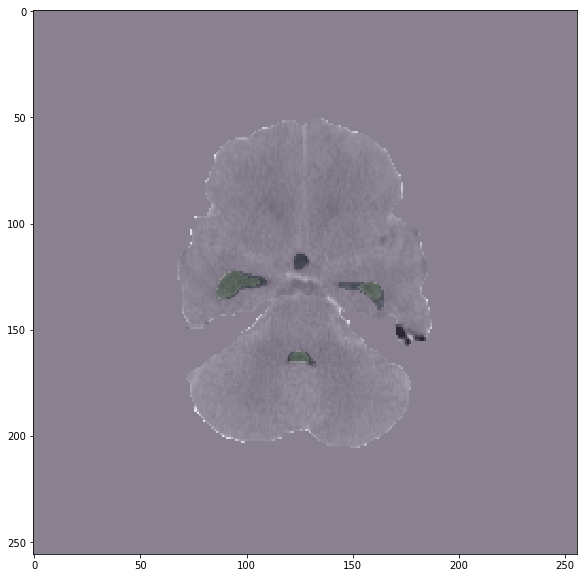

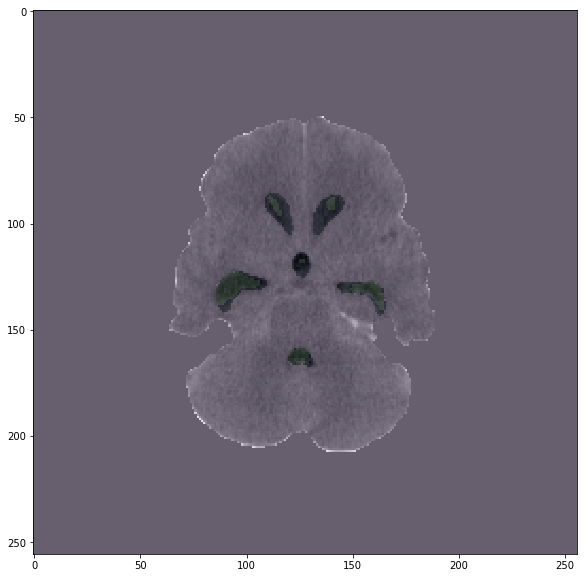

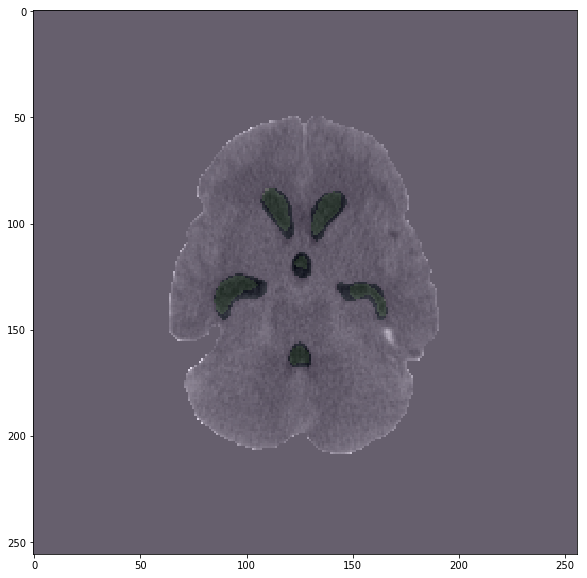

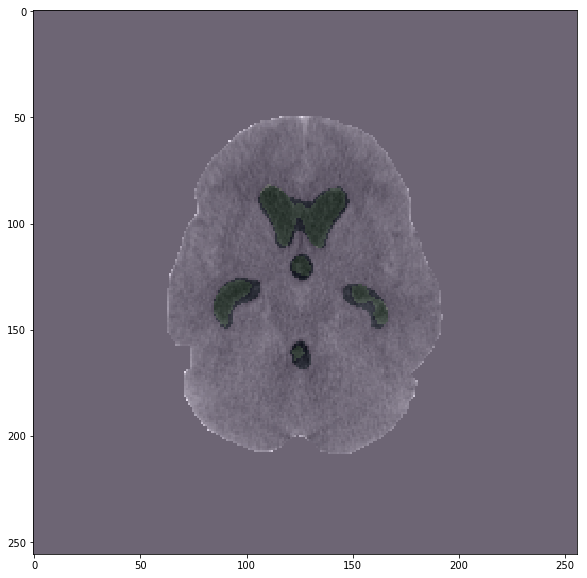

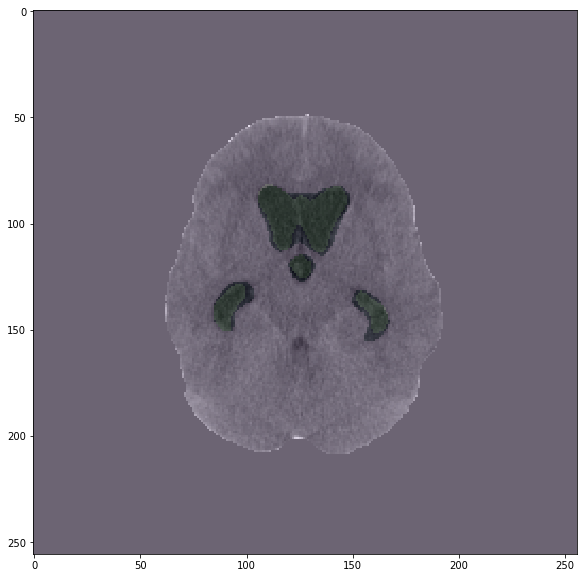

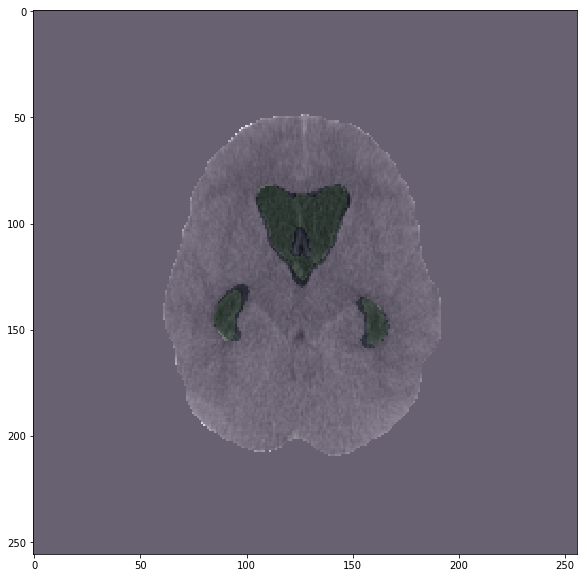

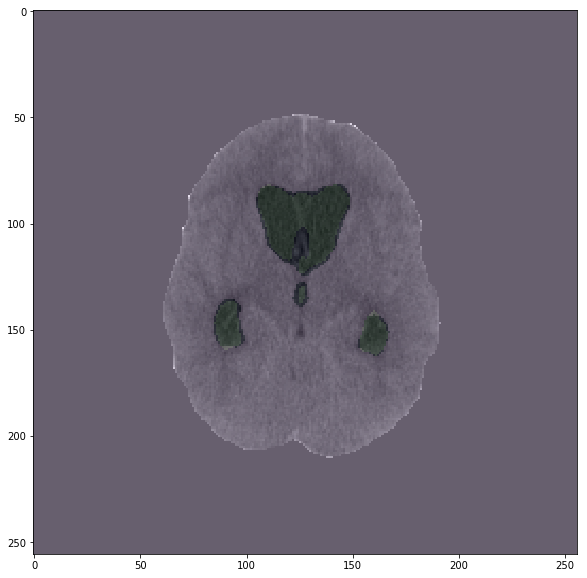

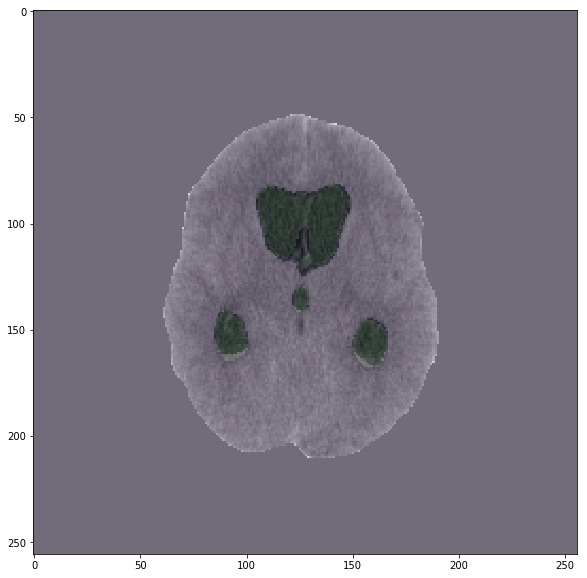

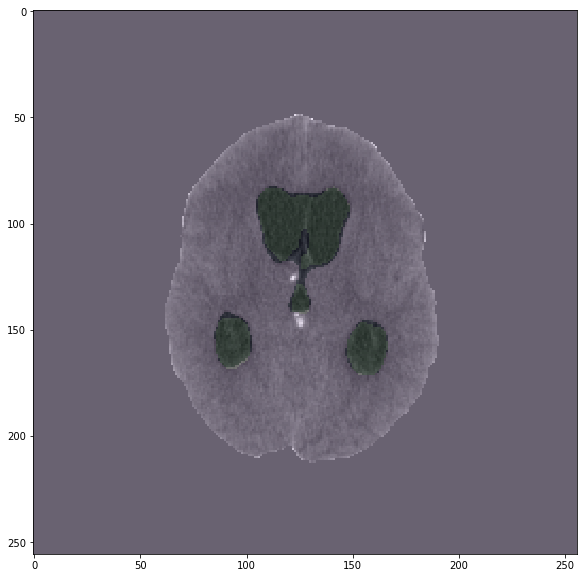

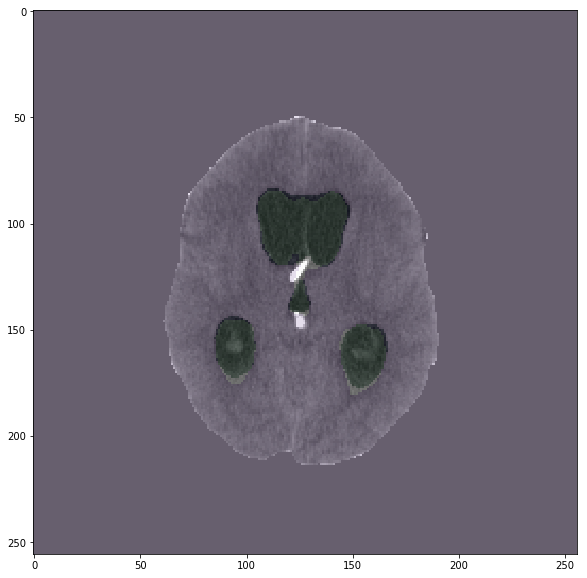

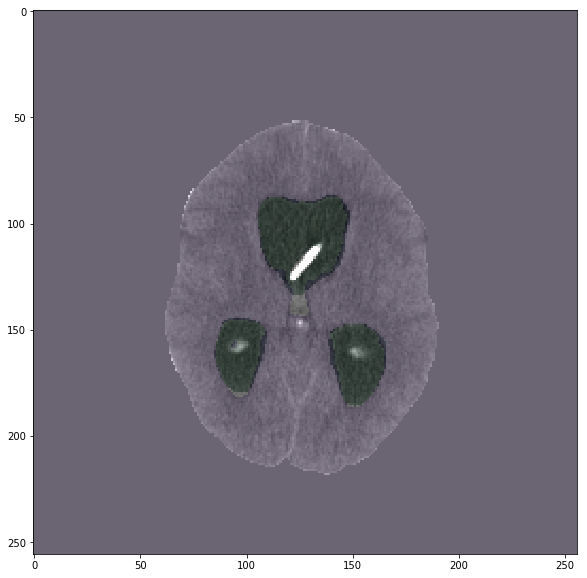

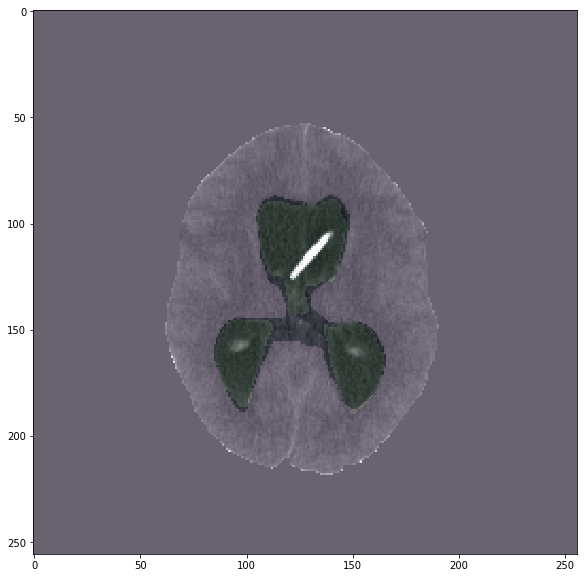

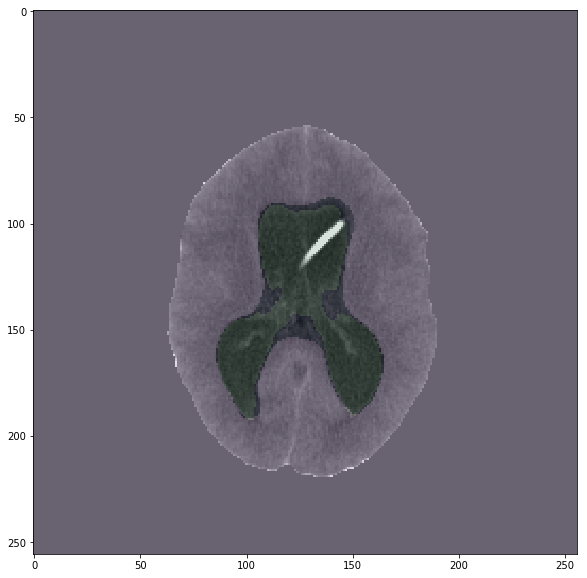

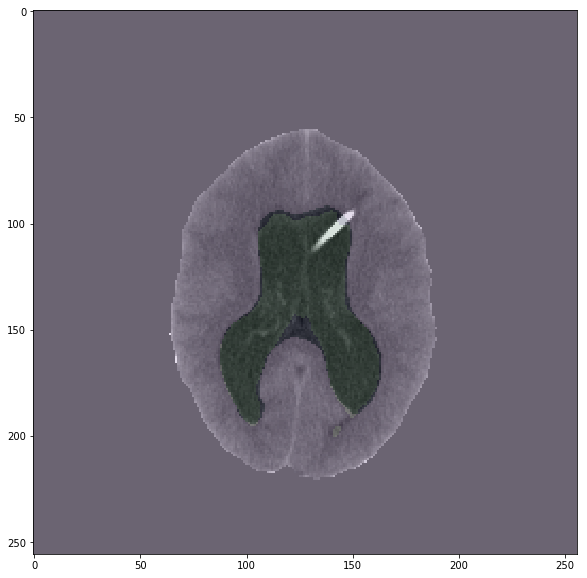

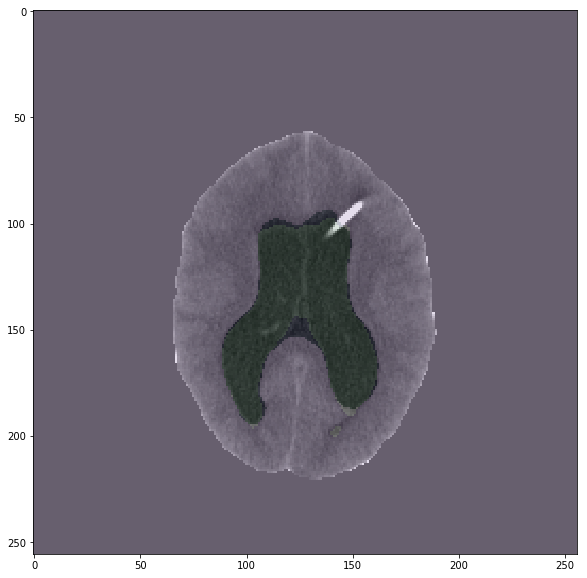

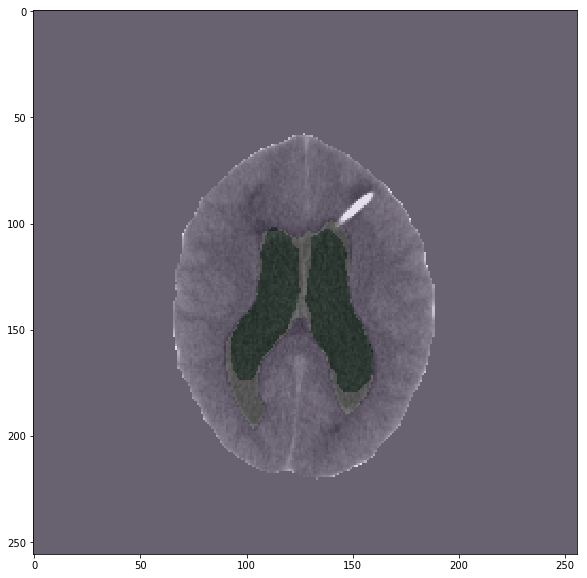

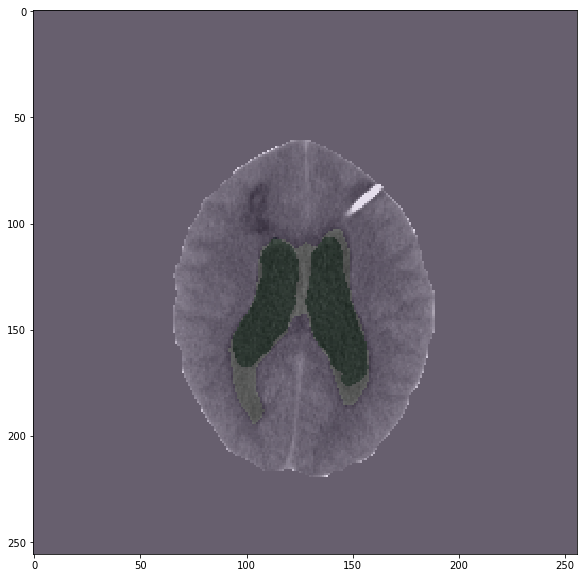

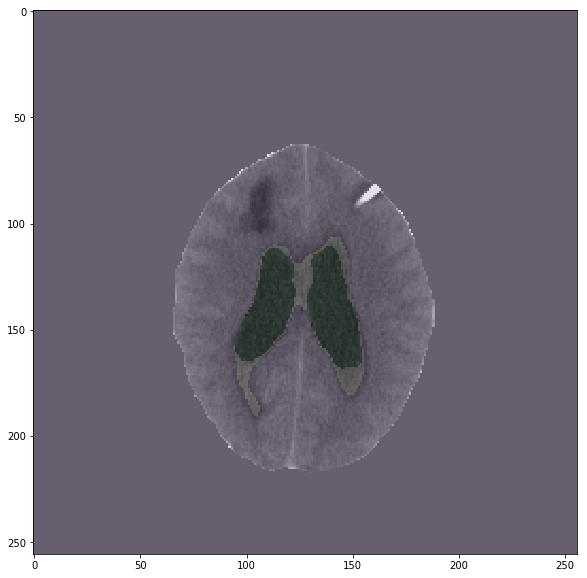

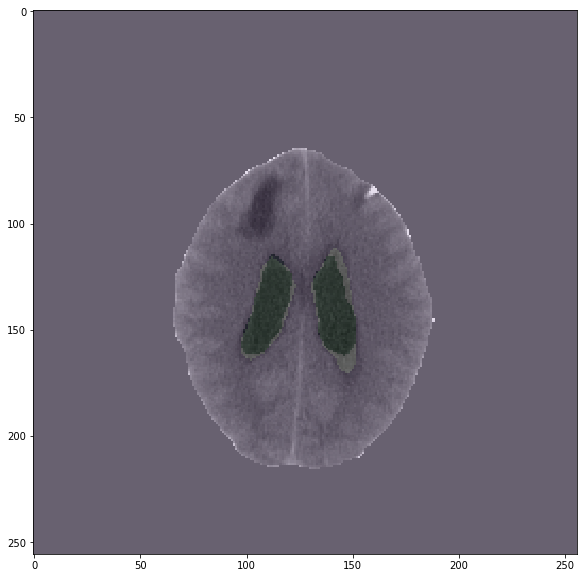

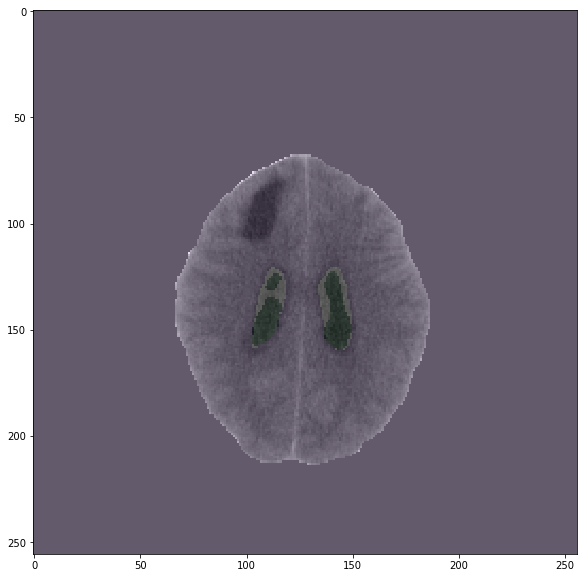

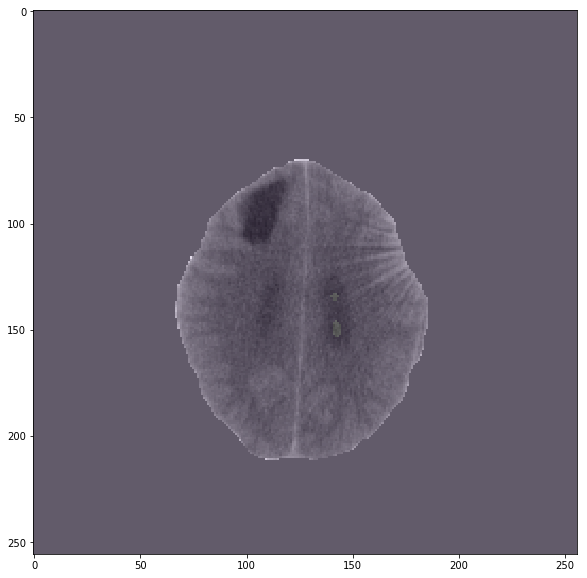

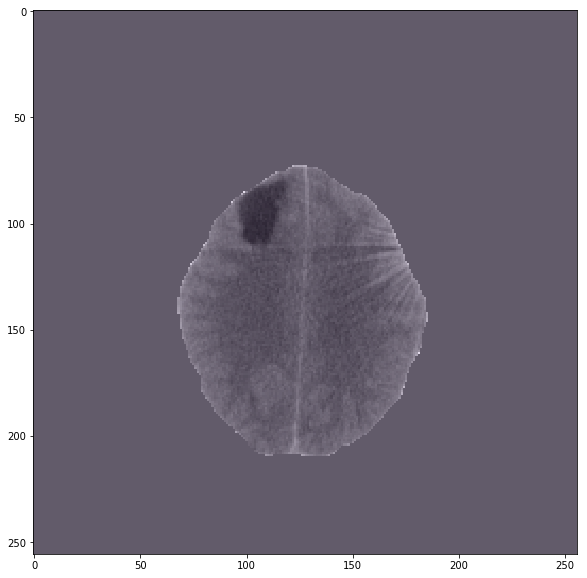

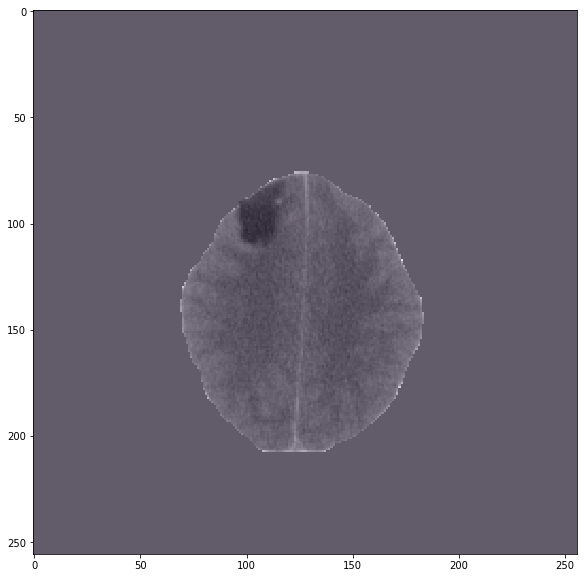

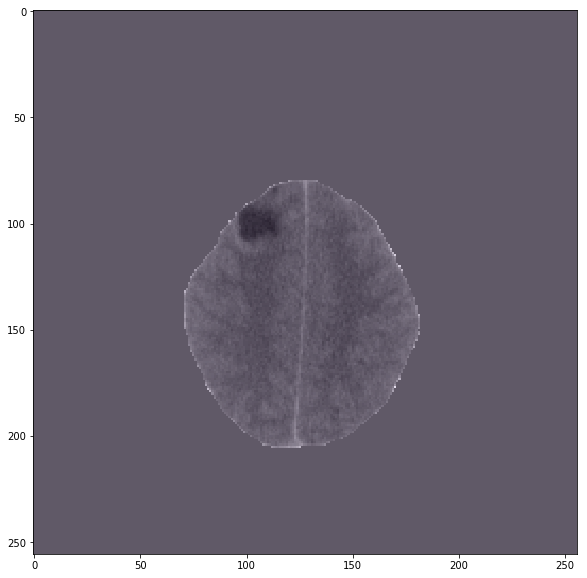

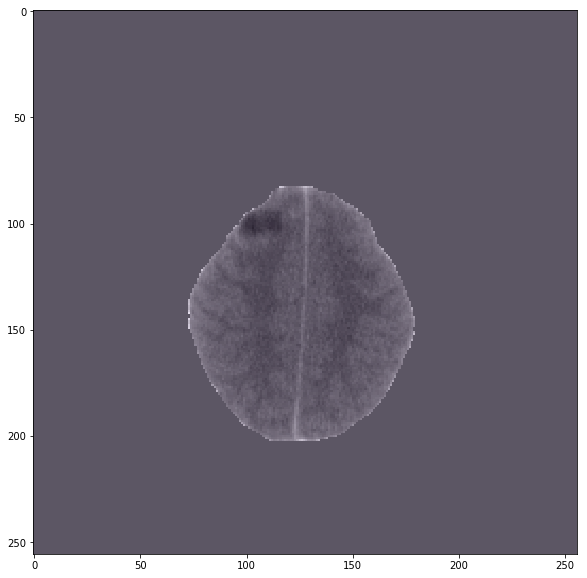

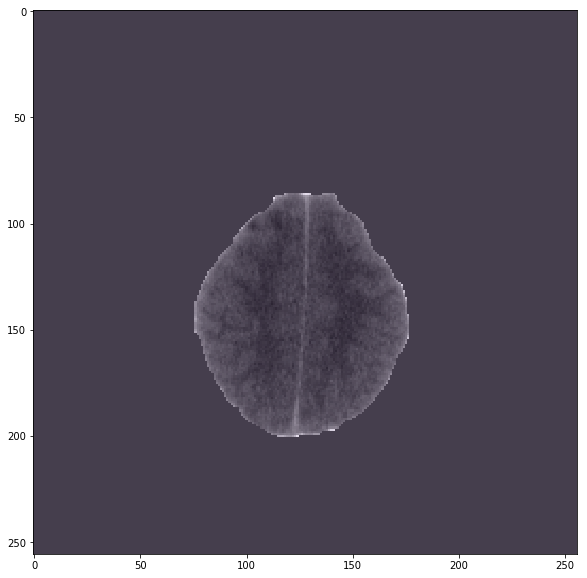

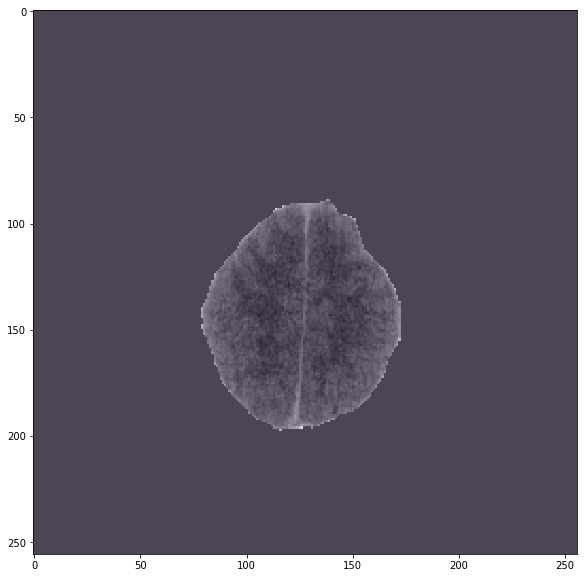

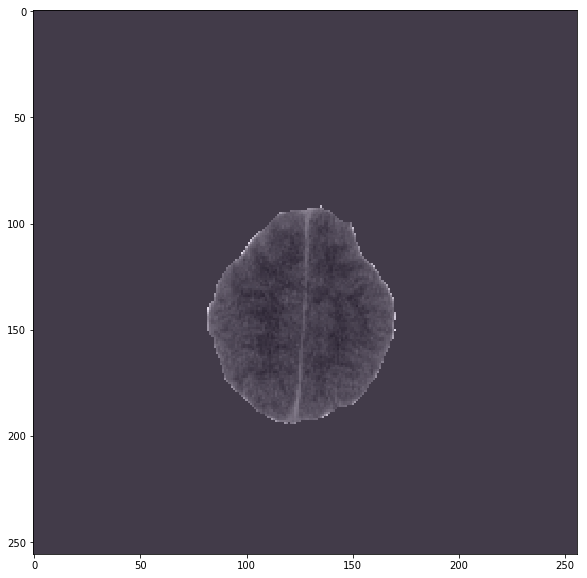

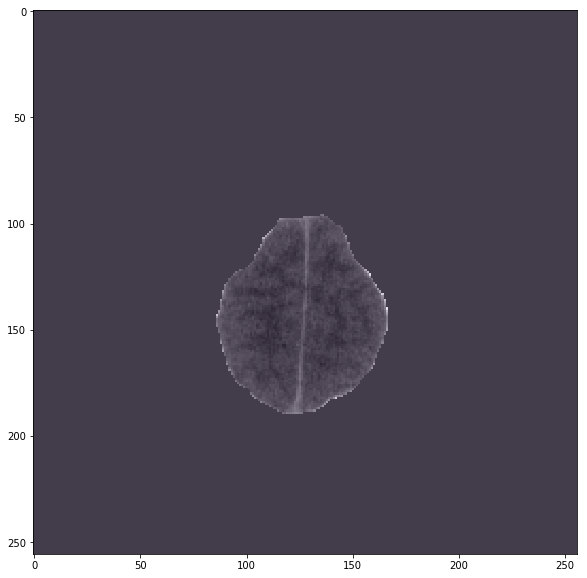

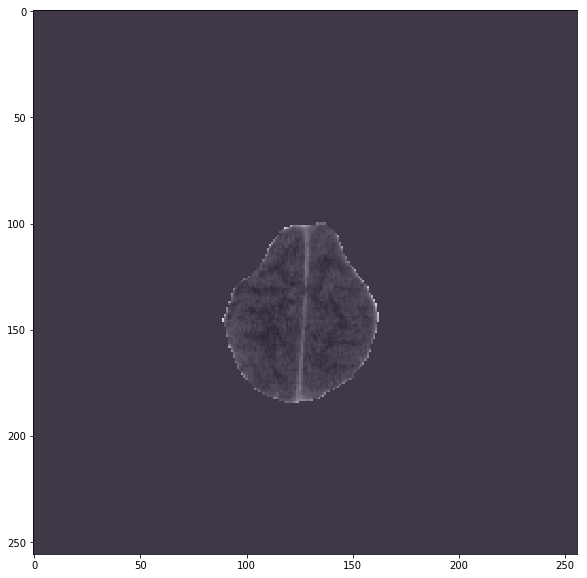

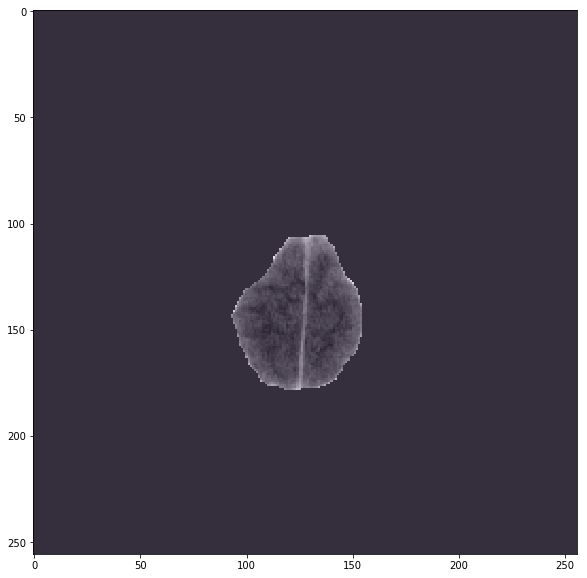

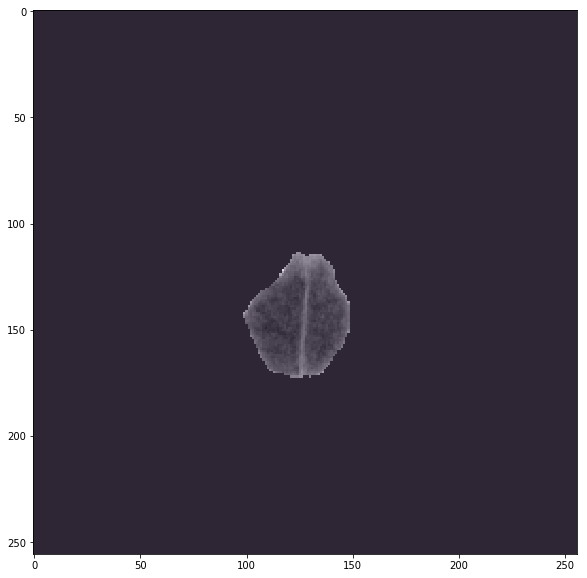

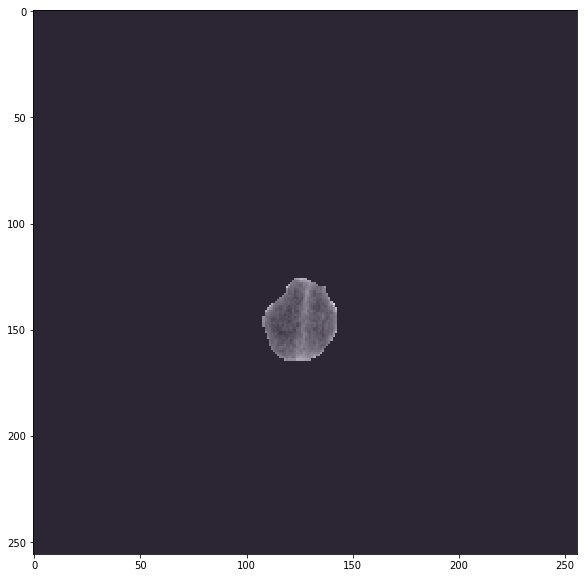

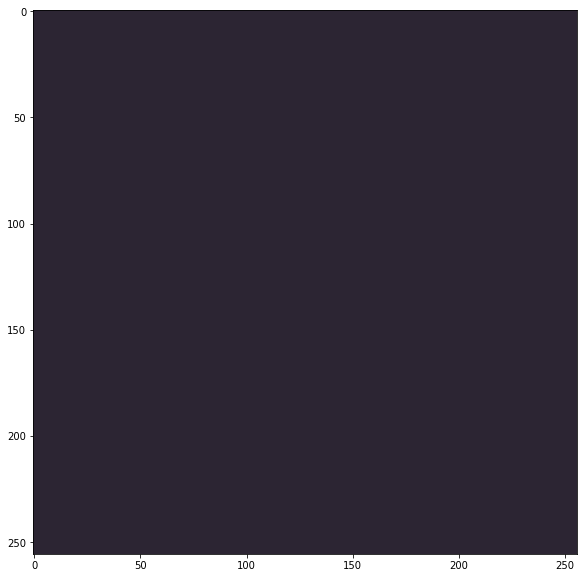

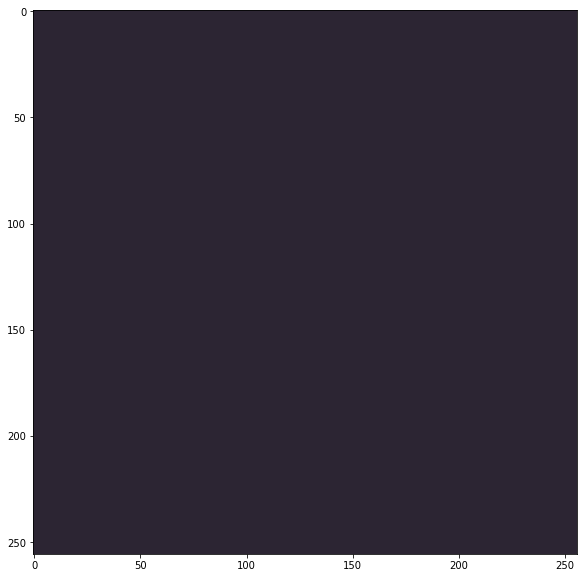

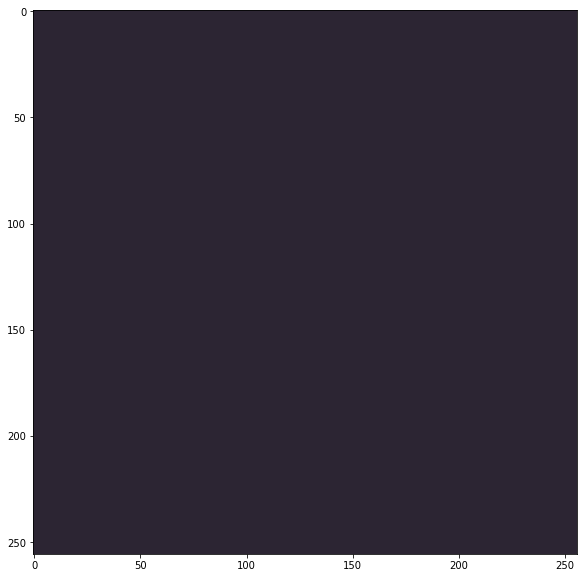

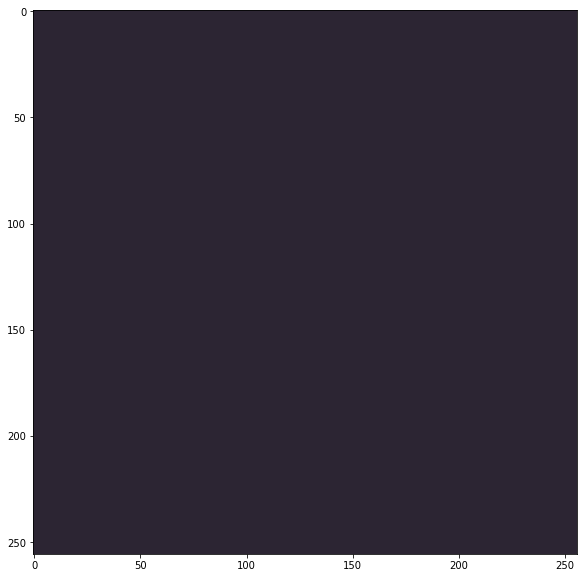

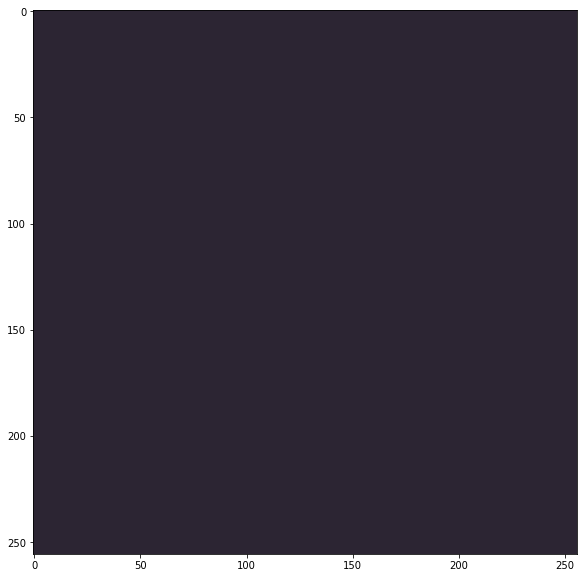

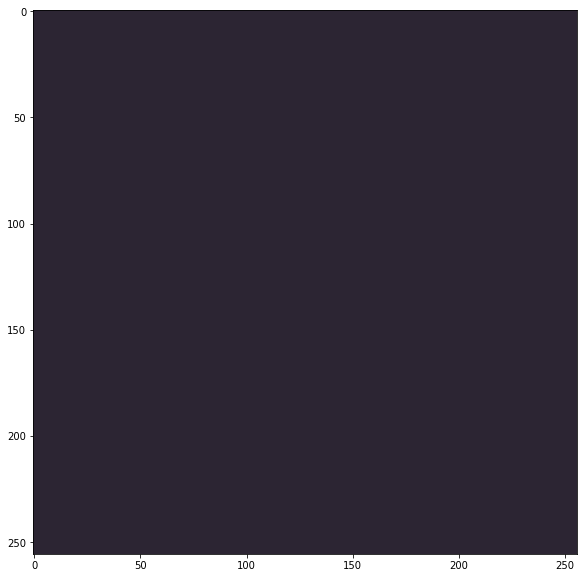

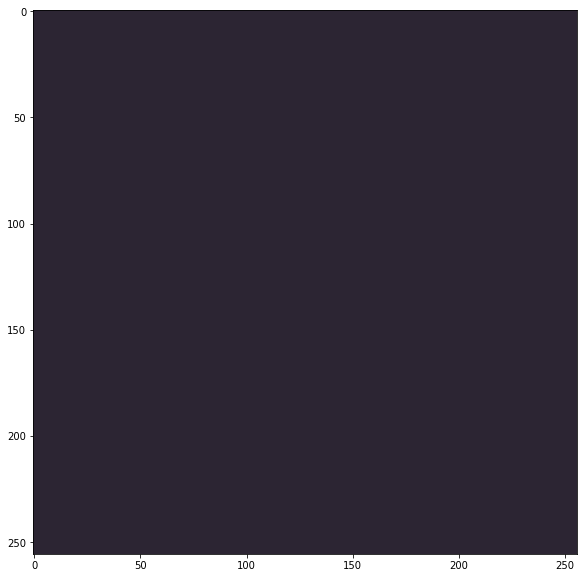

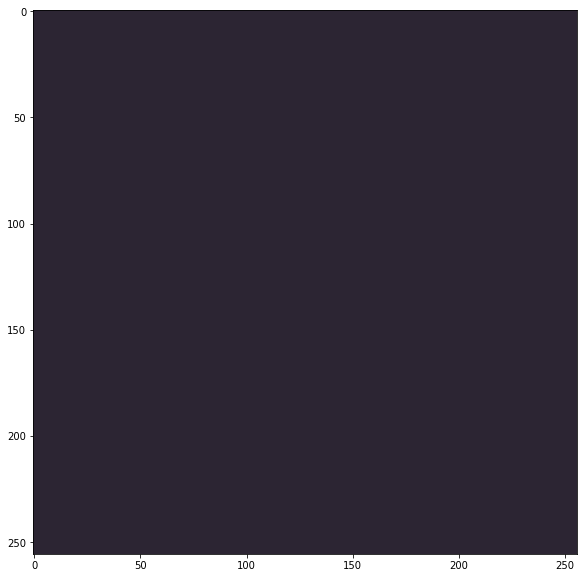

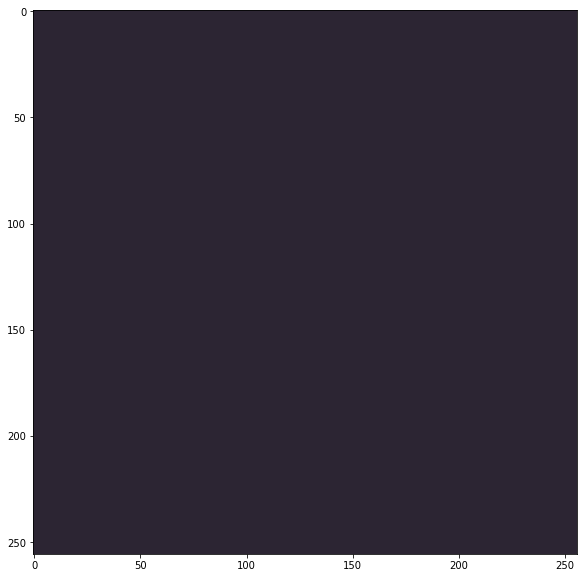

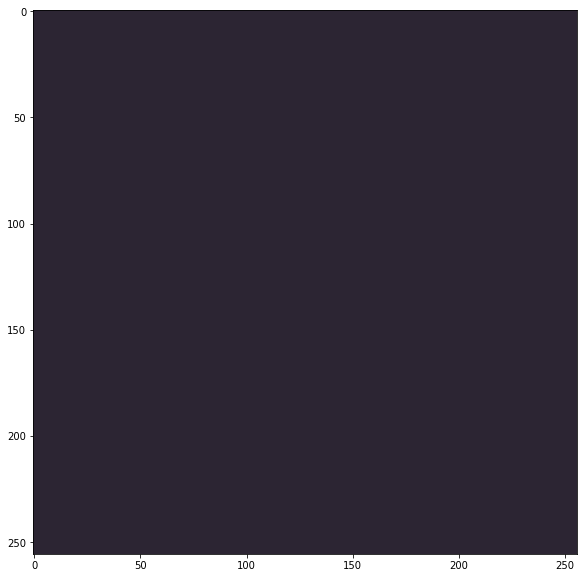

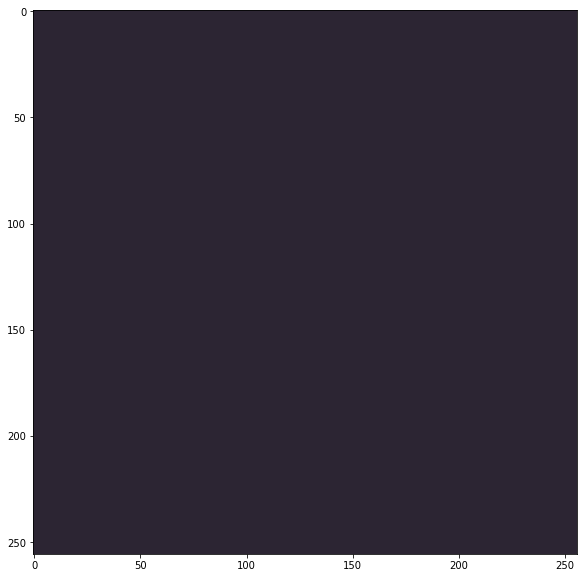

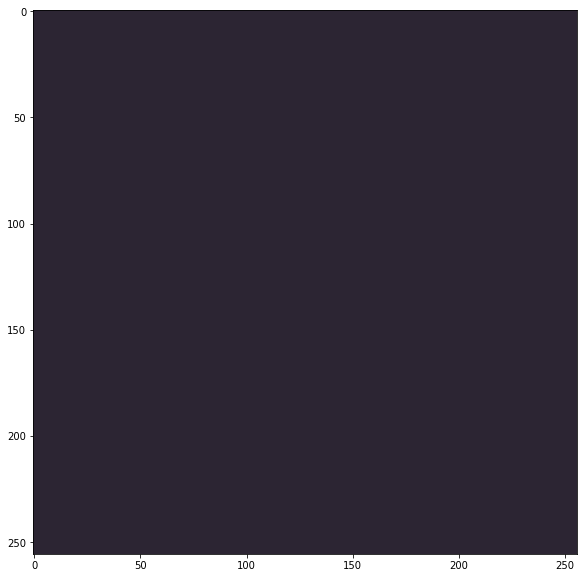

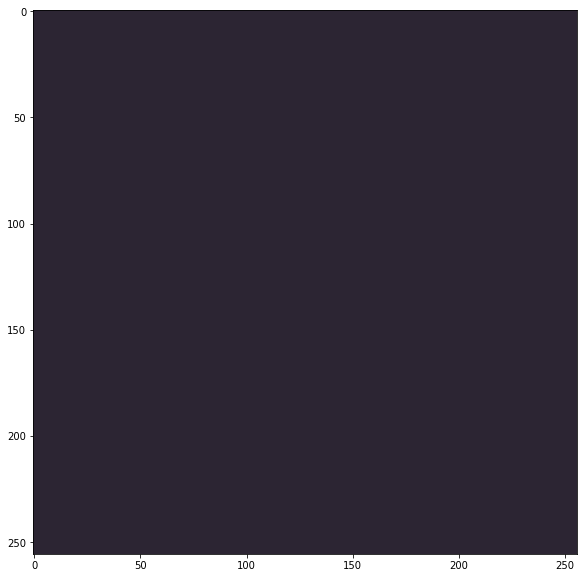

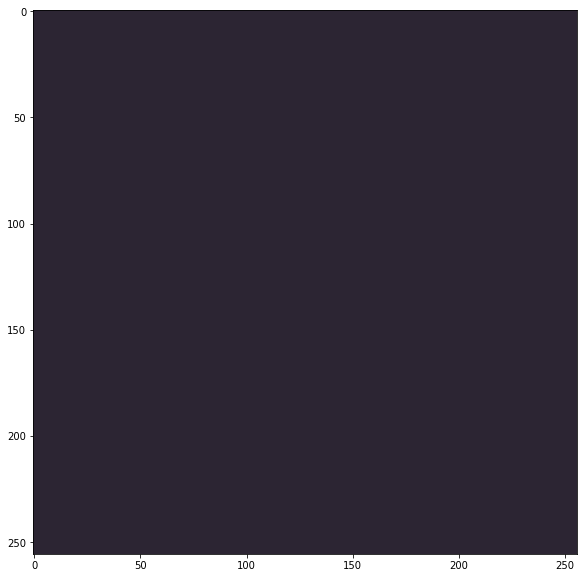

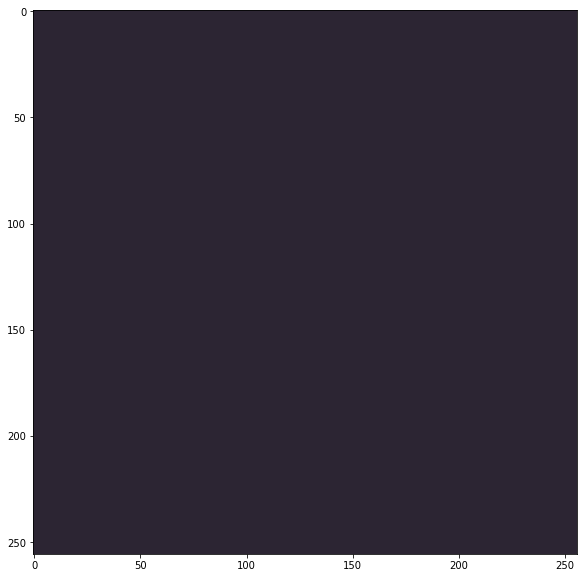

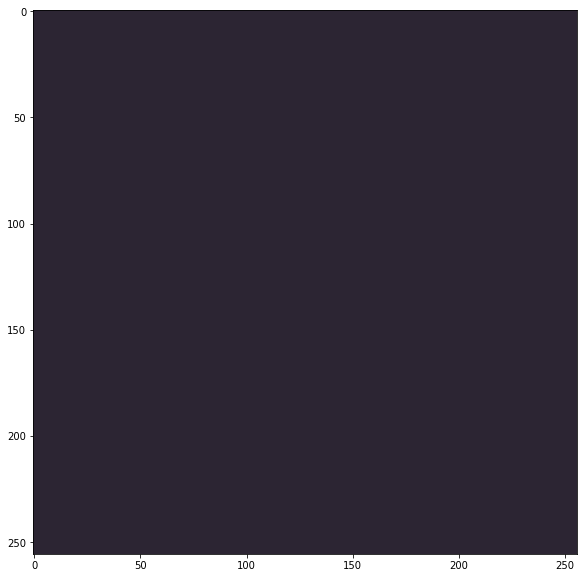

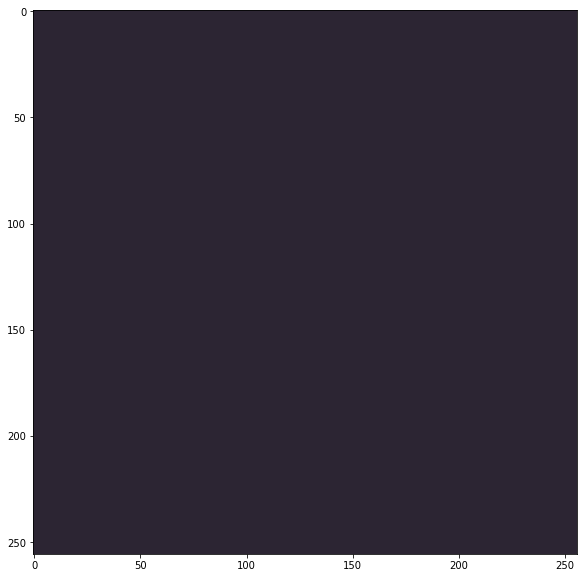

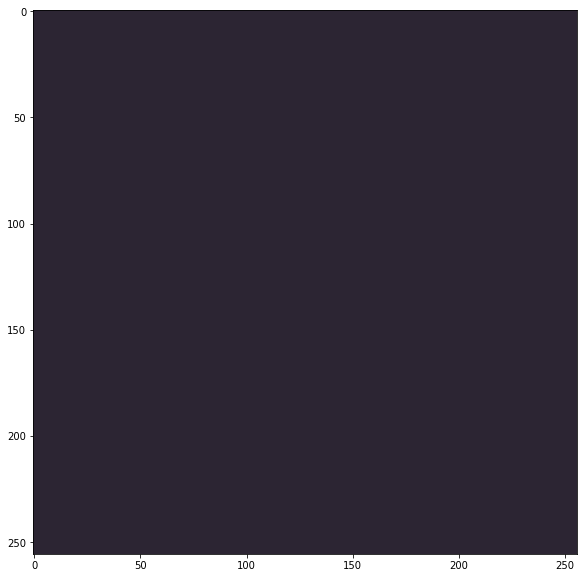

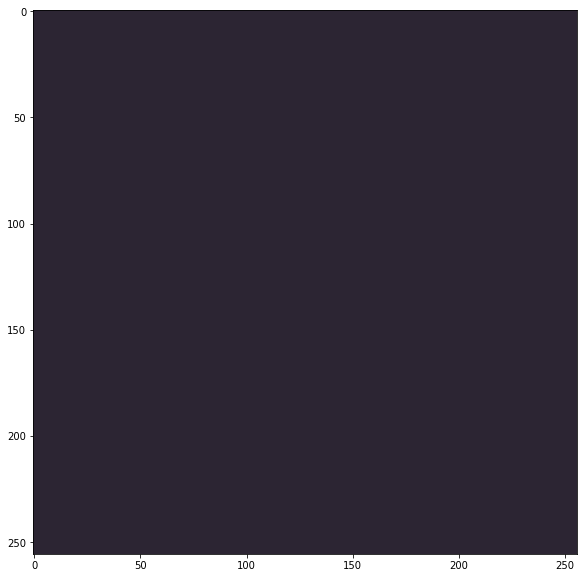

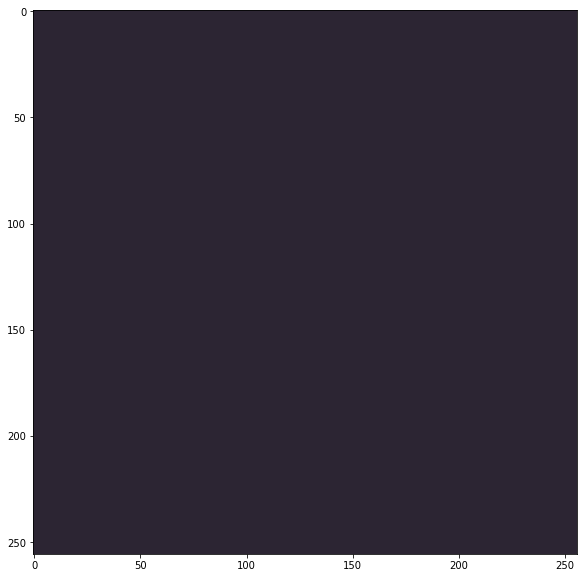

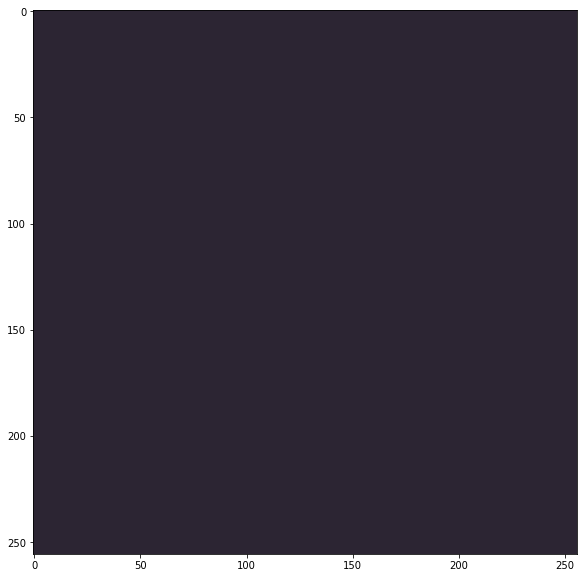

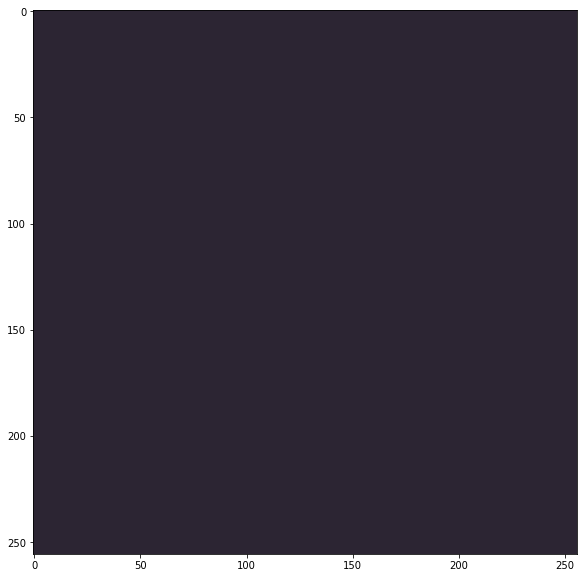

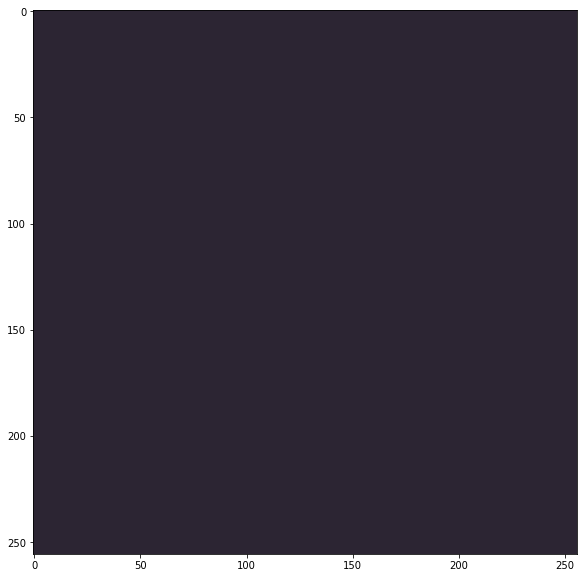

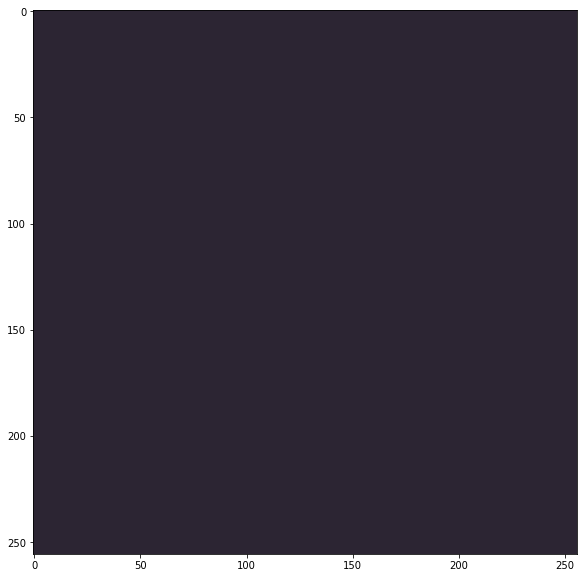

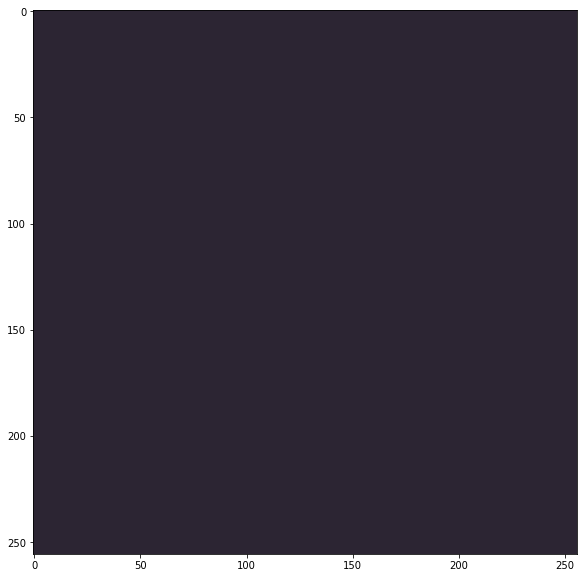

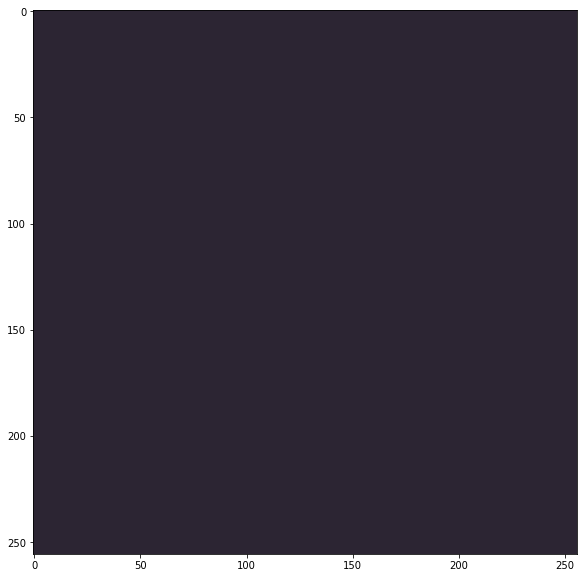

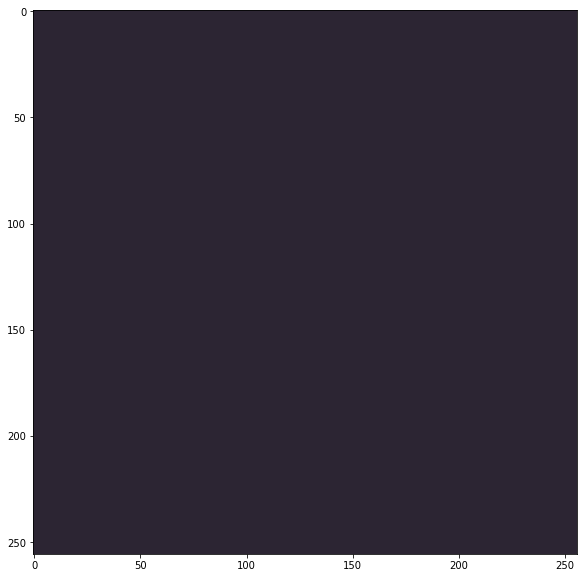

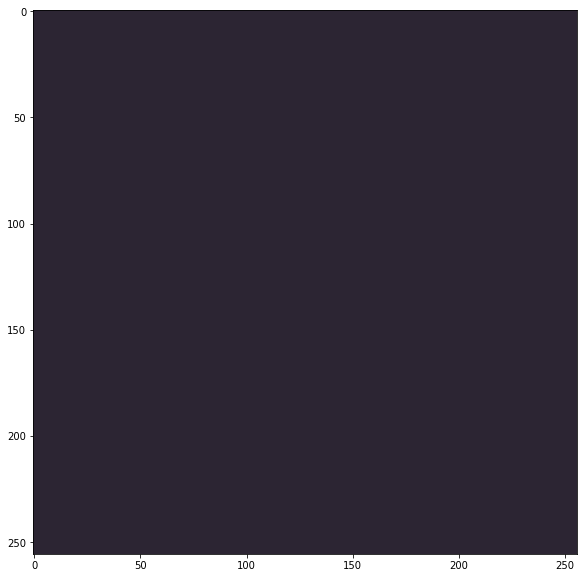

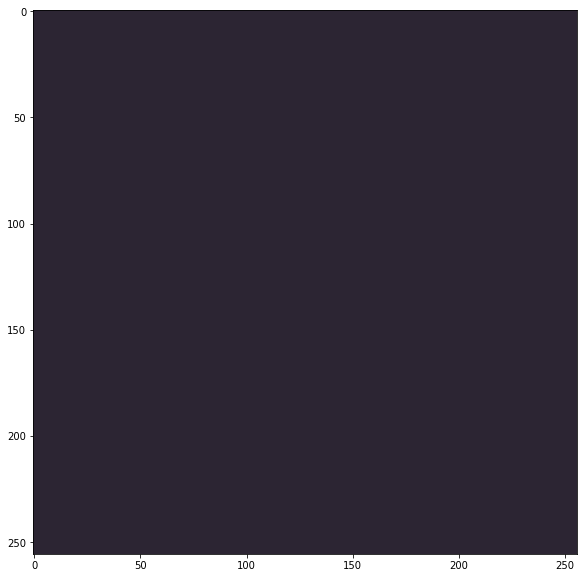

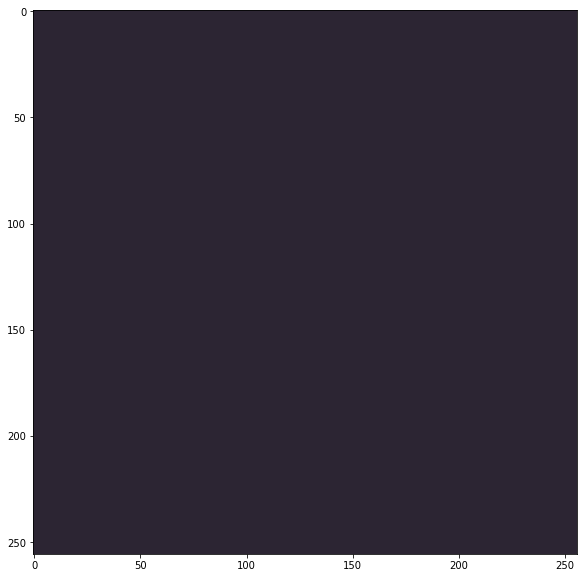

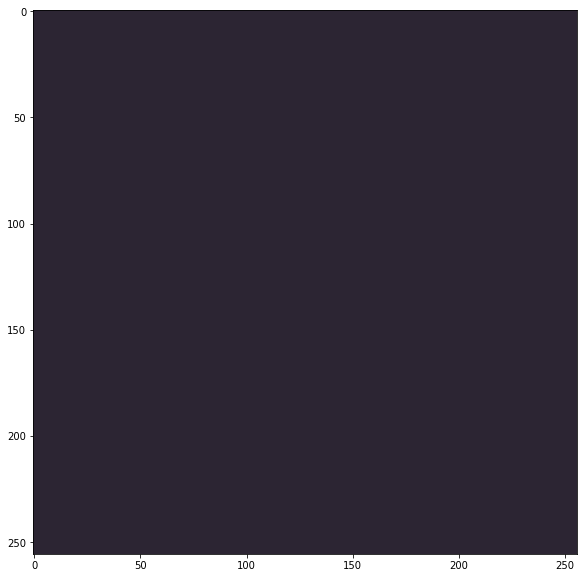

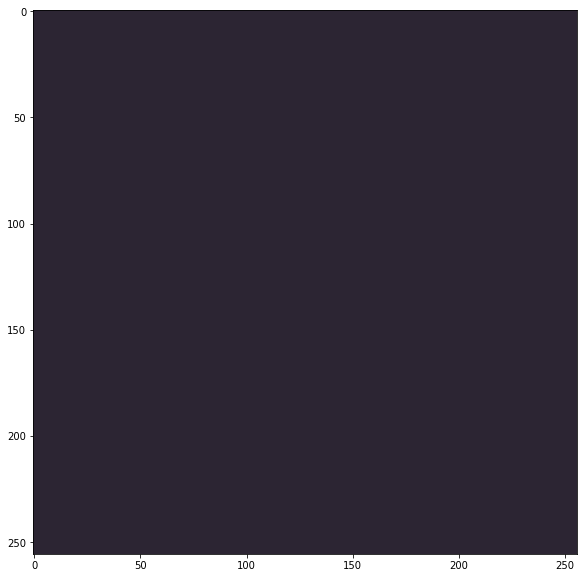

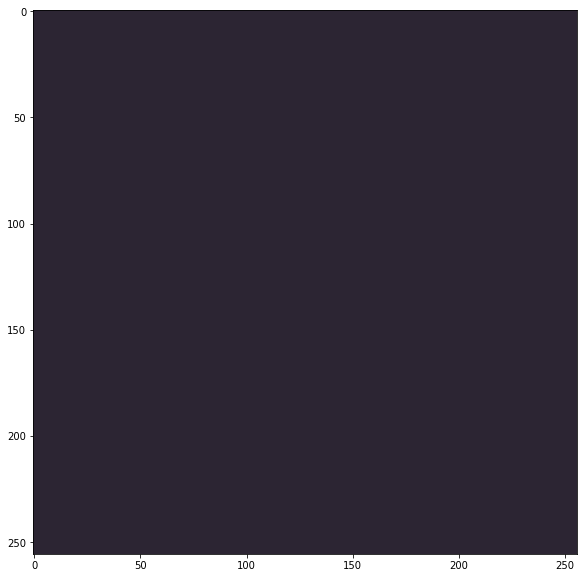

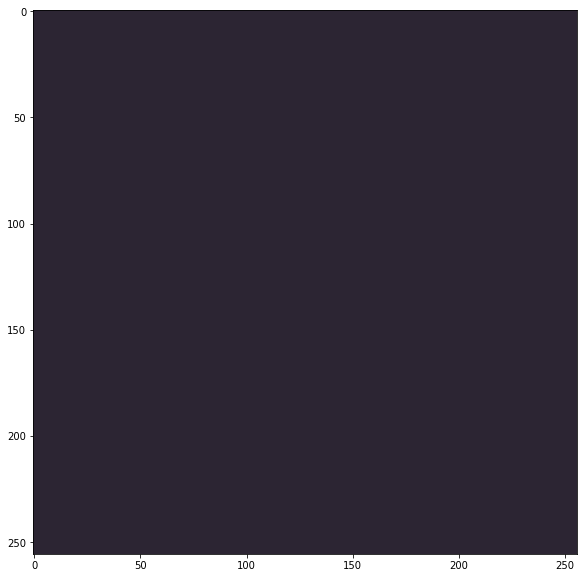

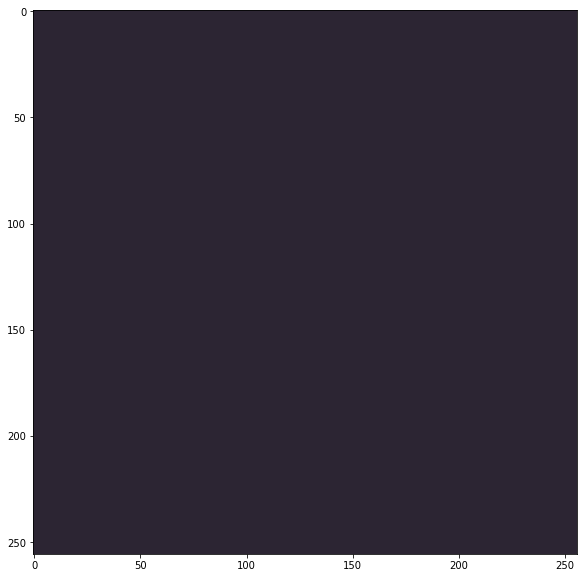

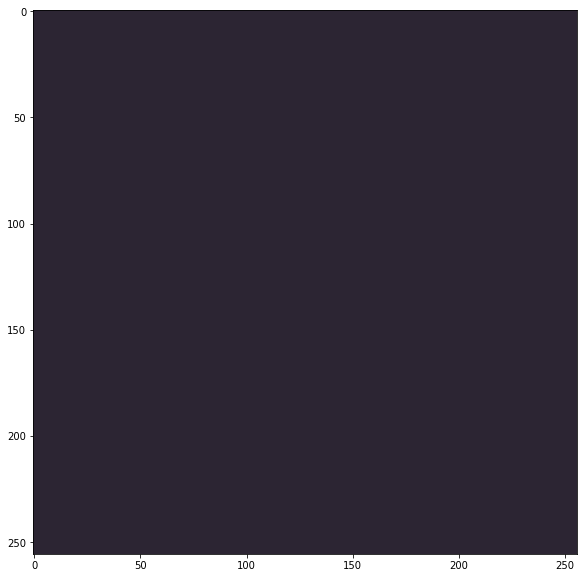

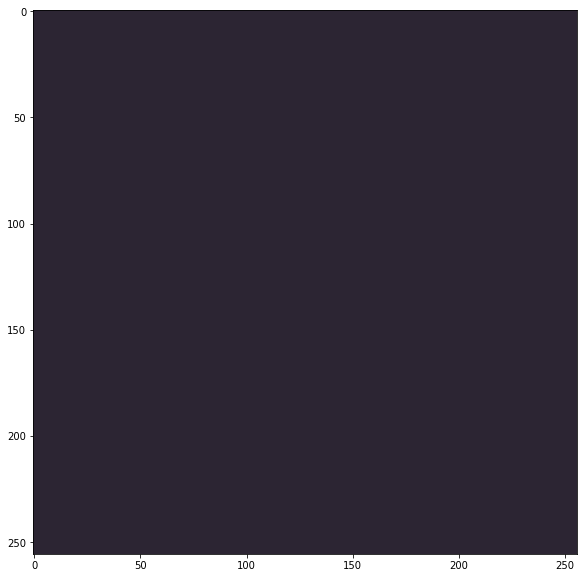

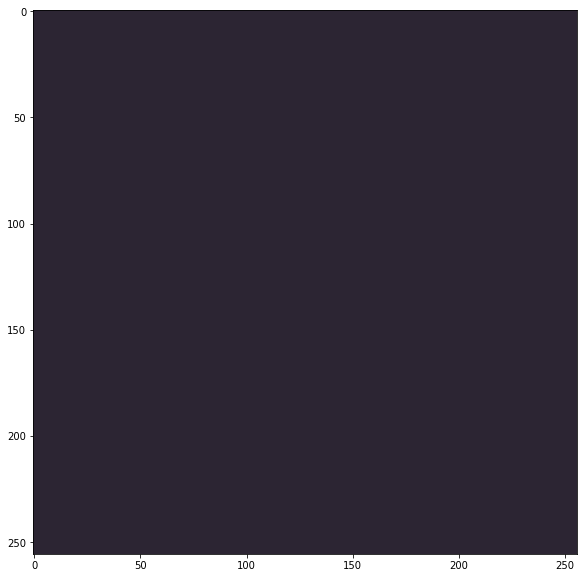

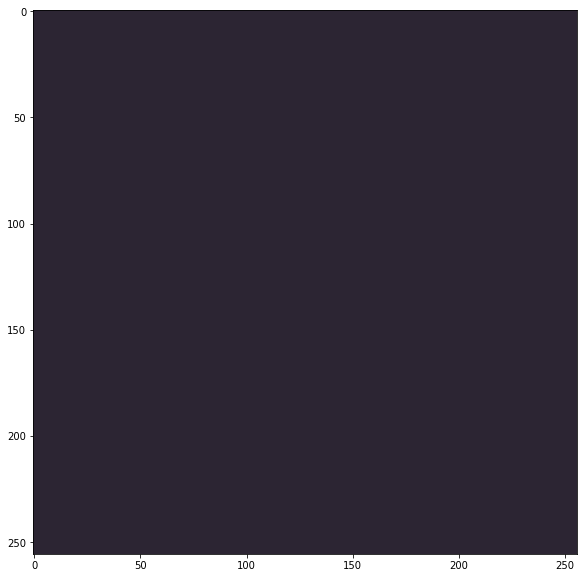

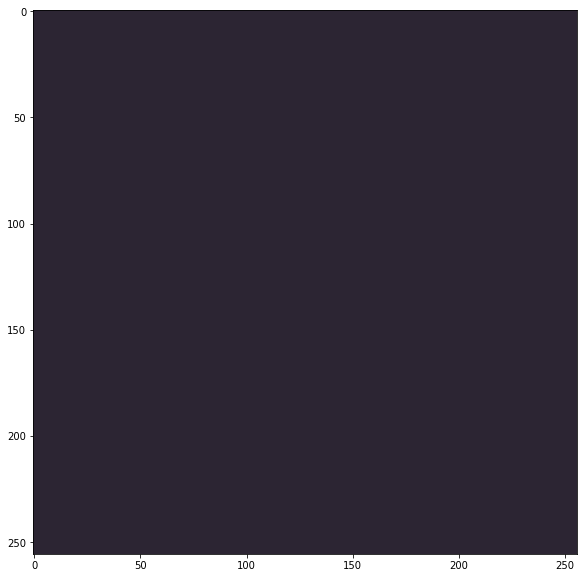

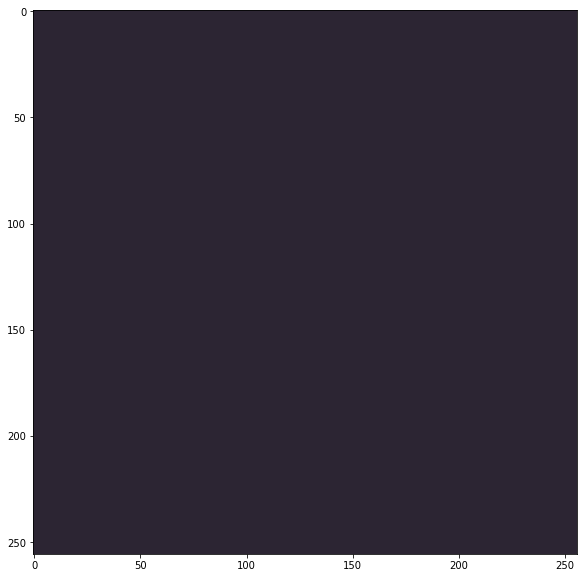

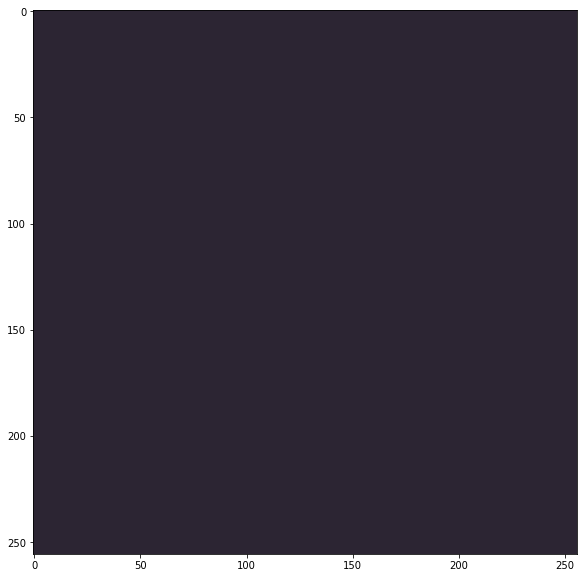

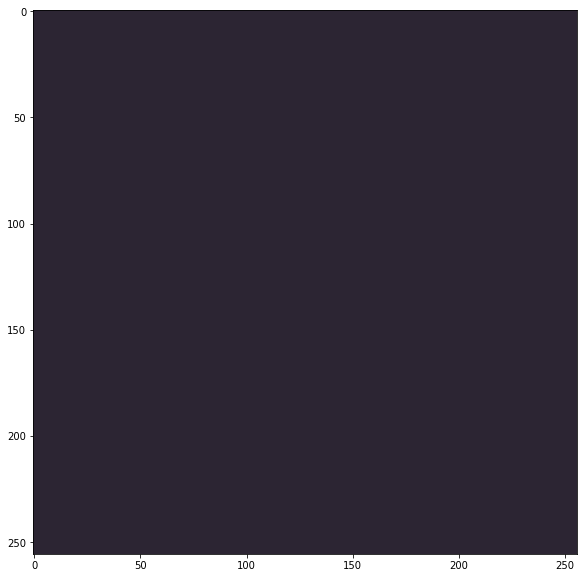

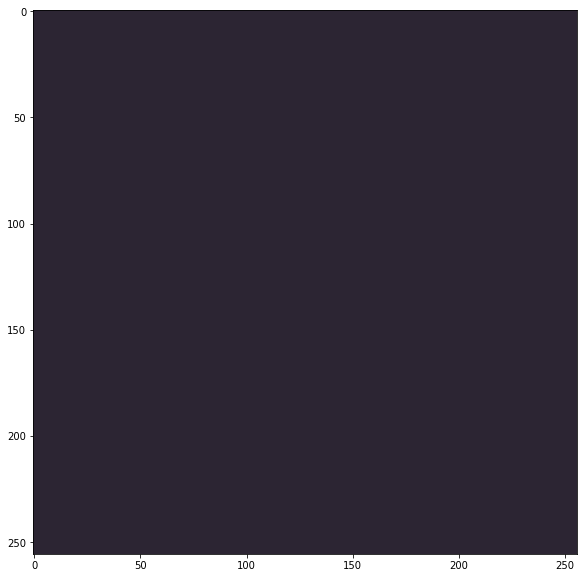

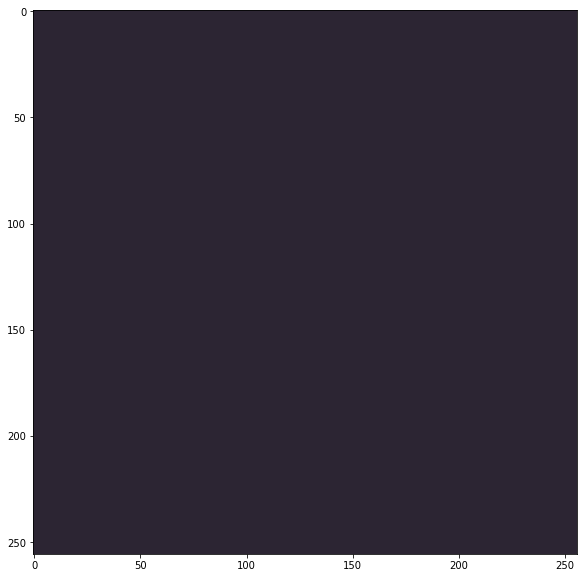

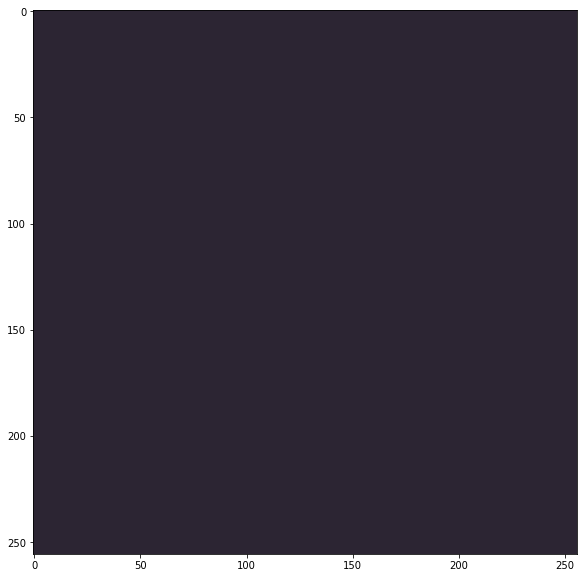

In [22]:
# light green indicates only the predicted model mask or atlas mask
# dark green indicates hand segmented target mask
plot_overlaid_images(images, pred_masks, target_masks, IMG_NUM, ['gray', 'Purples_r', 'Greens'], 0.15, range(len(images[IMG_NUM])))



## Test Case 1 MR (DL_Brain_NoTL_MR + DL_Ventricles_TL_MR)

In [335]:
pred_dirs = ['baseline9_tl_ventricle_probas', 'baseline10_tl_ventricle_probas',
 'baseline11_tl_ventricle_probas', 'baseline11_tl_ventricle_probas', 'baseline11_notl_ventricle_probas']

all_pred_probas = []
for d in pred_dirs:
    (images, target_masks, pred_probas, atlas_masks, pred_brain_masks, file_names), image_files=\
        get_testcase_data(test_case_1_mr, d)
    all_pred_probas.append(pred_probas)

all_pred_probas = np.stack(all_pred_probas)
ens_pred_probas = all_pred_probas.mean(axis=0)
pred_masks = ens_pred_probas > 0.5

In [336]:
df = summary_table(images, target_masks, pred_masks, atlas_masks, file_names)
df

test_name  pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
0   ANON22366          0.902451           0.805216               3.366922   
1   ANON26348          0.782086           0.711995               6.300885   
2   ANON28622          0.912243           0.809953              -3.473895   
3   ANON38662          0.901832           0.873001              -2.839382   
4   ANON41567          0.879162           0.864344              -3.896788   
5   ANON53486          0.866033           0.857837               2.763548   
6   ANON60446          0.873648           0.845828              -6.217799   
7   ANON60751          0.859179           0.843381               5.199350   
8   ANON65248          0.859692           0.832042              -8.255059   
9   ANON72855          0.840435           0.801650               1.479587   
10  ANON78219          0.722867           0.526997              35.822329   
11  ANON78381          0.872967           0.800925              -3.339796   
12  ANON80073          0.776932           1.000000             -26.648137   
13  ANON93045          0.880478           0.800322              -2.966752   
14  ANON98217          0.872550           0.851253              -2.010537   

    atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
0               -18.341246                   3.366922   
1                62.654867                   6.300885   
2               -12.004919                   3.473895   
3                19.010417                   2.839382   
4                -3.093734                   3.896788   
5                -0.296576                   2.763548   
6                -0.702576                   6.217799   
7                -2.012248                   5.199350   
8               -10.767468                   8.255059   
9                 5.872682                   1.479587   
10              156.182473                  35.822329   
11               17.254142                   3.339796   
12                0.000000                  26.648137   
13                3.038363                   2.966752   
14                5.494033                   2.010537   

    abs_atlas_percent_vol_diff  pred_volume_mm^3  
0                    18.341246             64011  
1                    62.654867             18018  
2                    12.004919             56517  
3                    19.010417             34698  
4                     3.093734             21900  
5                     0.296576             22869  
6                     0.702576             24027  
7                     2.012248             25251  
8                    10.767468             36042  
9                     5.872682             33333  
10                  156.182473             16971  
11                   17.254142             32907  
12                    0.000000             25335  
13                    3.038363             28455  
14                    5.494033             27342

In [337]:
df.describe()

pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
count         15.000000          15.000000              15.000000   
mean           0.853504           0.814983              -0.314368   
std            0.052877           0.099817              12.665750   
min            0.722867           0.526997             -26.648137   
25%            0.849807           0.801288              -3.685341   
50%            0.872550           0.832042              -2.839382   
75%            0.879820           0.854545               3.065235   
max            0.912243           1.000000              35.822329   

       atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
count               15.000000                  15.000000   
mean                14.819214                   7.638718   
std                 43.398590                   9.899962   
min                -18.341246                   1.479587   
25%                 -2.552991                   2.903067   
50%                  0.000000                   3.473895   
75%                 11.563412                   6.259342   
max                156.182473                  35.822329   

       abs_atlas_percent_vol_diff  pred_volume_mm^3  
count                   15.000000          15.00000  
mean                    21.115050       31178.40000  
std                     40.509772       13192.08309  
min                      0.000000       16971.00000  
25%                      2.525306       23448.00000  
50%                      5.872682       27342.00000  
75%                     17.797694       34015.50000  
max                    156.182473       64011.00000

## Test Case 2 MR (DL_Brain_NoTL_MR + DL_Ventricles_TL_MR)

In [338]:
pred_dirs = ['baseline9_tl_ventricle_probas', 'baseline10_tl_ventricle_probas',
 'baseline11_tl_ventricle_probas', 'baseline11_tl_ventricle_probas', 'baseline11_notl_ventricle_probas']

all_pred_probas = []
for d in pred_dirs:
    (images, target_masks, pred_probas, atlas_masks, pred_brain_masks, file_names), image_files=\
        get_testcase_data(test_case_2_mr, d)
    all_pred_probas.append(pred_probas)

all_pred_probas = np.stack(all_pred_probas)
ens_pred_probas = all_pred_probas.mean(axis=0)
pred_masks = ens_pred_probas > 0.5

In [339]:
df = summary_table(images, target_masks, pred_masks, atlas_masks, file_names)
df

test_name  pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
0   MR-Test-001          0.750874           0.698015             -21.583305   
1   MR-Test-001          0.842701           0.766428             -23.186082   
2   MR-Test-002          0.909964           0.857047             -12.210052   
3   MR-Test-002          0.831996           0.763542             -23.793890   
4   MR-Test-003          0.873482           0.843666             -22.034804   
5   MR-Test-003          0.865175           0.584025             -22.005121   
6   MR-Test-004          0.801418           0.802226             -15.540418   
7   MR-Test-004          0.839912           0.686126             -26.971161   
8   MR-Test-005          0.835240           0.782368             -19.447194   
9   MR-Test-005          0.820478           0.707437             -27.743215   
10  MR-Test-006          0.852711           0.692123             -21.979248   
11  MR-Test-006          0.817087           0.641767             -18.046944   
12  MR-Test-007          0.548370           0.402501             -28.040791   
13  MR-Test-008          0.595254           0.428473              60.232658   
14  MR-Test-008          0.821902           0.736396             -27.037334   
15  MR-Test-009          0.845373           0.331204             -26.381603   
16  MR-Test-009          0.749390           0.711360             -38.641982   
17  MR-Test-010          0.700773           0.552258             -42.661808   
18  MR-Test-010          0.578945           1.000000             -25.682738   

    atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
0                -9.209482                  21.583305   
1               -32.196141                  23.186082   
2                 0.594541                  12.210052   
3               -25.574537                  23.793890   
4               -16.729285                  22.034804   
5               -56.112021                  22.005121   
6               -26.198910                  15.540418   
7               -46.546633                  26.971161   
8               -34.642839                  19.447194   
9               -40.473598                  27.743215   
10              -41.941218                  21.979248   
11              -24.512843                  18.046944   
12               -0.455763                  28.040791   
13              134.712049                  60.232658   
14              -23.253713                  27.037334   
15              -79.698419                  26.381603   
16              -41.603188                  38.641982   
17              -49.950015                  42.661808   
18                0.000000                  25.682738   

    abs_atlas_percent_vol_diff  pred_volume_mm^3  
0                     9.209482             20742  
1                    32.196141             47418  
2                     0.594541             89925  
3                    25.574537             41085  
4                    16.729285            148788  
5                    56.112021            101430  
6                    26.198910             55794  
7                    46.546633            114258  
8                    34.642839             92763  
9                    40.473598             55749  
10                   41.941218             56622  
11                   24.512843             22206  
12                    0.455763             37893  
13                  134.712049             33471  
14                   23.253713             65430  
15                   79.698419            114096  
16                   41.603188             36489  
17                   49.950015             53340  
18                    0.000000             30288

In [340]:
df.describe()

pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
count         19.000000          19.000000              19.000000   
mean           0.783213           0.683524             -20.145002   
std            0.104622           0.165749              20.706324   
min            0.548370           0.331204             -42.661808   
25%            0.750132           0.612896             -27.004248   
50%            0.821902           0.707437             -23.186082   
75%            0.844037           0.774398             -20.515250   
max            0.909964           1.000000              60.232658   

       atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
count               19.000000                  19.000000   
mean               -21.778527                  26.485282   
std                 43.146756                  10.801753   
min                -79.698419                  12.210052   
25%                -41.772203                  21.781277   
50%                -26.198910                  23.793890   
75%                -12.969383                  27.390275   
max                134.712049                  60.232658   

       abs_atlas_percent_vol_diff  pred_volume_mm^3  
count                   19.000000         19.000000  
mean                    36.021326      64094.052632  
std                     31.506757      36021.034342  
min                      0.000000      20742.000000  
25%                     19.991499      37191.000000  
50%                     32.196141      55749.000000  
75%                     44.243925      91344.000000  
max                    134.712049     148788.000000

## Test Case 1 CT (DL_Brain_NoTL_CT + DL_Ventricles_TL_CT)

In [315]:
test_case_1_ct.ls()

[PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/baseline11_notl_ventricle_preds'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/ventricle_pred'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/brain_masks'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/baseline11_tl_ventricle_probas'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/baseline9_tl_ventricle_probas'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/ventricle_atlas'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/skull_stripped_v2'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/baseline11_tl_ventricle_preds'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/baseline11_notl_ventricle_probas'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/skull_stripped_pred'),
 PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test1/brain_pred'),
 PosixPath('../../data/Segmentation_Dataset/CT_D

In [317]:
pred_dirs = ['baseline9_tl_ventricle_probas', 'baseline10_tl_ventricle_probas',
 'baseline11_tl_ventricle_probas', 'baseline11_tl_ventricle_probas', 'baseline11_notl_ventricle_probas']

all_pred_probas = []
for d in pred_dirs:
    (images, target_masks, pred_probas, atlas_masks, pred_brain_masks, file_names), image_files=\
        get_testcase_data(test_case_1_ct, d)
    all_pred_probas.append(pred_probas)

all_pred_probas = np.stack(all_pred_probas)
ens_pred_probas = all_pred_probas.mean(axis=0)
pred_masks = ens_pred_probas > 0.5

In [328]:
df = summary_table(images, target_masks, pred_masks, atlas_masks, file_names)
df

test_name  pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
0  ANON17272          0.811861           0.837954              -4.657759   
1  ANON22673          0.788298           0.829603               6.965318   
2  ANON24224          0.813472           0.812502              15.823489   
3  ANON45950          0.788600           0.744395              34.347028   
4  ANON51808          0.753802           0.612402             -10.306991   
5  ANON65837          0.878460           0.892143              -3.826414   
6  ANON71219          0.783274           0.757522              -6.707317   
7  ANON84614          0.769651           0.758166              38.677824   
8  ANON95021          0.878177           0.891489             -13.482651   

   atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
0              -16.065801                   4.657759   
1              -13.424855                   6.965318   
2              -15.462126                  15.823489   
3               -5.508377                  34.347028   
4              -36.567624                  10.306991   
5               -6.598845                   3.826414   
6              -31.408926                   6.707317   
7              -17.087866                  38.677824   
8               -4.816091                  13.482651   

   abs_atlas_percent_vol_diff  pred_volume_mm^3  
0                   16.065801             45381  
1                   13.424855             44412  
2                   15.462126             50001  
3                    5.508377             35121  
4                   36.567624             21825  
5                    6.598845             62961  
6                   31.408926             21573  
7                   17.087866             24858  
8                    4.816091             64779

In [329]:
df.describe()

pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
count          9.000000           9.000000               9.000000   
mean           0.807288           0.792908               6.314725   
std            0.044319           0.087121              19.316603   
min            0.753802           0.612402             -13.482651   
25%            0.783274           0.757522              -6.707317   
50%            0.788600           0.812502              -3.826414   
75%            0.813472           0.837954              15.823489   
max            0.878460           0.892143              38.677824   

       atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
count                9.000000                   9.000000   
mean               -16.326724                  14.977199   
std                 11.130732                  12.869939   
min                -36.567624                   3.826414   
25%                -17.087866                   6.707317   
50%                -15.462126                  10.306991   
75%                 -6.598845                  15.823489   
max                 -4.816091                  38.677824   

       abs_atlas_percent_vol_diff  pred_volume_mm^3  
count                    9.000000          9.000000  
mean                    16.326724      41212.333333  
std                     11.130732      16580.821971  
min                      4.816091      21573.000000  
25%                      6.598845      24858.000000  
50%                     15.462126      44412.000000  
75%                     17.087866      50001.000000  
max                     36.567624      64779.000000

## Test Case 2 CT (DL_Brain_NoTL_CT + DL_Ventricles_TL_CT)

In [330]:
pred_dirs = ['baseline9_tl_ventricle_probas', 'baseline10_tl_ventricle_probas',
 'baseline11_tl_ventricle_probas', 'baseline11_tl_ventricle_probas', 'baseline11_notl_ventricle_probas']

all_pred_probas = []
for d in pred_dirs:
    (images, target_masks, pred_probas, atlas_masks, pred_brain_masks, file_names), image_files=\
        get_testcase_data(test_case_2_ct, d)
    all_pred_probas.append(pred_probas)

all_pred_probas = np.stack(all_pred_probas)
ens_pred_probas = all_pred_probas.mean(axis=0)
pred_masks = ens_pred_probas > 0.5

In [331]:
df = summary_table(images, target_masks, pred_masks, atlas_masks, file_names)
df

test_name  pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
0   CT-Test-001          0.776438           0.770998             -27.996751   
1   CT-Test-002          0.781268           0.554783             -30.578178   
2   CT-Test-002          0.844358           0.791574              -2.592549   
3   CT-Test-003          0.693267           0.767049             -45.939867   
4   CT-Test-004          0.502133           1.000000              19.176211   
5   CT-Test-004          0.668038           0.521567             -34.069847   
6   CT-Test-005          0.871895           0.854068             -19.027606   
7   CT-Test-005          0.754980           0.739632             -31.042740   
8   CT-Test-006          0.847441           0.780813             -12.610514   
9   CT-Test-006          0.864481           0.863039              -7.233146   
10  CT-Test-007          0.586836           0.609775             -34.624015   
11  CT-Test-007          0.677757           0.718098             -44.919351   
12  CT-Test-008          0.830660           0.811174               9.641567   
13  CT-Test-008          0.716995           0.682973             -20.997255   
14  CT-Test-009          0.721585           0.524378              38.551557   
15  CT-Test-009          0.822185           0.778622              -3.756957   
16  CT-Test-010          0.809496           0.743477             -14.946350   
17  CT-Test-010          0.711082           0.704002             -14.285714   

    atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
0               -36.072689                  27.996751   
1               -59.995447                  30.578178   
2               -24.833887                   2.592549   
3               -35.755367                  45.939867   
4                 0.000000                  19.176211   
5               -32.640718                  34.069847   
6               -21.589794                  19.027606   
7               -34.304690                  31.042740   
8               -34.591295                  12.610514   
9               -14.792335                   7.233146   
10              -34.485933                  34.624015   
11              -25.570765                  44.919351   
12              -20.626100                   9.641567   
13              -17.465691                  20.997255   
14              -22.477368                  38.551557   
15                5.534941                   3.756957   
16               -5.996213                  14.946350   
17                3.584607                  14.285714   

    abs_atlas_percent_vol_diff  pred_volume_mm^3  
0                    36.072689             85110  
1                    59.995447             82344  
2                    24.833887             49257  
3                    35.755367             56961  
4                     0.000000             34026  
5                    32.640718             40551  
6                    21.589794            113865  
7                    34.304690             45789  
8                    34.591295            115944  
9                    14.792335             55482  
10                   34.485933             34089  
11                   25.570765             69048  
12                   20.626100             35514  
13                   17.465691             25905  
14                   22.477368             18825  
15                    5.534941             37350  
16                    5.996213             60639  
17                    3.584607             34146

In [332]:
df.describe()

pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
count         18.000000          18.000000              18.000000   
mean           0.748939           0.734223             -15.402861   
std            0.099979           0.123249              22.108453   
min            0.502133           0.521567             -45.939867   
25%            0.697721           0.688231             -30.926599   
50%            0.765709           0.755263             -16.986978   
75%            0.828542           0.788883              -4.626005   
max            0.871895           1.000000              38.551557   

       atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
count               18.000000                  18.000000   
mean               -22.893263                  22.888343   
std                 16.528146                  13.612315   
min                -59.995447                   2.592549   
25%                -34.440622                  13.029314   
50%                -23.655628                  20.086733   
75%                -15.460674                  33.313070   
max                  5.534941                  45.939867   

       abs_atlas_percent_vol_diff  pred_volume_mm^3  
count                   18.000000         18.000000  
mean                    23.906547      55269.166667  
std                     14.932135      28232.778806  
min                      0.000000      18825.000000  
25%                     15.460674      34488.000000  
50%                     23.655628      47523.000000  
75%                     34.440622      66945.750000  
max                     59.995447     115944.000000

In [69]:
image_files[8]

PosixPath('../../data/Segmentation_Dataset/CT_Dataset/test2/skull_stripped_v2/CT-Test-006_20181011185919.000_2.16.840_725.8620_RTst_2018-10-11_185919_CT.BRAIN.WITH.CONTRAST.(S)_._n1__00000_CT.npy')

### Data Inspection

In [157]:
from fastai.vision import *
import dicom_contour.contour as dcm
from dicom_contour.contour import slice_order

In [106]:
main_data_path = Path('/data/public/Testing_CT_Raw_DICOM_Files/2018-10__Studies')

In [109]:
image_path = main_data_path/'2.16.840_725.8620_CT_2018-10-11_185919_CT.BRAIN.WITH.CONTRAST.(S)_Applied.Gantry.Tilt.Derived.CT.20190127.185919.000000_n53__00000/'
rt_path = main_data_path/'2.16.840_725.8620_RTst_2018-10-11_185919_CT.BRAIN.WITH.CONTRAST.(S)_._n1__00000/'

In [128]:
contour_filename = get_files(rt_path, extensions=['.dcm'])
contour_file = str(contour_filename[0])

In [129]:
rt_sequence = pydicom.read_file(contour_file)

In [137]:
#extract roi index in RT Struct
roi_names = dcm.get_roi_names(rt_sequence); print(roi_names)
roi_index = np.where(np.array(roi_names) == "Ventricles")[0][0]; roi_index

['BrainAtlas', 'VentriclesAtlas', 'Brain', 'Ventricles']


3

In [202]:
def get_dicom_px(filename):
    """Parse the given DICOM filename
    :param filename: filepath to the DICOM file to parse
    :return: dictionary with DICOM image data
    """

#     try:
    dcm = pydicom.read_file(filename)
    px = dcm.pixel_array
    intercept = getattr(dcm, "RescaleIntercept", None)
    slope = getattr(dcm, "RescaleSlope", None)

    if intercept and slope: return px*slope + intercept
    else: return px
    
#     except Exception:
#         return None

In [136]:
def get_roi_contour_ds(rt_sequence, index):
    """
    Extract desired ROI contour datasets
    from RT Sequence.
    
    E.g. rt_sequence can have contours for different parts of the brain 
    such as ventricles, tumor, etc...
    
    You can use get_roi_names to find which index to use
    
    Inputs:
        rt_sequence (dicom.dataset.FileDataset): Contour file dataset, what you get 
                                                 after reading contour DICOM file
        index (int): Index for ROI Sequence
    Return:
        contours (list): list of ROI contour dicom.dataset.Dataset s
    """
    # index 0 means that we are getting RTV information
    ROI = rt_sequence.ROIContourSequence[index]
    # get contour datasets in a list
    contours = [contour for contour in ROI.ContourSequence]
    return contours

In [138]:
contour_datasets = get_roi_contour_ds(rt_sequence=rt_sequence, index=roi_index)

In [144]:
def contour2poly(contour_dataset, path):
    """
    Given a contour dataset (a DICOM class) and path that has .dcm files of
    corresponding images return polygon coordinates for the contours.

    Inputs
        contour_dataset (dicom.dataset.Dataset) : DICOM dataset class that is identified as
                         (3006, 0016)  Contour Image Sequence
        path (str): path of directory containing DICOM images

    Return:
        pixel_coords (list): list of tuples having pixel coordinates
        img_ID (id): DICOM image id which maps input contour dataset
        img_shape (tuple): DICOM image shape - height, width
    """

    contour_coord = contour_dataset.ContourData
    # x, y, z coordinates of the contour in mm
    coord = []
    for i in range(0, len(contour_coord), 3):
        coord.append((contour_coord[i], contour_coord[i + 1], contour_coord[i + 2]))

    # extract the image id corresponding to given countour
    # read that dicom file
    img_ID = contour_dataset.ContourImageSequence[0].ReferencedSOPInstanceUID
    img = pydicom.read_file(path + img_ID + '.dcm')
    img_arr = img.pixel_array
    img_shape = img_arr.shape
    
    # physical distance between the center of each pixel
    x_spacing, y_spacing = float(img.PixelSpacing[0]), float(img.PixelSpacing[1])

    # this is the center of the upper left voxel
    origin_x, origin_y, _ = img.ImagePositionPatient

    # y, x is how it's mapped
    pixel_coords = [(np.ceil((x - origin_x) / x_spacing), np.ceil((y - origin_y) / y_spacing))  for x, y, _ in coord]
    return pixel_coords, img_ID, img_shape

In [145]:
def poly_to_mask(polygon, width, height):
    from PIL import Image, ImageDraw
    
    """Convert polygon to mask
    :param polygon: list of pairs of x, y coords [(x1, y1), (x2, y2), ...]
     in units of pixels
    :param width: scalar image width
    :param height: scalar image height
    :return: Boolean mask of shape (height, width)
    """

    # http://stackoverflow.com/a/3732128/1410871
    img = Image.new(mode='L', size=(width, height), color=0)
    ImageDraw.Draw(img).polygon(xy=polygon, outline=0, fill=1)
    mask = np.array(img).astype(bool)
    return mask

In [146]:
def get_mask_dict(contour_datasets, path):
    """
    Inputs:
        contour_datasets (list): list of dicom.dataset.Dataset for contours
        path (str): path of directory with images

    Return:
        img_contours_dict (dict): img_id : contour array pairs
    """
    
    from collections import defaultdict
    
    # create empty dict for 
    img_contours_dict = defaultdict(int)

    for cdataset in contour_datasets:
        coords, img_id, shape = contour2poly(cdataset, path)
        mask = poly_to_mask(coords, *shape)
        img_contours_dict[img_id] += mask
    
    return img_contours_dict

In [149]:
mask_dict = get_mask_dict(contour_datasets, str(image_path)+'/')

In [159]:
slice_orders = slice_order(str(image_path))

In [209]:
def get_img_mask_voxel(slice_orders, mask_dict, image_path):
    """ 
    Construct image and mask voxels
    
    Inputs:
        slice_orders (list): list of tuples of ordered img_id and z-coordinate position
        mask_dict (dict): dictionary having img_id : contour array pairs
        image_path (str): directory path containing DICOM image files
    Return: 
        img_voxel: ordered image voxel for CT/MR
        mask_voxel: ordered mask voxel for CT/MR
    """
    
    img_voxel = []
    mask_voxel = []
    for img_id, _ in slice_orders:
        fn = image_path + img_id + '.dcm'; #print(fn)
        img_array = get_dicom_px(fn)

        if img_id in mask_dict: mask_array = mask_dict[img_id]
        else: mask_array = np.zeros_like(img_array)
            
        img_voxel.append(img_array)
        mask_voxel.append(mask_array)
        
        
    return img_voxel, mask_voxel

In [287]:
img_data, mask_data = get_img_mask_voxel(slice_orders, mask_dict, str(main_data_path/image_path)+'/')

In [281]:
# # fix 
# _mask_data = []
# for im, ms in zip(img_data, mask_data): 
#     try:
#         assert im.shape == ms.shape; _mask_data.append(ms)
#     except:
#         try:
#             im.shape == ms.T.shape; ms = ms.T
#             assert im.shape == ms.shape; _mask_data.append(ms)
#         except:
#             raise Exception

In [288]:
# fix 
_image_data, _mask_data = [], []
for im, ms in zip(img_data, mask_data): 
    _image_data.append(im[:512, :512]); _mask_data.append(ms[:512, :512])
img_data, mask_data = _image_data, _mask_data

In [289]:
img_voxel, mask_voxel = np.stack(img_data), np.stack(mask_data)
img_voxel.shape, mask_voxel.shape

((53, 512, 512), (53, 512, 512))

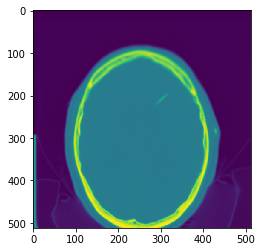

In [290]:
plt.imshow(img_voxel[25])

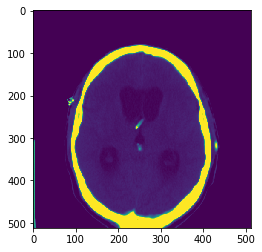

In [291]:
plt.imshow(np.clip(img_voxel[20]+1, 0, 500))

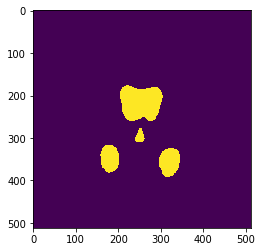

In [292]:
plt.imshow(mask_voxel[20])

In [293]:
def show_img_msk_fromarray(img_arr, msk_arr, alpha=0.35, sz=7, cmap='inferno', save_path=None):

    """
    Show original image and masked on top of image
    next to each other in desired size
    Inputs:
        img_arr (np.array): array of the image
        msk_arr (np.array): array of the mask
        alpha (float): a number between 0 and 1 for mask transparency
        sz (int): figure size for display
        save_path (str): path to save the figure
    """

    msk_arr = np.ma.masked_where(msk_arr == 0, msk_arr)
    plt.figure(figsize=(sz, sz))
    plt.subplot(1, 2, 1)
    plt.imshow(img_arr)
    plt.imshow(msk_arr, cmap=cmap, alpha=alpha)
    plt.subplot(1, 2, 2)
    plt.imshow(img_arr)
    if save_path is None:
        plt.show()
    else:
        plt.savefig(save_path)
        plt.close()

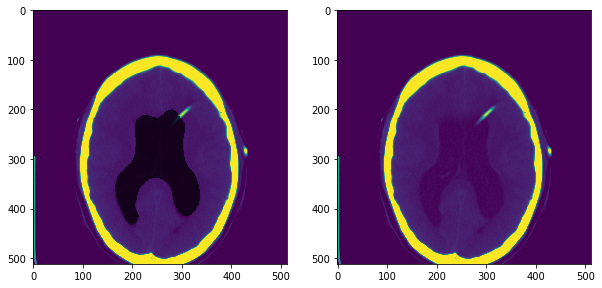

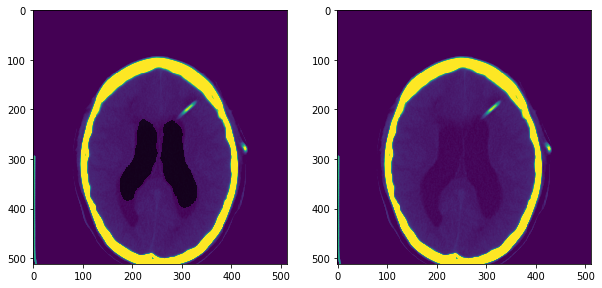

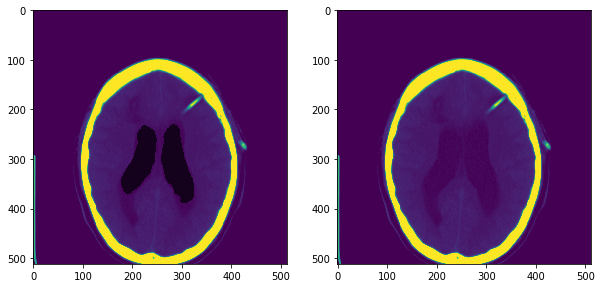

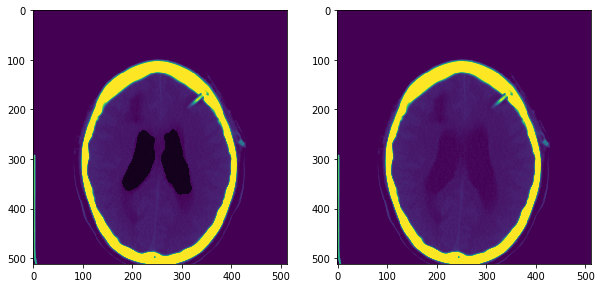

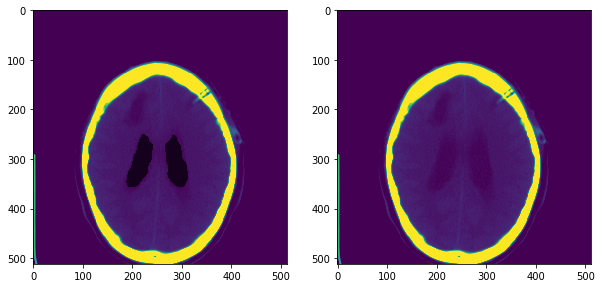

In [295]:
for img, mask in zip(img_voxel[25:30], mask_voxel[25:30]):
#     img *= ((img > 300) * (img < 400)) 
    show_img_msk_fromarray(np.clip(img+1, 0, 500), mask, sz=10, alpha=0.7)